## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Understanding the Business Objective and the Data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 
In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

## Dataset

Dataset - telecom_churn_data.csv
Some of the abbreviations used are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge).
The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

### Loading the Data

In [4]:
df = pd.read_csv("telecom_churn_data.csv")
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
df.shape

(99999, 226)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Missing Value Imputation

In [7]:
round(((df.isnull().sum().sort_values()/len(df)) * 100),2)

mobile_number                0.00
last_day_rch_amt_9           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_6           0.00
max_rech_amt_9               0.00
max_rech_amt_8               0.00
max_rech_amt_7               0.00
max_rech_amt_6               0.00
total_rech_amt_9             0.00
total_rech_amt_8             0.00
total_rech_amt_7             0.00
total_rech_amt_6             0.00
total_rech_num_9             0.00
total_rech_num_8             0.00
total_rech_num_7             0.00
total_rech_num_6             0.00
total_ic_mou_9               0.00
total_ic_mou_8               0.00
total_ic_mou_7               0.00
total_ic_mou_6               0.00
jun_vbc_3g                   0.00
total_og_mou_9               0.00
total_og_mou_8               0.00
vol_2g_mb_6                  0.00
total_og_mou_7               0.00
vol_2g_mb_7                  0.00
vol_2g_mb_9                  0.00
jul_vbc_3g                   0.00
aug_vbc_3g    

### Checking for columns with less than 10% missing values and ignoring date columns

In [8]:
col_l = list(df.loc[:,(round((df.isnull().sum() / len(df)) * 100,2) > 0 ) & (round((df.isnull().sum() / len(df)) * 100,2) <=10) ].columns)
#df["loc_og_t2o_mou"].value_counts()


In [9]:
col_l1 = pd.Series(col_l)
col_l2 = list(col_l1[col_l1.str.find("date") < 0])

In [10]:
len(col_l2)

119

In [11]:
col_l2

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2

In [12]:
for i in col_l :
    print(i , "-" ,df[i].value_counts())

loc_og_t2o_mou - 0.0    98981
Name: loc_og_t2o_mou, dtype: int64
std_og_t2o_mou - 0.0    98981
Name: std_og_t2o_mou, dtype: int64
loc_ic_t2o_mou - 0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
last_date_of_month_7 - 7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
last_date_of_month_8 - 8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
last_date_of_month_9 - 9/30/2014    98340
Name: last_date_of_month_9, dtype: int64
onnet_mou_6 - 0.00       8928
0.33         80
0.26         76
0.48         75
0.31         72
0.28         68
2.01         66
0.36         65
1.01         63
0.43         63
0.83         62
0.35         61
0.98         61
0.91         60
0.01         58
0.45         57
0.18         57
0.86         56
1.51         56
0.25         55
0.78         55
0.38         54
0.46         54
0.20         54
0.53         54
0.76         53
0.50         53
1.63         52
0.55         52
1.33         52
0.63         52
0.21         51
0.41         51
1.11         5

### 0 missing value imputation for the fields having less than 10% missing values

In [13]:
for i in col_l2:
    df[i].fillna(0,inplace = True)

In [14]:
round((df.isnull().sum().sort_values()/len(df))*100,2)

mobile_number                0.00
std_ic_t2o_mou_9             0.00
std_ic_mou_6                 0.00
std_ic_mou_7                 0.00
std_ic_mou_8                 0.00
std_ic_mou_9                 0.00
total_ic_mou_6               0.00
total_ic_mou_7               0.00
total_ic_mou_8               0.00
std_ic_t2o_mou_8             0.00
total_ic_mou_9               0.00
spl_ic_mou_7                 0.00
spl_ic_mou_8                 0.00
spl_ic_mou_9                 0.00
isd_ic_mou_6                 0.00
isd_ic_mou_7                 0.00
isd_ic_mou_8                 0.00
isd_ic_mou_9                 0.00
ic_others_6                  0.00
spl_ic_mou_6                 0.00
std_ic_t2o_mou_7             0.00
std_ic_t2o_mou_6             0.00
jun_vbc_3g                   0.00
loc_ic_t2f_mou_6             0.00
loc_ic_t2f_mou_7             0.00
loc_ic_t2f_mou_8             0.00
loc_ic_t2f_mou_9             0.00
loc_ic_mou_6                 0.00
loc_ic_mou_7                 0.00
loc_ic_mou_8  

### Missing Value imputation for Date Fiels

In [15]:
df["last_date_of_month_7"].fillna("7/31/2014",inplace = True)
df["last_date_of_month_8"].fillna("8/31/2014",inplace = True)
df["last_date_of_month_9"].fillna("9/30/2014",inplace = True)

In [16]:
df.isnull().sum().sort_values()

mobile_number                   0
std_ic_t2o_mou_9                0
std_ic_mou_6                    0
std_ic_mou_7                    0
std_ic_mou_8                    0
std_ic_mou_9                    0
total_ic_mou_6                  0
total_ic_mou_7                  0
total_ic_mou_8                  0
std_ic_t2o_mou_8                0
total_ic_mou_9                  0
spl_ic_mou_7                    0
spl_ic_mou_8                    0
spl_ic_mou_9                    0
isd_ic_mou_6                    0
isd_ic_mou_7                    0
isd_ic_mou_8                    0
isd_ic_mou_9                    0
ic_others_6                     0
spl_ic_mou_6                    0
std_ic_t2o_mou_7                0
std_ic_t2o_mou_6                0
jun_vbc_3g                      0
loc_ic_t2f_mou_6                0
loc_ic_t2f_mou_7                0
loc_ic_t2f_mou_8                0
loc_ic_t2f_mou_9                0
loc_ic_mou_6                    0
loc_ic_mou_7                    0
loc_ic_mou_8  

### Missing Value Imputation for more than 50 % missing values 

In [17]:
col_l3 = df.loc[:,round((df.isnull().sum()/len(df)) * 100,2) > 50].columns
col_l4 = list(col_l3[col_l3.str.find("date") < 0])
col_l4

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [18]:
col_l5 = list(col_l3[col_l3.str.find("fb") > -1 ])

In [19]:
for i in col_l5:
    df[i].fillna("NA",inplace = True)

In [20]:
round((df.isnull().sum().sort_values() /len(df))  * 100,2)

mobile_number                0.00
std_ic_mou_7                 0.00
std_ic_mou_8                 0.00
std_ic_mou_9                 0.00
total_ic_mou_6               0.00
total_ic_mou_7               0.00
total_ic_mou_8               0.00
total_ic_mou_9               0.00
spl_ic_mou_6                 0.00
spl_ic_mou_7                 0.00
spl_ic_mou_8                 0.00
spl_ic_mou_9                 0.00
isd_ic_mou_6                 0.00
isd_ic_mou_7                 0.00
isd_ic_mou_8                 0.00
isd_ic_mou_9                 0.00
ic_others_6                  0.00
ic_others_7                  0.00
ic_others_8                  0.00
ic_others_9                  0.00
std_ic_mou_6                 0.00
total_rech_num_6             0.00
std_ic_t2o_mou_9             0.00
std_ic_t2o_mou_7             0.00
loc_ic_t2f_mou_8             0.00
loc_ic_t2f_mou_9             0.00
loc_ic_mou_6                 0.00
loc_ic_mou_7                 0.00
loc_ic_mou_8                 0.00
loc_ic_mou_9  

### 0 missing value imputation

In [21]:
for i in col_l4:
    df[i].fillna(0,inplace = True)

### Fetching the Date fields and dropping them

In [22]:
col_l6 = list(df.loc[:,round((df.isnull().sum()/len(df)) * 100,2) > 0].columns)
col_l6

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [23]:
df = df.drop(columns = col_l6)
df.shape

(99999, 218)

In [24]:
df.isnull().any()

mobile_number           False
circle_id               False
loc_og_t2o_mou          False
std_og_t2o_mou          False
loc_ic_t2o_mou          False
last_date_of_month_6    False
last_date_of_month_7    False
last_date_of_month_8    False
last_date_of_month_9    False
arpu_6                  False
arpu_7                  False
arpu_8                  False
arpu_9                  False
onnet_mou_6             False
onnet_mou_7             False
onnet_mou_8             False
onnet_mou_9             False
offnet_mou_6            False
offnet_mou_7            False
offnet_mou_8            False
offnet_mou_9            False
roam_ic_mou_6           False
roam_ic_mou_7           False
roam_ic_mou_8           False
roam_ic_mou_9           False
roam_og_mou_6           False
roam_og_mou_7           False
roam_og_mou_8           False
roam_og_mou_9           False
loc_og_t2t_mou_6        False
loc_og_t2t_mou_7        False
loc_og_t2t_mou_8        False
loc_og_t2t_mou_9        False
loc_og_t2m

### Defining High value Customers

In [25]:
df["Avg First 2 months"] = (df["total_rech_amt_6"]+ df["total_rech_amt_7"] + df["total_rech_amt_7"] + ( df["av_rech_amt_data_6"] * df["total_rech_data_6"]) +(df["av_rech_amt_data_7"] * df["total_rech_data_7"]) )/2
df[["Avg First 2 months","total_rech_amt_6","total_rech_amt_7","av_rech_amt_data_6","av_rech_amt_data_7","total_rech_data_6","total_rech_data_7"]].head(10)

Avg First 2 months  total_rech_amt_6  total_rech_amt_7  av_rech_amt_data_6  \
0               685.0               362               252               252.0   
1               498.0                74               384                 0.0   
2               399.0               168               315                 0.0   
3               425.0               230               310                 0.0   
4               476.0               196               350                56.0   
5                60.0               120                 0                 0.0   
6               471.5               499               222                 0.0   
7              1580.0              1580               790                 0.0   
8               996.5               437               601                 0.0   
9               382.0               220               195                 0.0   

   av_rech_amt_data_7  total_rech_data_6  total_rech_data_7  
0               252.0                1.0                1.0  
1               154.0                0.0                1.0  
2                 0.0                0.0                0.0  
3                 0.0                0.0                0.0  
4                 0.0                1.0                0.0  
5                 0.0                0.0                0.0  
6                 0.0                0.0                0.0  
7                 0.0                0.0                0.0  
8               177.0                0.0                2.0  
9               154.0                0.0                1.0

In [26]:
df["Avg First 2 months"].quantile([0,0.5,0.7])

0.0      0.0
0.5    395.5
0.7    672.5
Name: Avg First 2 months, dtype: float64

In [27]:
len(df.loc[df["Avg First 2 months"] >= df["Avg First 2 months"].quantile(0.7)])

30005

In [28]:
df_high_value = df.loc[df["Avg First 2 months"] >= df["Avg First 2 months"].quantile(0.7)]

In [29]:
len(df_high_value)

30005

### Defining Churn based on Data usage and Call usage in September 

In [30]:
df_high_value.loc[((df_high_value["vol_2g_mb_9"] == 0 ) | (df_high_value["vol_3g_mb_9"] == 0 )) & ((df_high_value["total_ic_mou_9"] == 0 ) | (df_high_value["total_og_mou_9"] == 0 )) ,"churn"] = 1

In [31]:
df_high_value["churn"] = df_high_value["churn"].fillna(0)
df_high_value[["mobile_number","total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9","churn"]].head(10)

mobile_number  total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  \
0      7000842753            0.00            0.00         0.00         0.00   
7      7000701601            0.00            0.00         0.00         0.00   
8      7001524846           34.91          142.18         0.00         0.00   
15     7002070365          198.28          931.94         0.00         0.00   
21     7002124215          252.61         1031.53         0.00         0.00   
23     7000887461          127.48          127.63        13.93       314.74   
33     7000149764          114.16            1.70        30.92      5588.11   
38     7000815202          114.09          708.04         0.00         0.00   
41     7000721289          165.84           89.13         0.00         0.00   
48     7000294396          894.81         2319.01         0.00         0.00   

    churn  
0     1.0  
7     1.0  
8     0.0  
15    0.0  
21    0.0  
23    0.0  
33    0.0  
38    0.0  
41    0.0  
48    0.0

In [32]:
### churn_per = high_cust_telecom['churn']
churn_per = df_high_value['churn']
df_high_value_churn_per = pd.concat([churn_per.value_counts(), churn_per.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print(df_high_value_churn_per)

     counts  percentage
0.0   26975   89.901683
1.0    3030   10.098317


In [33]:
col_list = df_high_value.columns
pd.Series(col_list)

0             mobile_number
1                 circle_id
2            loc_og_t2o_mou
3            std_og_t2o_mou
4            loc_ic_t2o_mou
5      last_date_of_month_6
6      last_date_of_month_7
7      last_date_of_month_8
8      last_date_of_month_9
9                    arpu_6
10                   arpu_7
11                   arpu_8
12                   arpu_9
13              onnet_mou_6
14              onnet_mou_7
15              onnet_mou_8
16              onnet_mou_9
17             offnet_mou_6
18             offnet_mou_7
19             offnet_mou_8
20             offnet_mou_9
21            roam_ic_mou_6
22            roam_ic_mou_7
23            roam_ic_mou_8
24            roam_ic_mou_9
25            roam_og_mou_6
26            roam_og_mou_7
27            roam_og_mou_8
28            roam_og_mou_9
29         loc_og_t2t_mou_6
30         loc_og_t2t_mou_7
31         loc_og_t2t_mou_8
32         loc_og_t2t_mou_9
33         loc_og_t2m_mou_6
34         loc_og_t2m_mou_7
35         loc_og_t2

### Dropping churn month fields from dataset

In [34]:
col_list_1 = col_list[col_list.str.find("_9",0) < 0 ]

In [35]:
df_high_value_1 = df_high_value[col_list_1]

In [36]:
df_high_value_1 = df_high_value_1.drop(columns = ["sep_vbc_3g","Avg First 2 months"])

In [37]:
df_high_value_1.shape

(30005, 166)

In [38]:
pd.Series(df_high_value_1.columns)

0             mobile_number
1                 circle_id
2            loc_og_t2o_mou
3            std_og_t2o_mou
4            loc_ic_t2o_mou
5      last_date_of_month_6
6      last_date_of_month_7
7      last_date_of_month_8
8                    arpu_6
9                    arpu_7
10                   arpu_8
11              onnet_mou_6
12              onnet_mou_7
13              onnet_mou_8
14             offnet_mou_6
15             offnet_mou_7
16             offnet_mou_8
17            roam_ic_mou_6
18            roam_ic_mou_7
19            roam_ic_mou_8
20            roam_og_mou_6
21            roam_og_mou_7
22            roam_og_mou_8
23         loc_og_t2t_mou_6
24         loc_og_t2t_mou_7
25         loc_og_t2t_mou_8
26         loc_og_t2m_mou_6
27         loc_og_t2m_mou_7
28         loc_og_t2m_mou_8
29         loc_og_t2f_mou_6
30         loc_og_t2f_mou_7
31         loc_og_t2f_mou_8
32         loc_og_t2c_mou_6
33         loc_og_t2c_mou_7
34         loc_og_t2c_mou_8
35             loc_o

### Modifying the column data type from float to int for the total and count fields

In [39]:
c1 = pd.Series(df_high_value_1.columns)

In [40]:
c2 = c1[(c1.str.find("count") >= 0) | (c1.str.find("total") >= 0)]

In [41]:
df_high_value_1[c2]= df_high_value_1[c2].astype('int64')

In [42]:
df_high_value_1[c2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30005 entries, 0 to 99997
Data columns (total 21 columns):
total_og_mou_6       30005 non-null int64
total_og_mou_7       30005 non-null int64
total_og_mou_8       30005 non-null int64
total_ic_mou_6       30005 non-null int64
total_ic_mou_7       30005 non-null int64
total_ic_mou_8       30005 non-null int64
total_rech_num_6     30005 non-null int64
total_rech_num_7     30005 non-null int64
total_rech_num_8     30005 non-null int64
total_rech_amt_6     30005 non-null int64
total_rech_amt_7     30005 non-null int64
total_rech_amt_8     30005 non-null int64
total_rech_data_6    30005 non-null int64
total_rech_data_7    30005 non-null int64
total_rech_data_8    30005 non-null int64
count_rech_2g_6      30005 non-null int64
count_rech_2g_7      30005 non-null int64
count_rech_2g_8      30005 non-null int64
count_rech_3g_6      30005 non-null int64
count_rech_3g_7      30005 non-null int64
count_rech_3g_8      30005 non-null int64
dtypes: i

In [43]:
df_high_value_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30005 entries, 0 to 99997
Columns: 166 entries, mobile_number to churn
dtypes: float64(118), int64(42), object(6)
memory usage: 38.2+ MB


In [44]:
df_high_value_1["churn"]= df_high_value_1["churn"].astype('int64')

In [45]:
df_high_value_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30005 entries, 0 to 99997
Columns: 166 entries, mobile_number to churn
dtypes: float64(117), int64(43), object(6)
memory usage: 38.2+ MB


In [46]:
c4 = pd.Series(df_high_value_1.columns)
c5 = list(c4[c4.str.find("date") >= 0])


In [47]:
c5

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

In [48]:
df_high_value_1 = df_high_value_1.drop(columns = c5)

In [49]:
df_high_value_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30005 entries, 0 to 99997
Columns: 163 entries, mobile_number to churn
dtypes: float64(117), int64(43), object(3)
memory usage: 37.5+ MB


In [50]:
col_int = list(df_high_value_1.select_dtypes(include = 'int64').columns)

In [51]:
col_int.remove("mobile_number")
col_int.remove("circle_id")

In [52]:
len(col_int)

41

### Exploratory Data Analysis

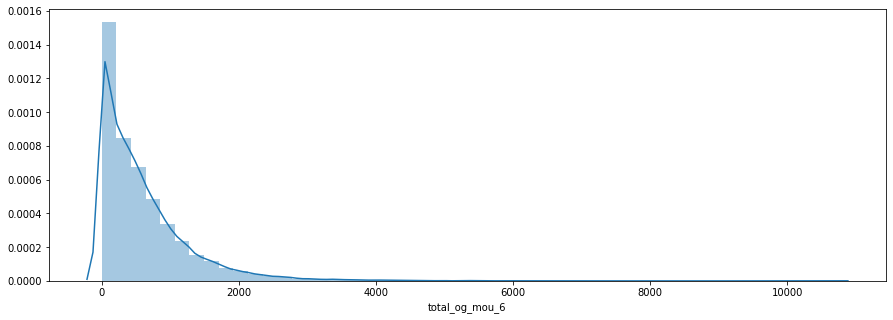

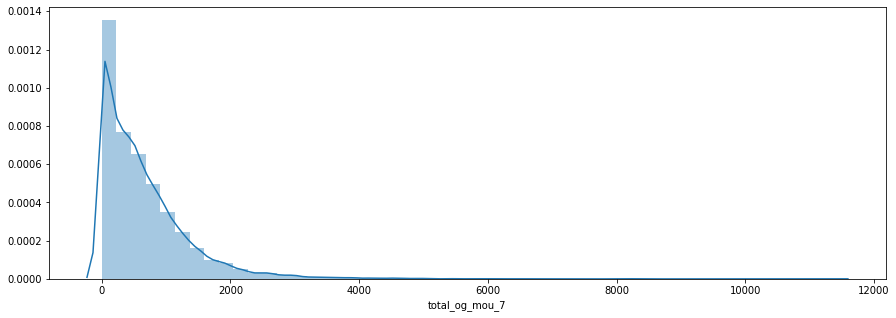

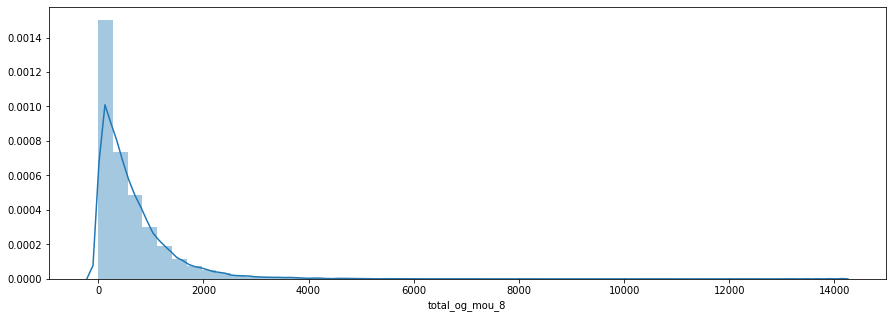

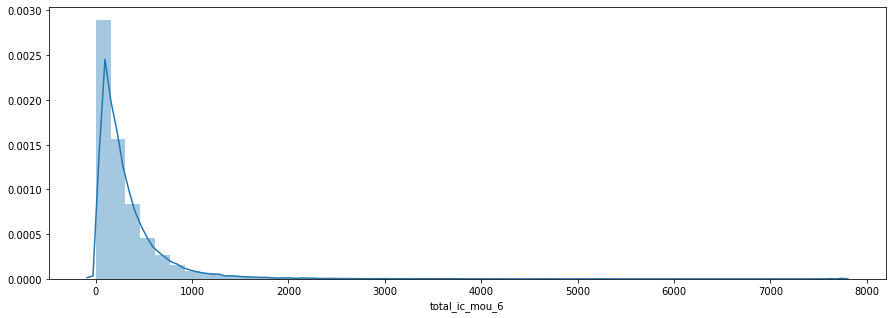

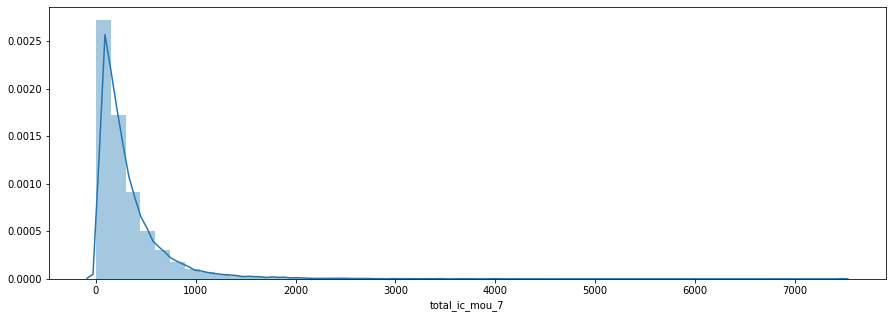

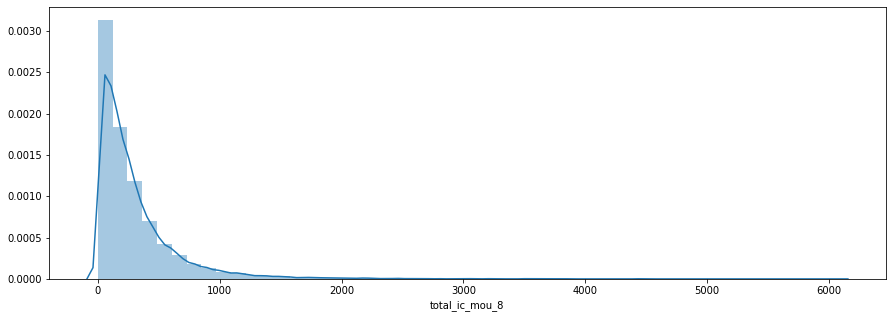

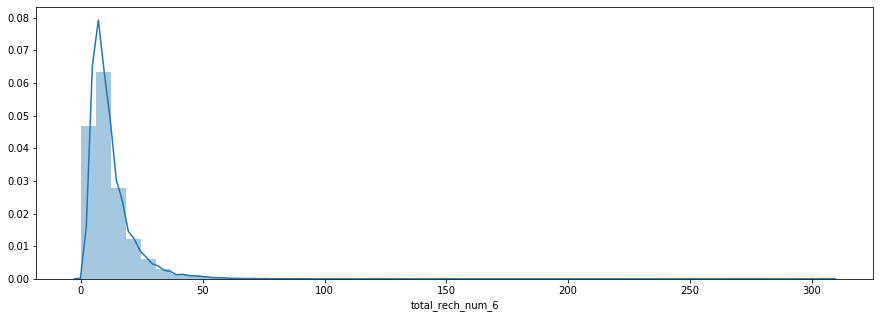

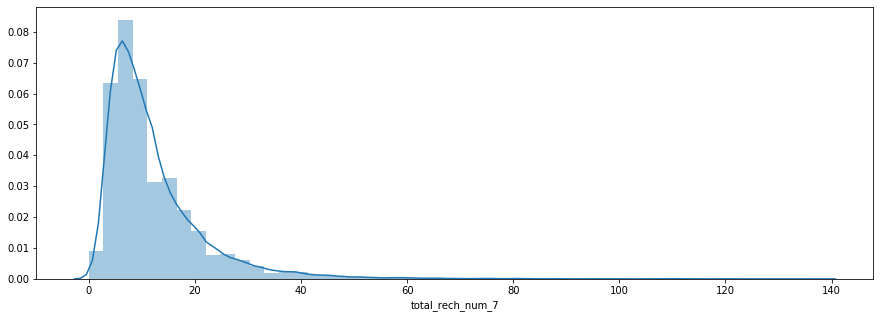

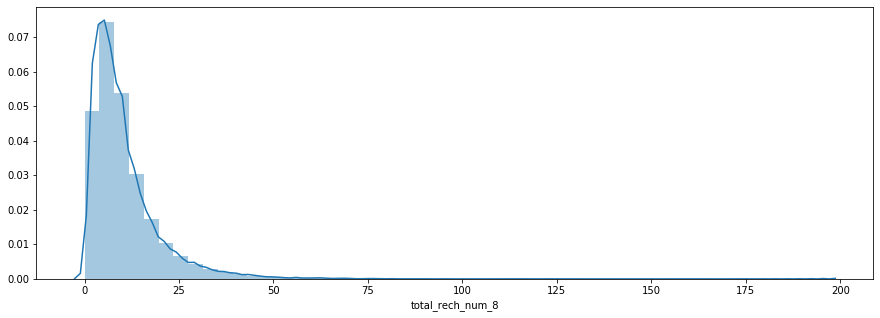

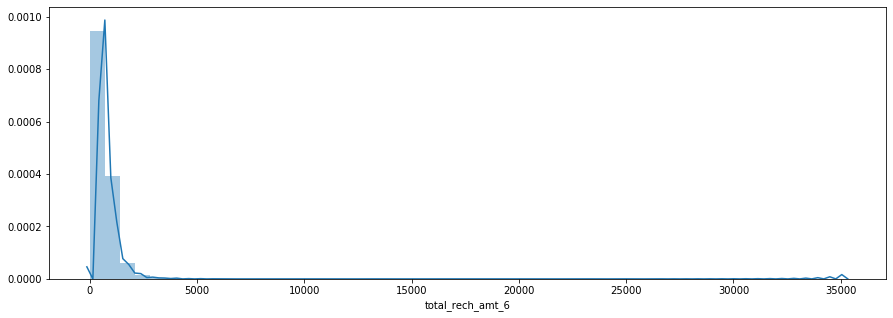

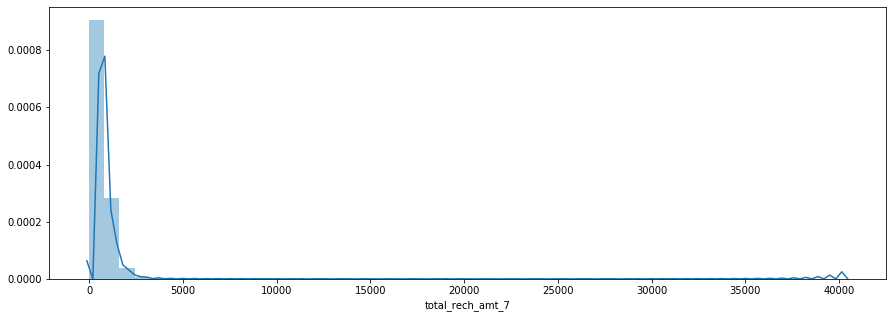

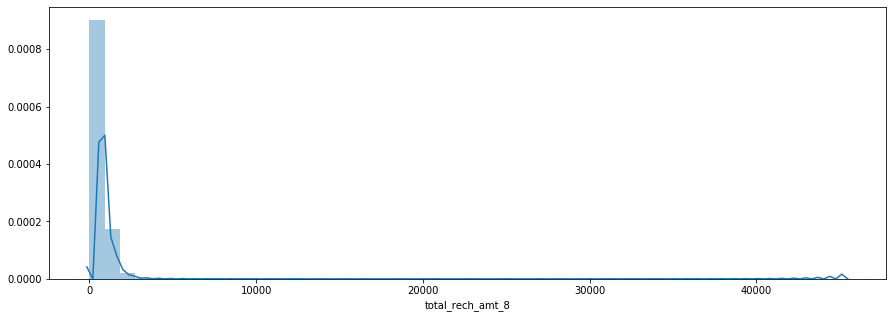

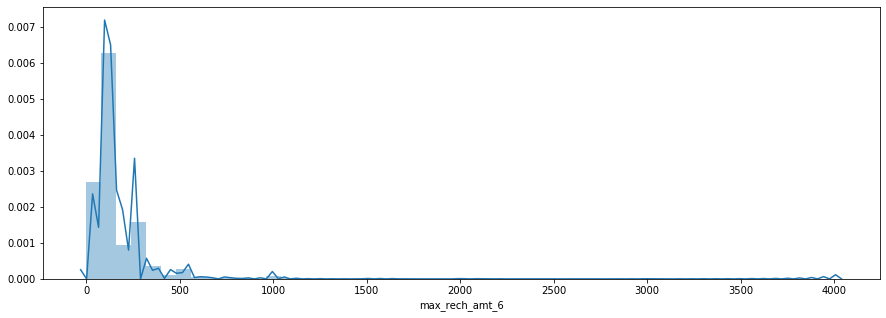

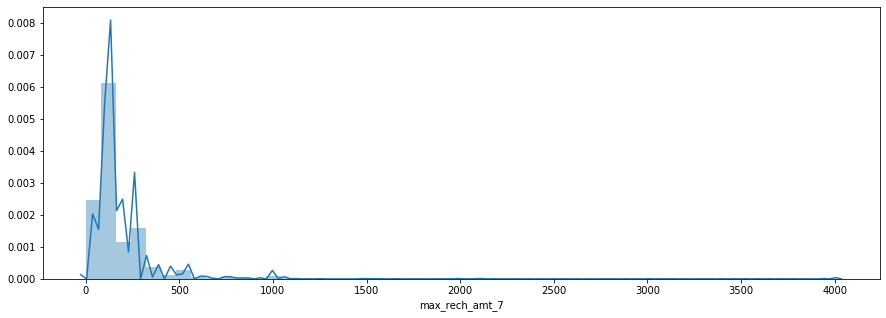

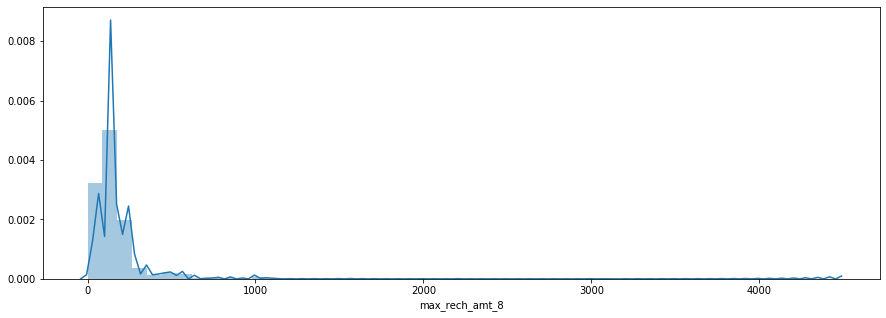

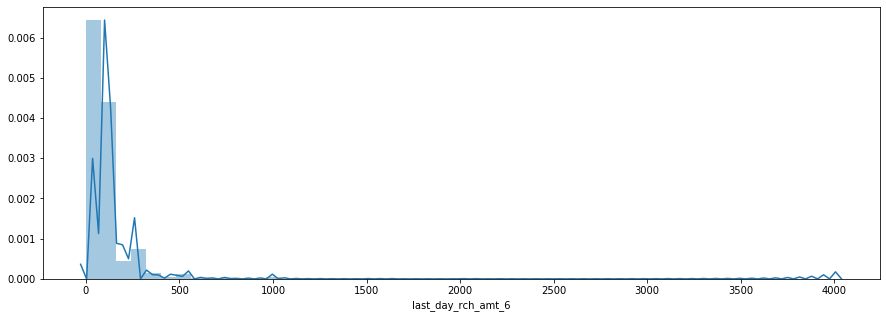

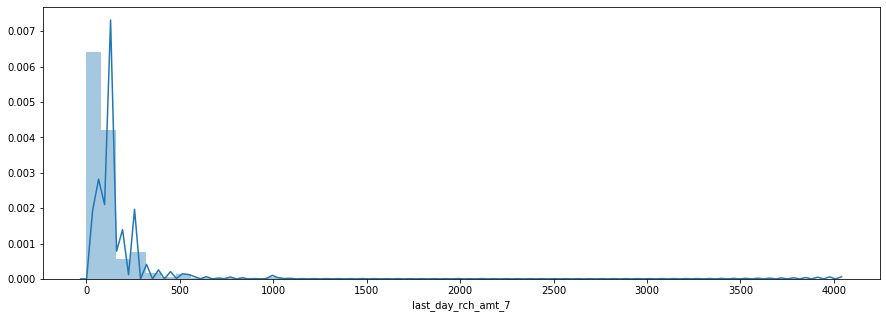

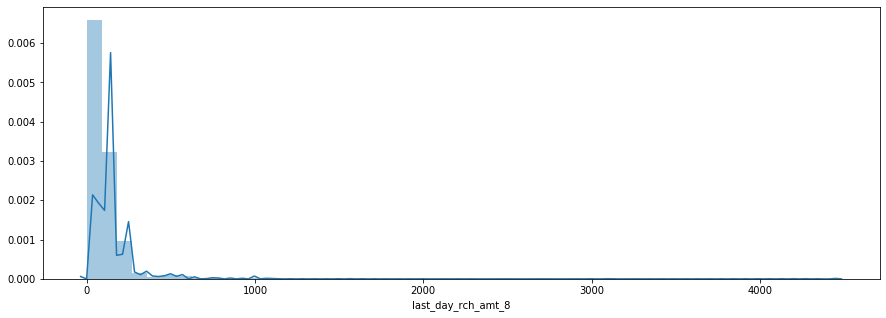

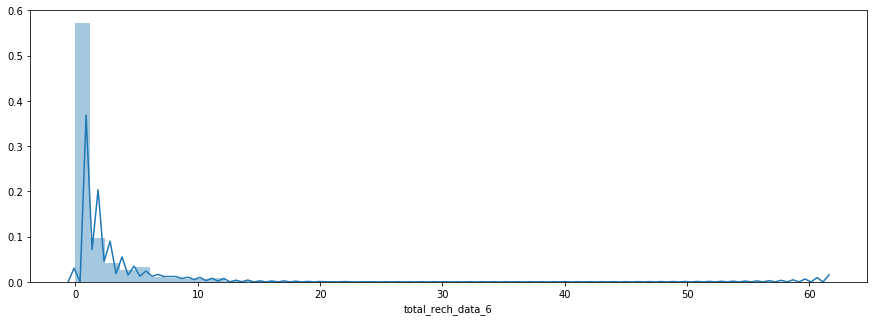

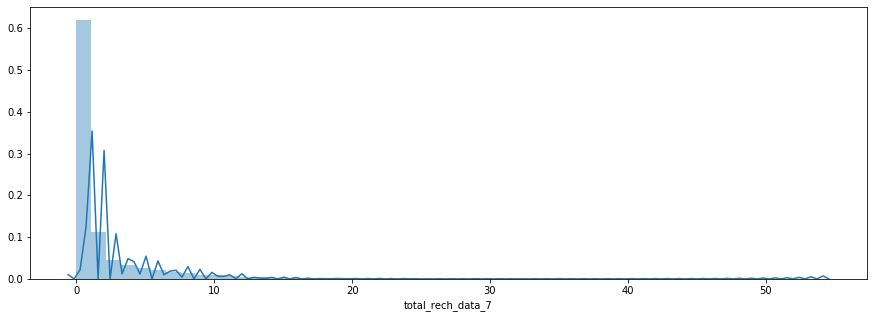

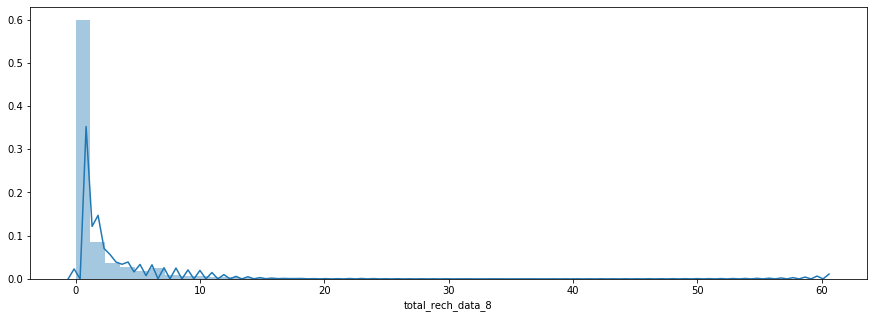

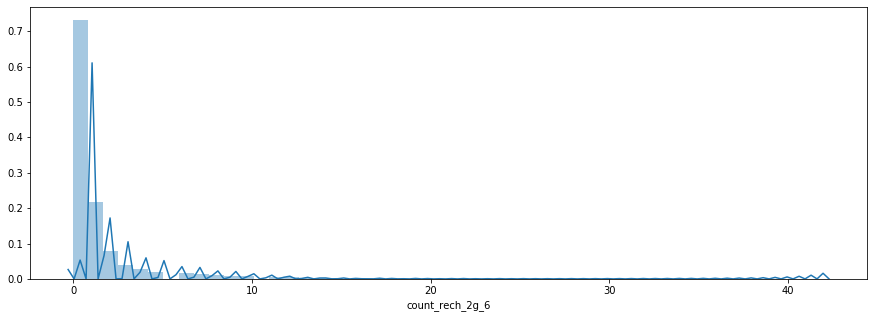

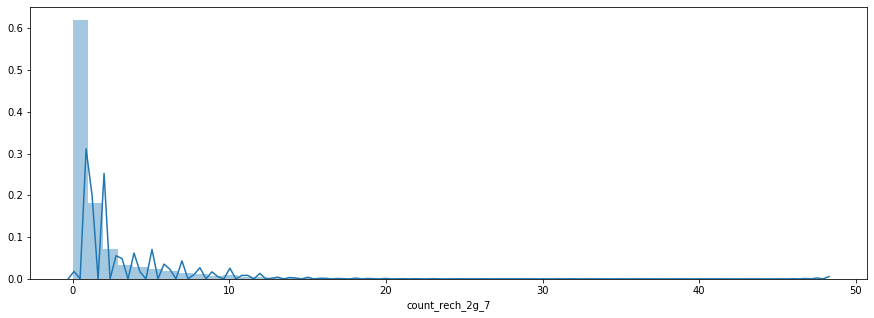

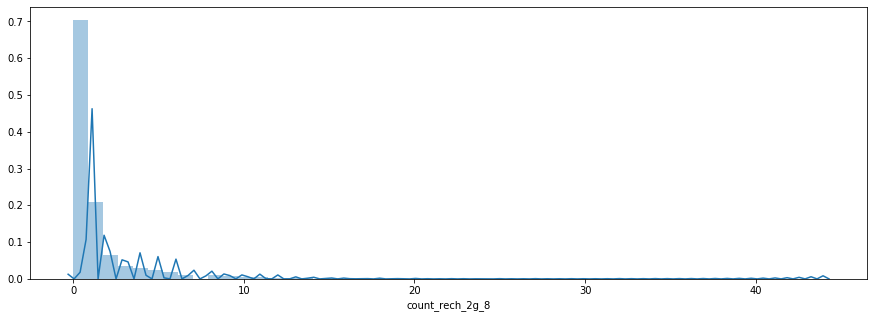

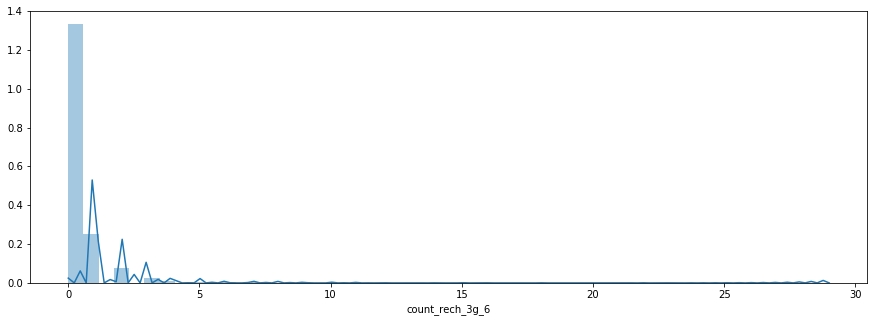

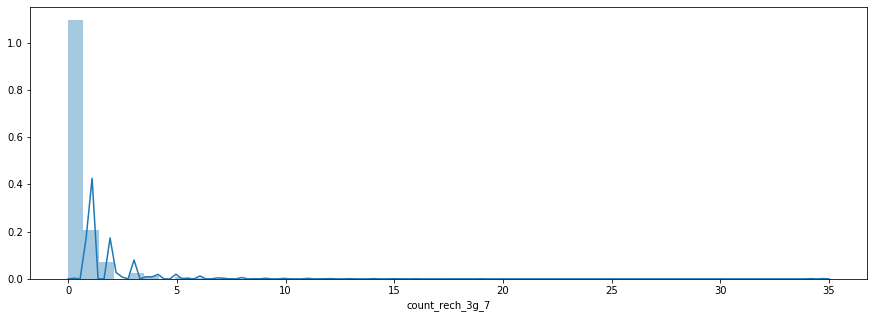

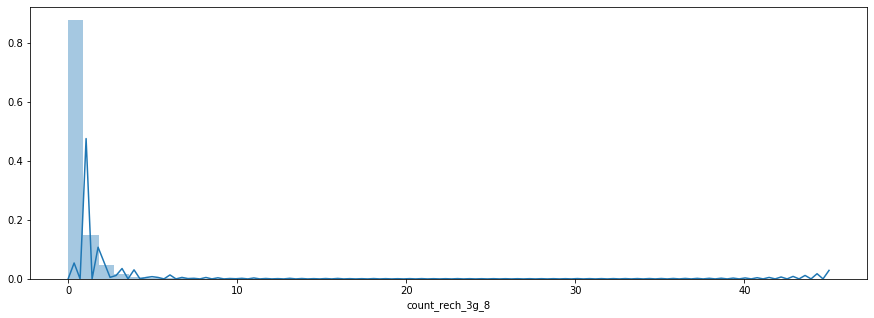

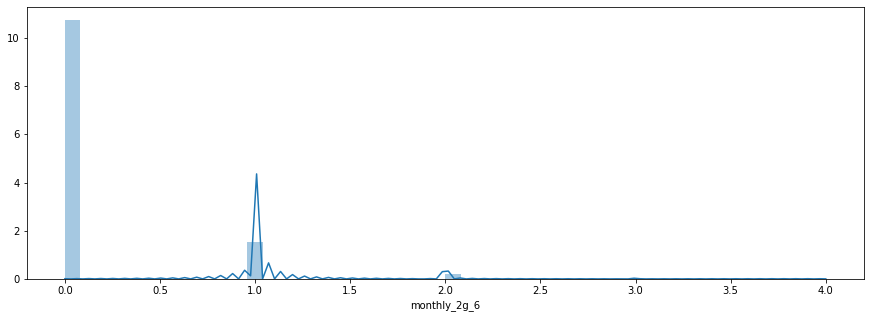

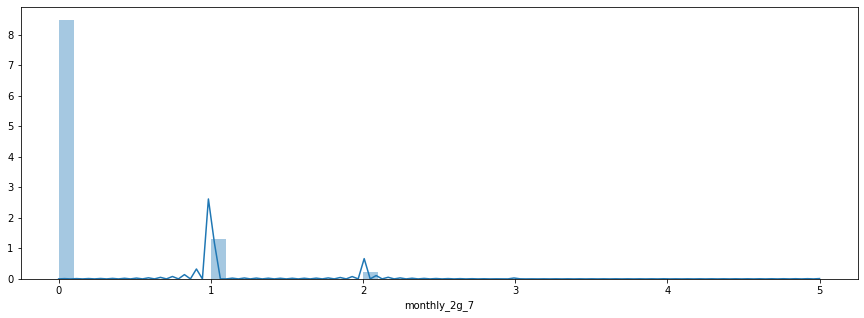

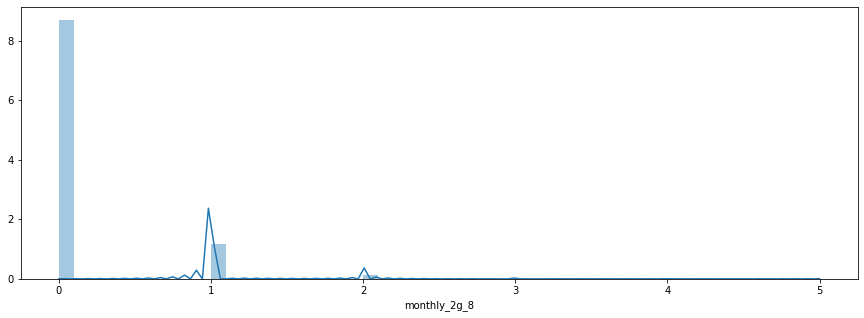

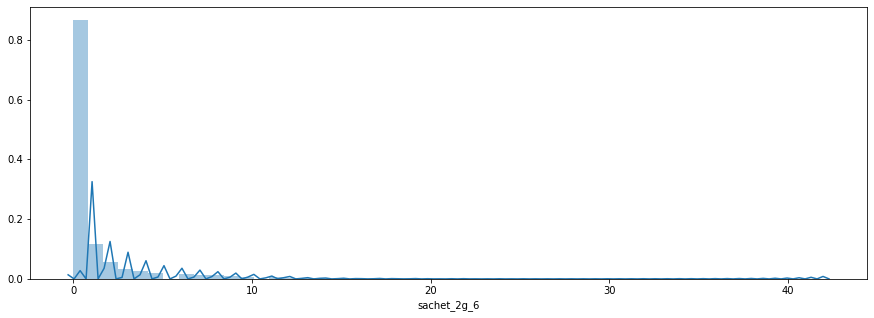

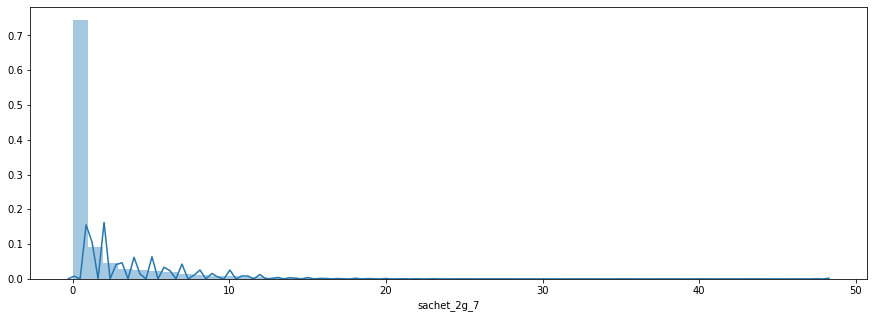

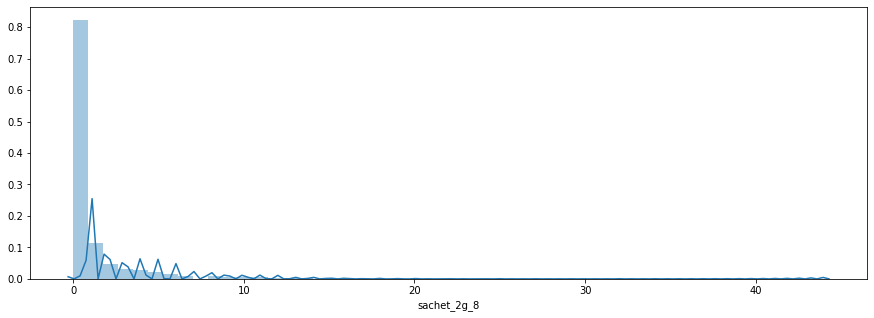

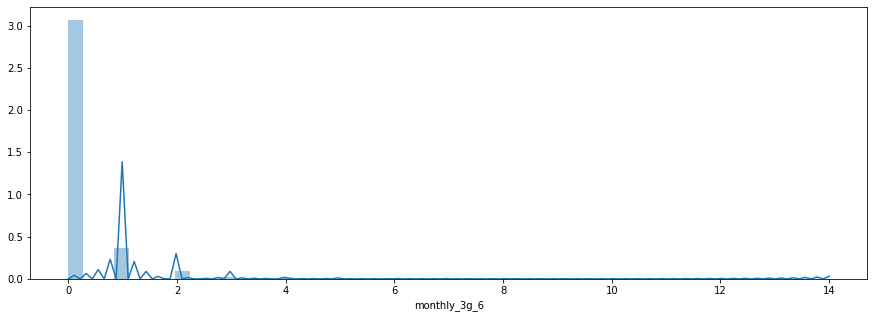

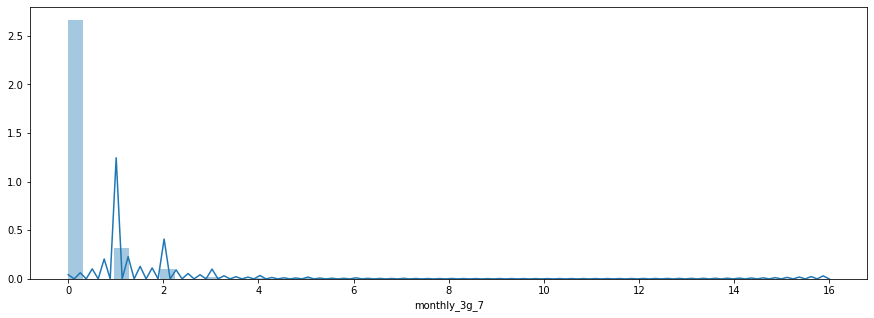

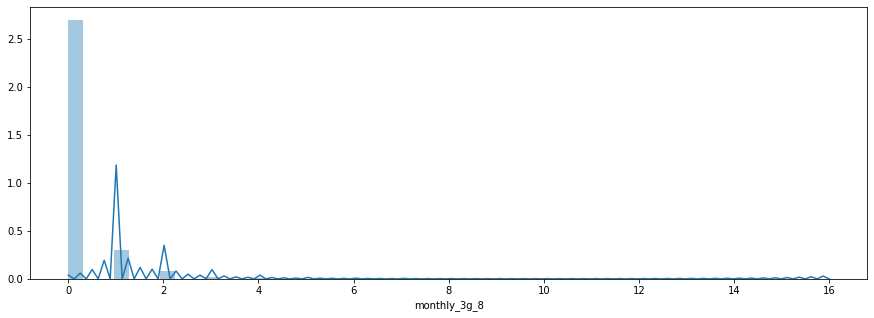

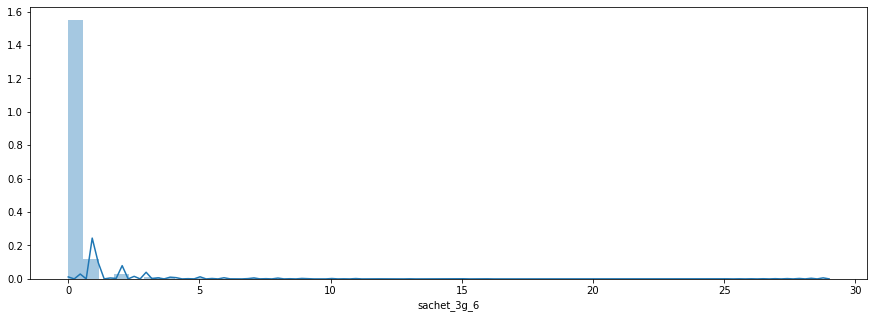

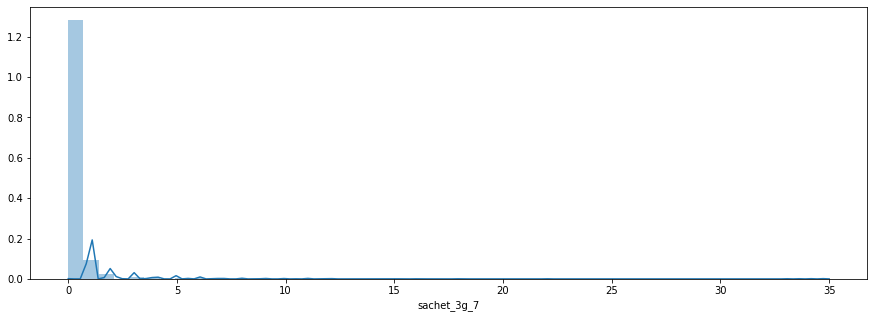

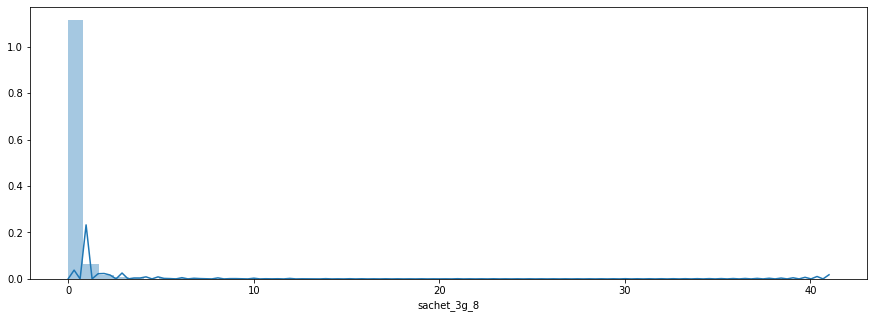

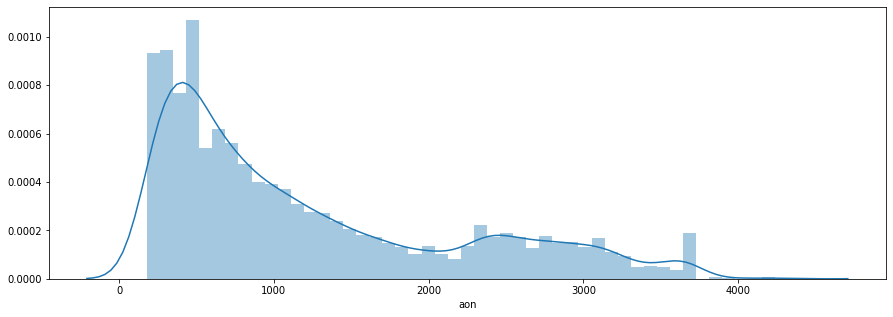

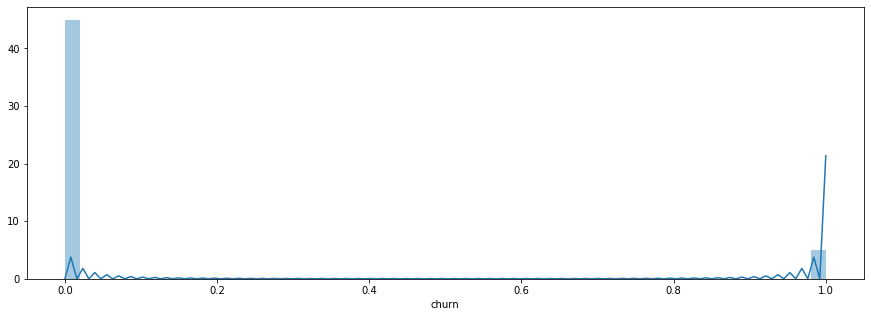

In [53]:
for i in col_int :
    plt.figure(figsize=(15,5))
    sns.distplot(df_high_value_1[i])
    plt.show()

In [54]:
col_float = list(df_high_value_1.select_dtypes(include = 'float').columns)

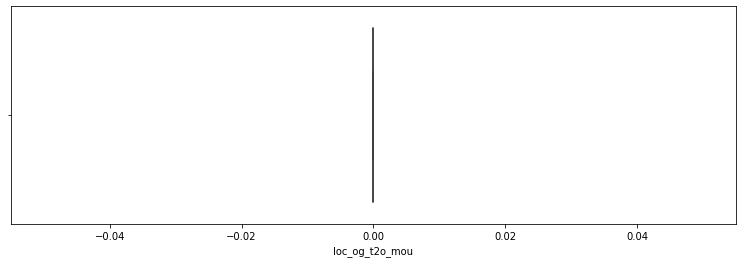

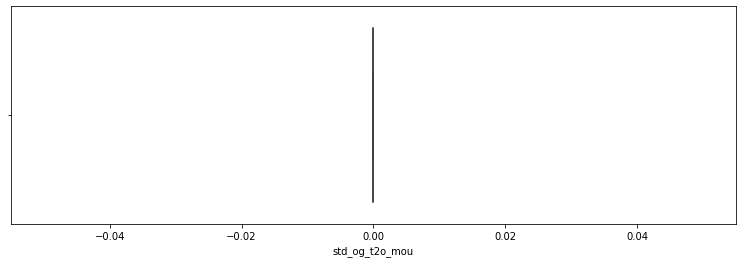

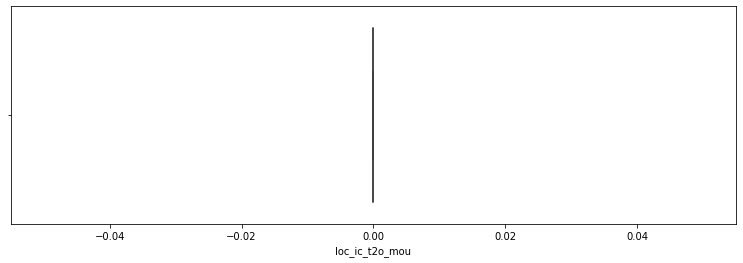

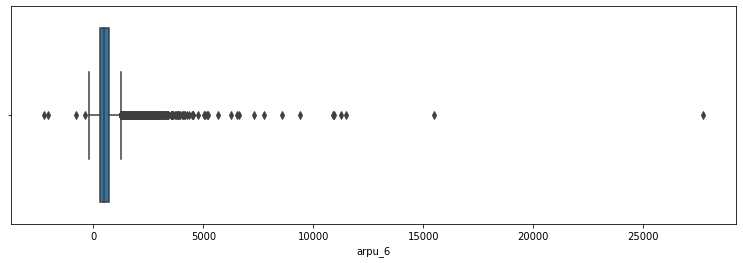

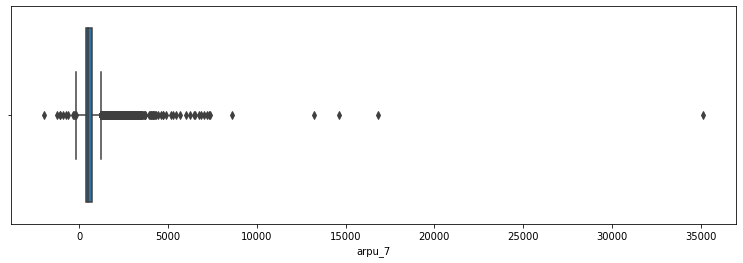

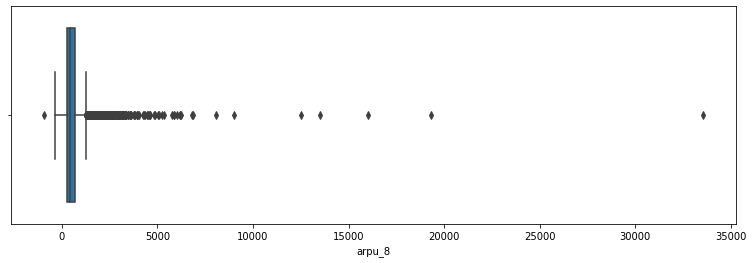

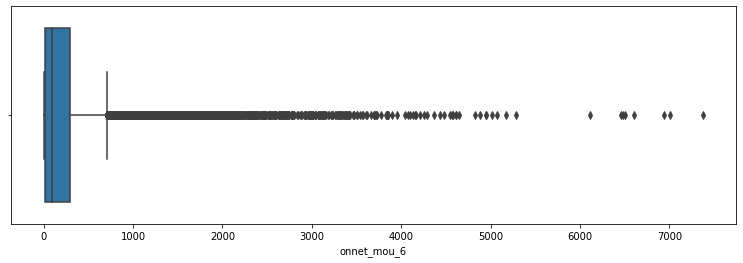

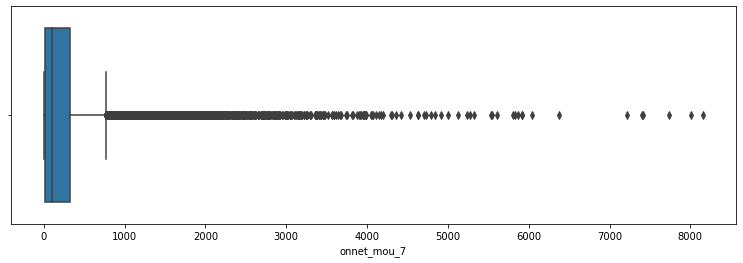

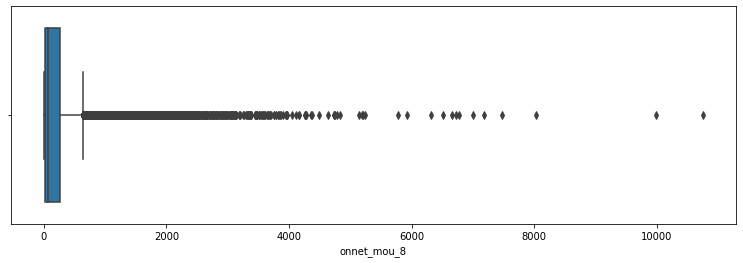

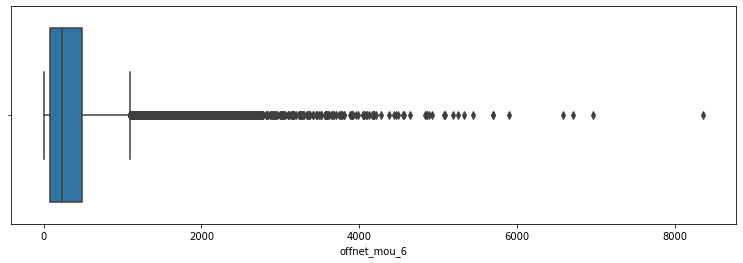

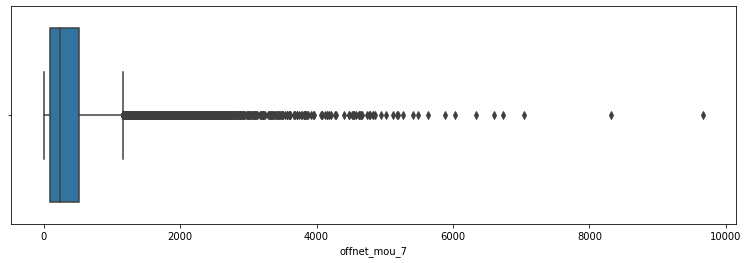

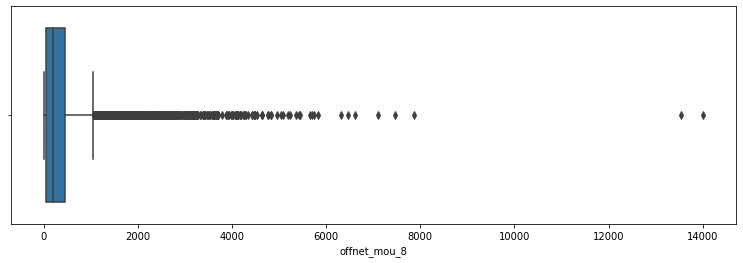

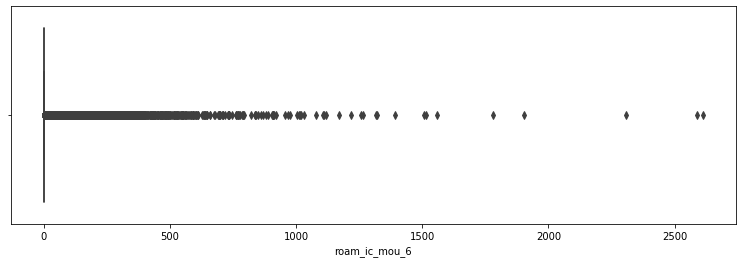

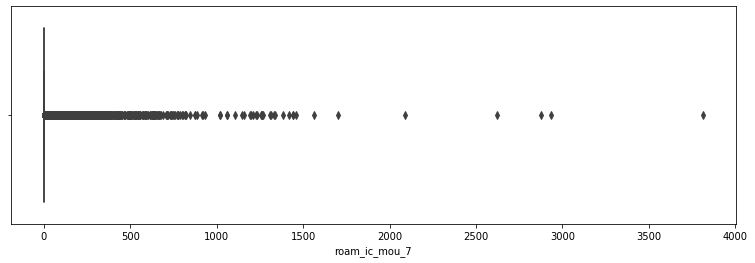

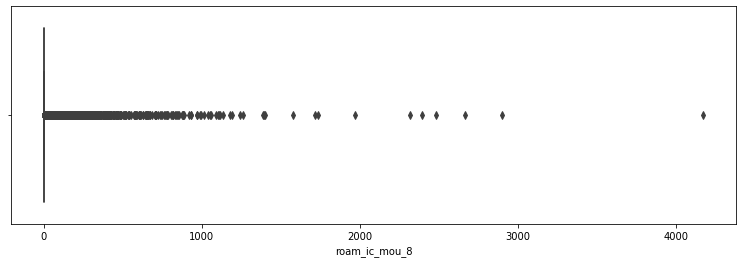

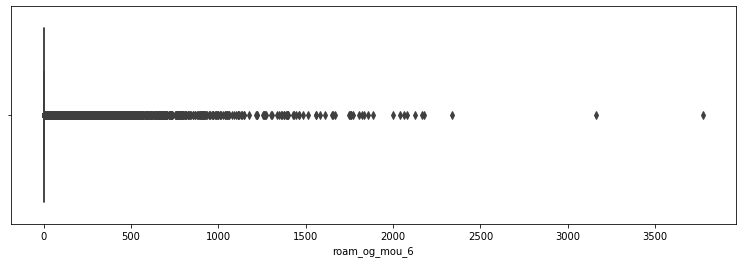

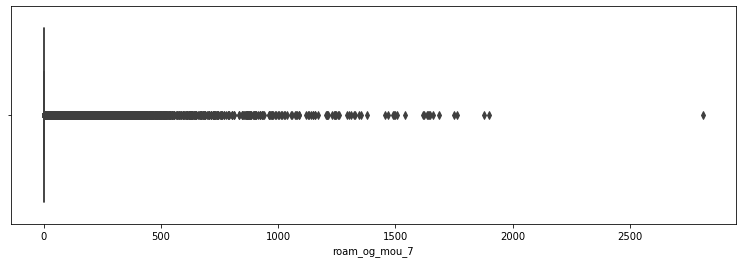

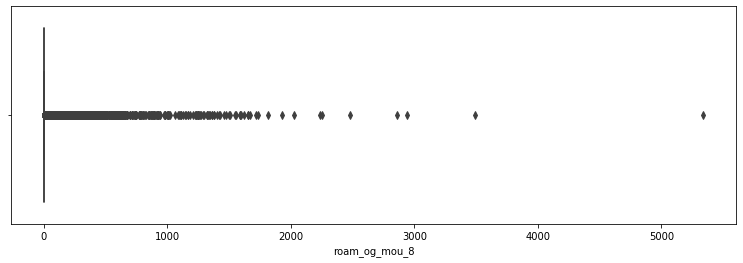

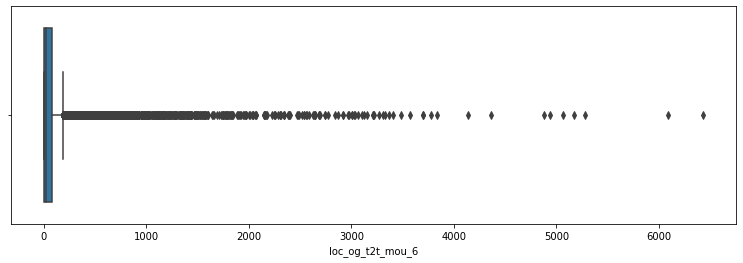

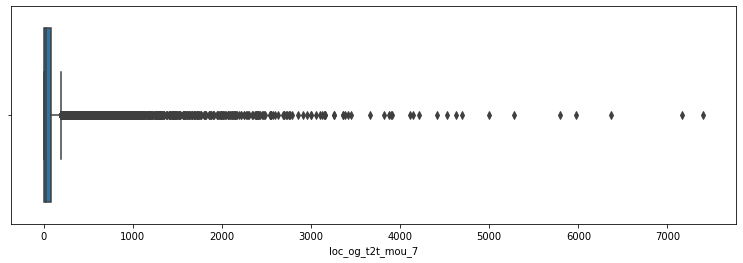

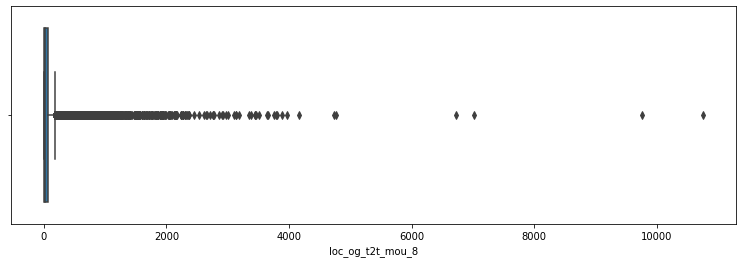

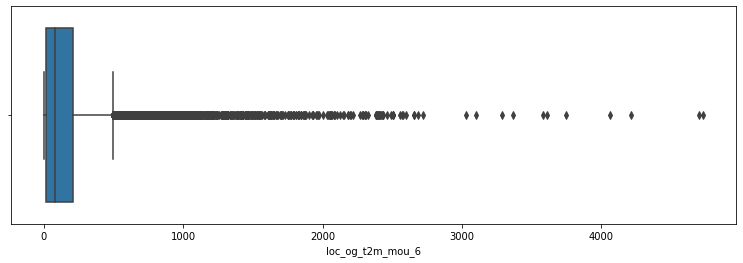

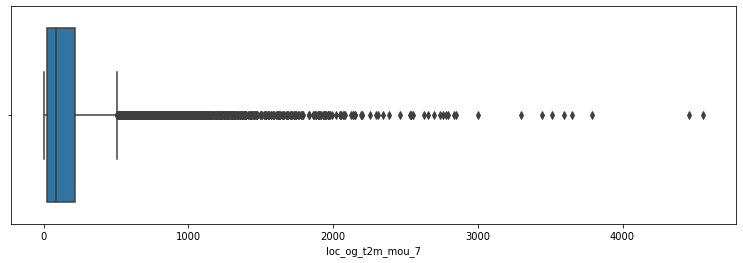

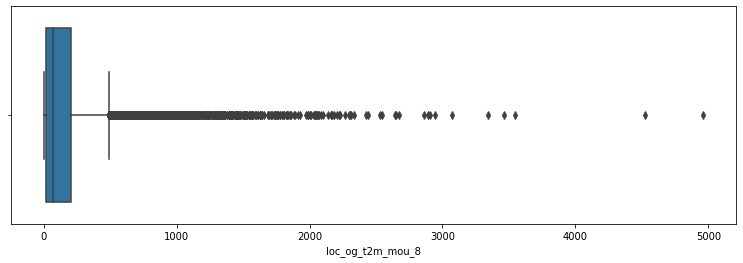

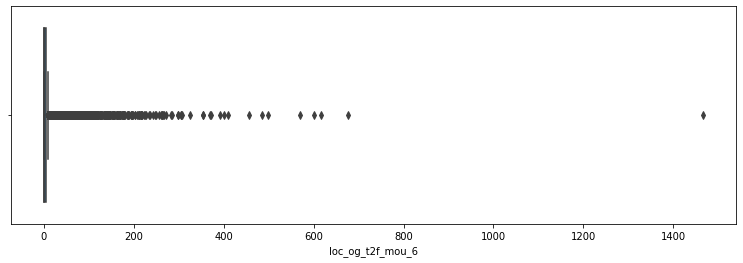

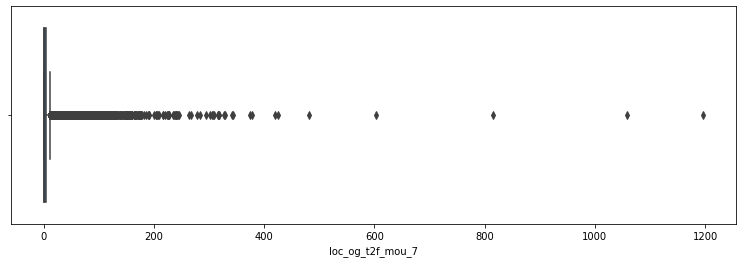

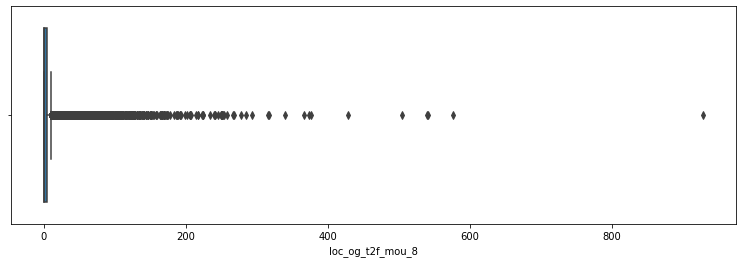

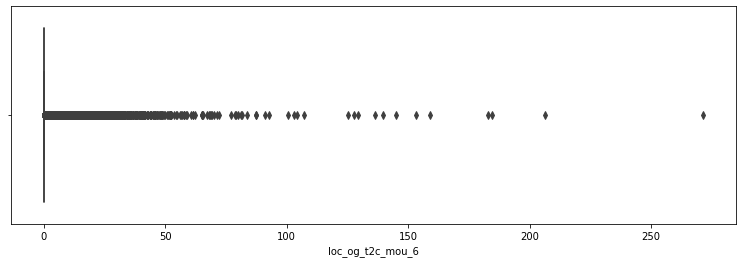

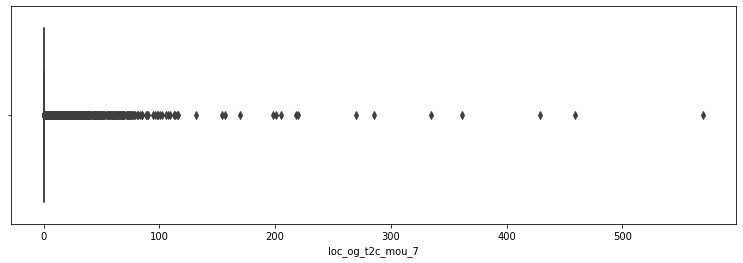

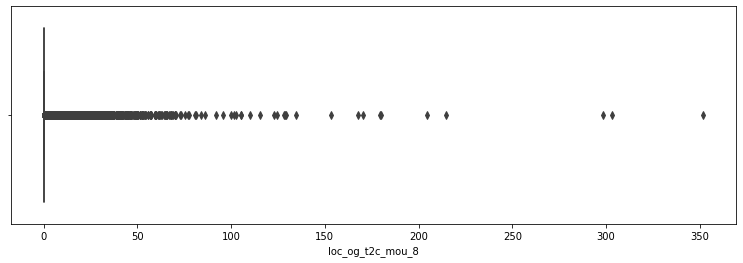

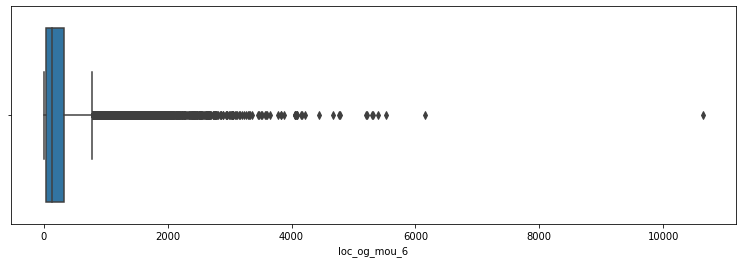

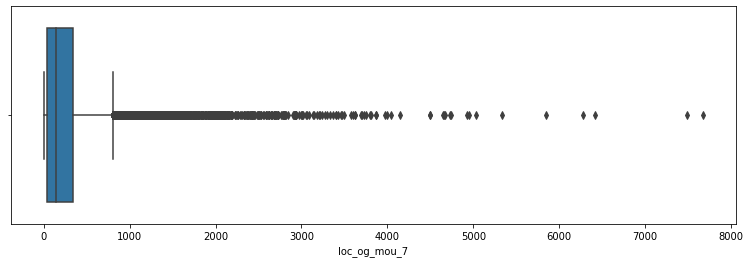

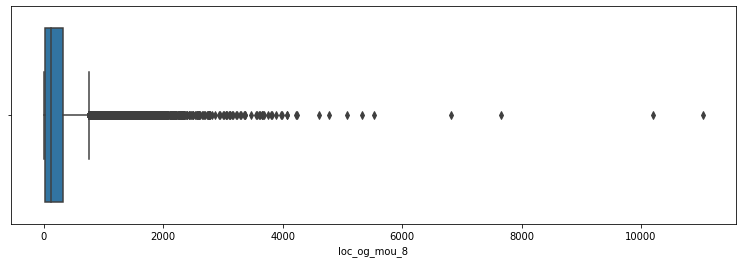

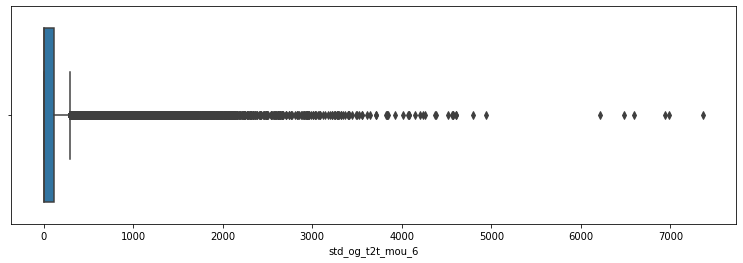

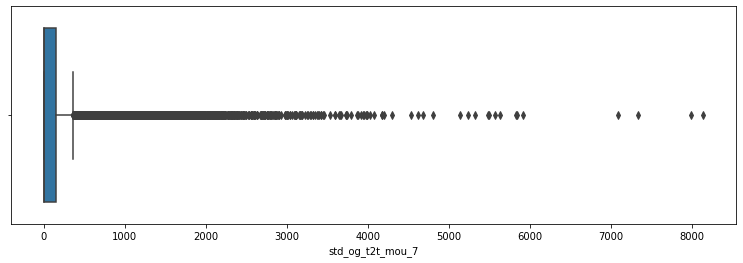

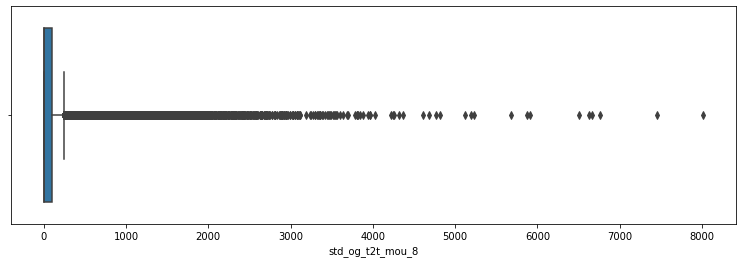

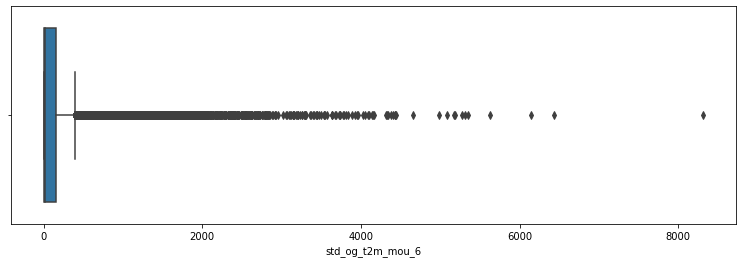

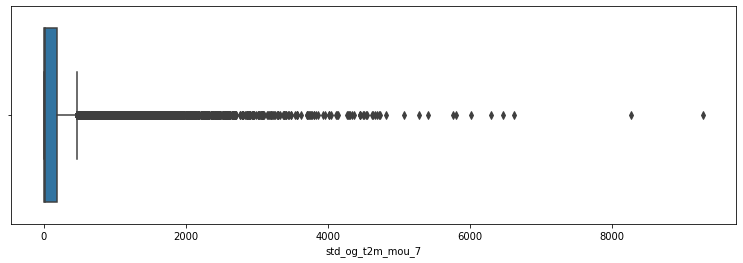

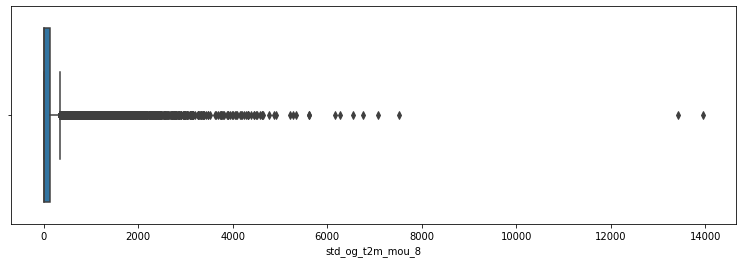

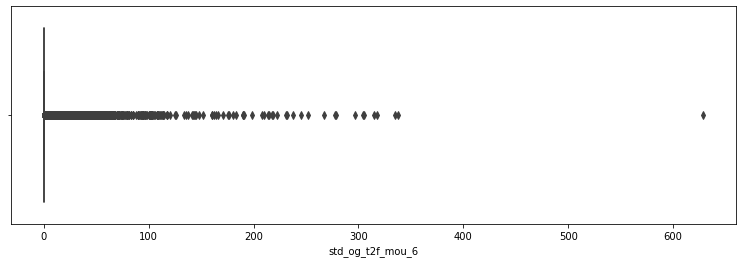

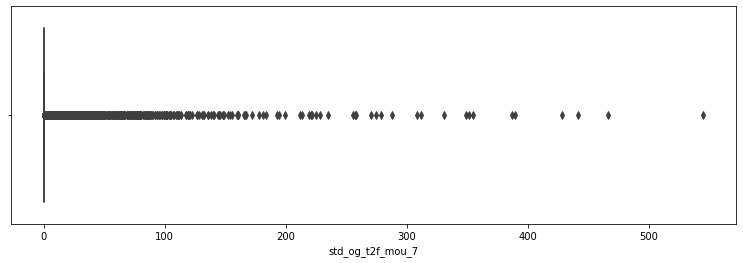

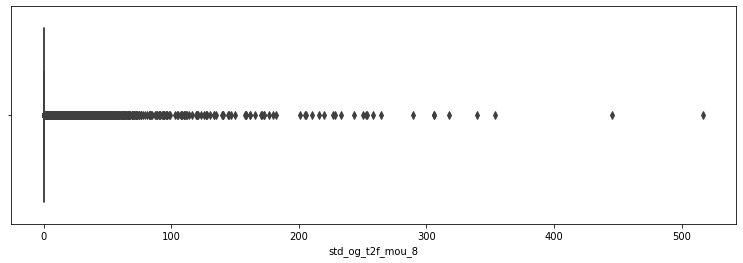

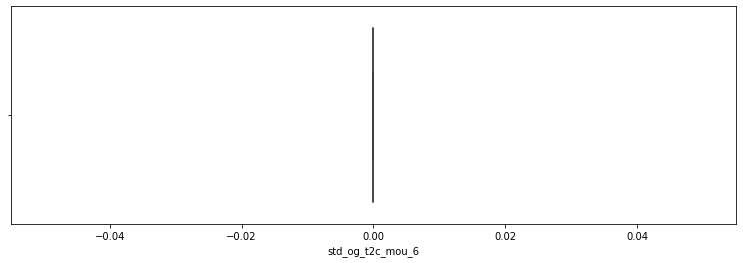

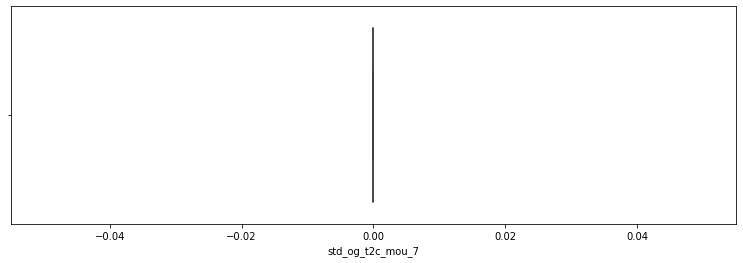

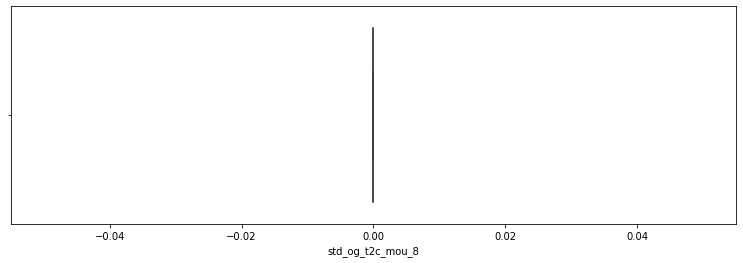

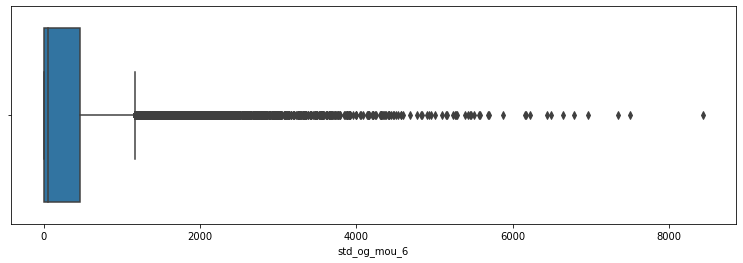

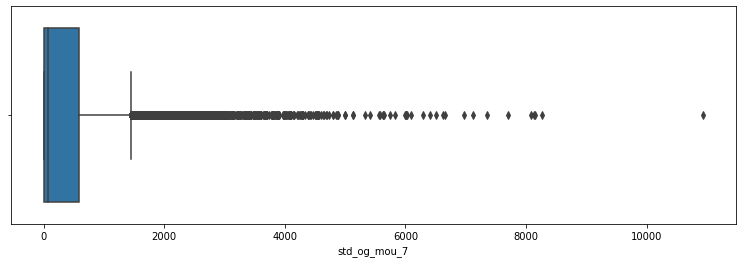

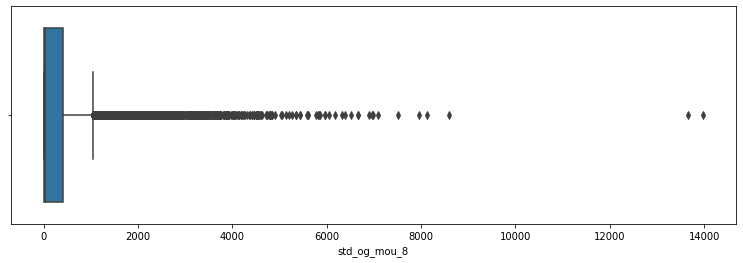

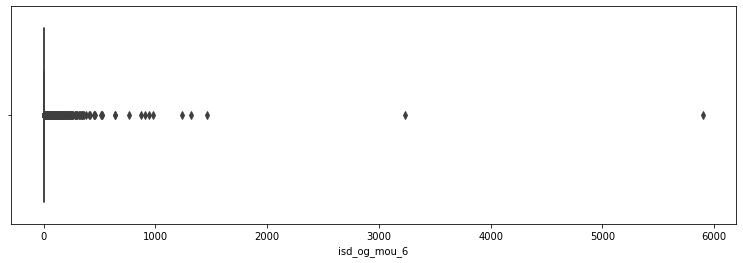

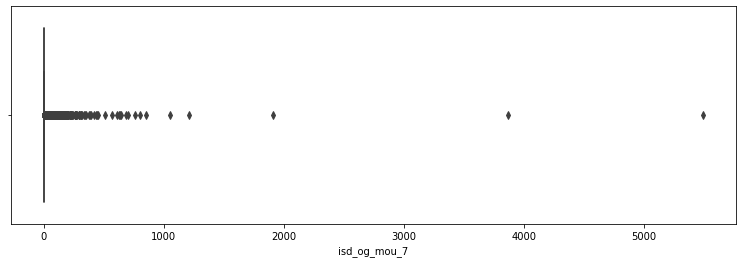

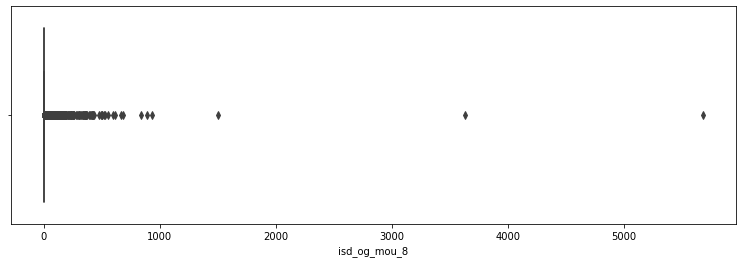

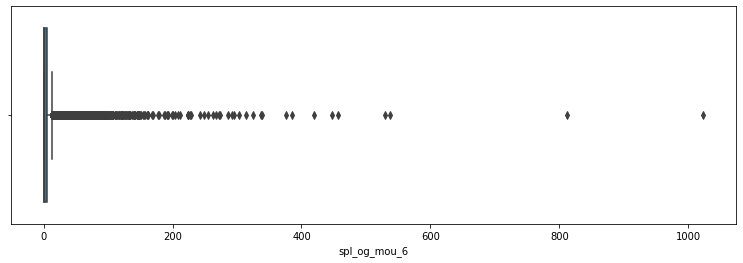

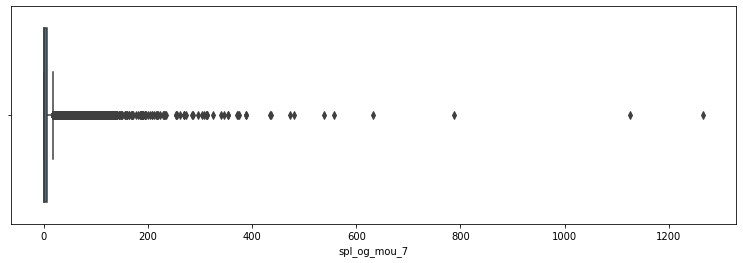

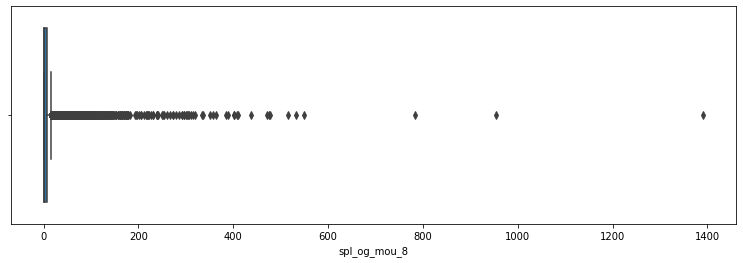

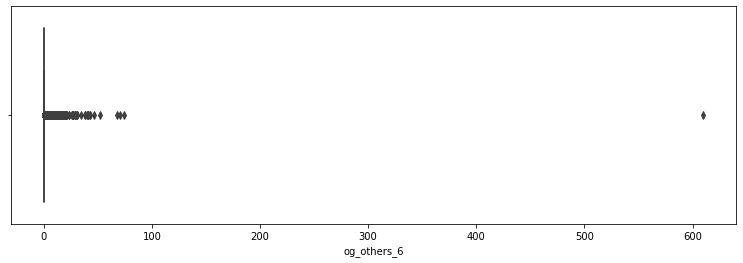

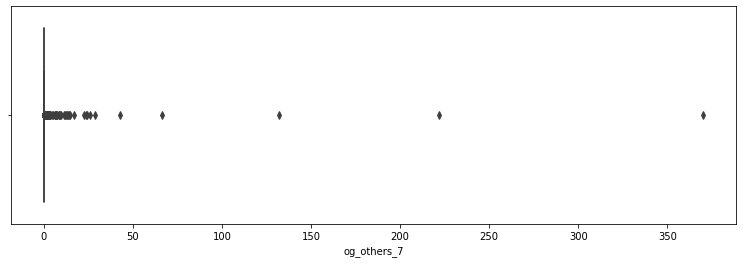

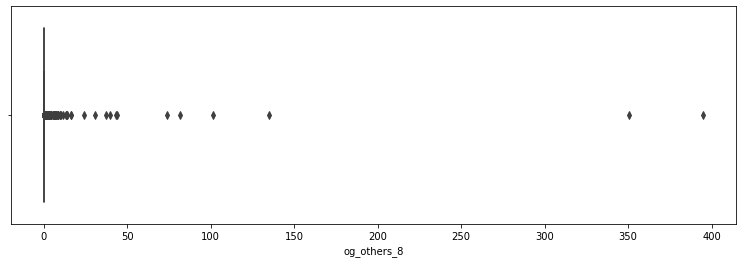

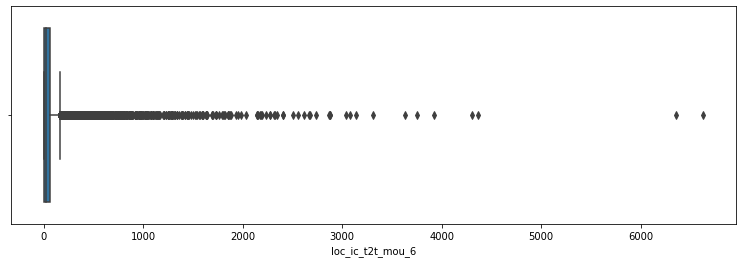

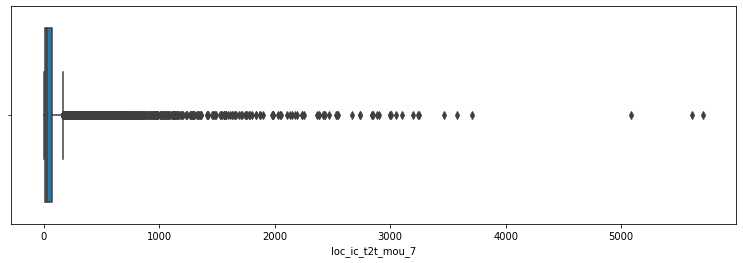

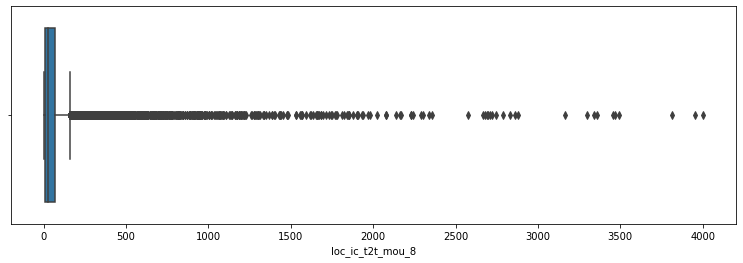

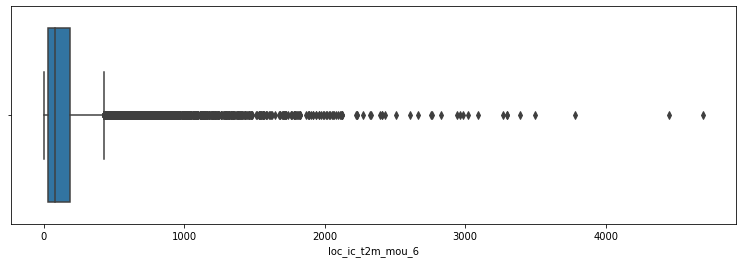

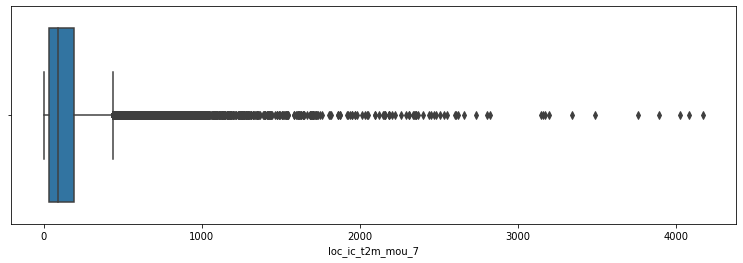

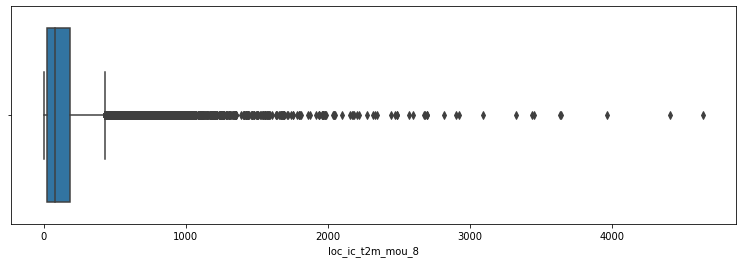

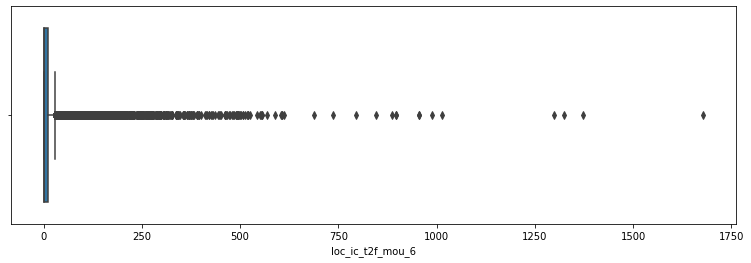

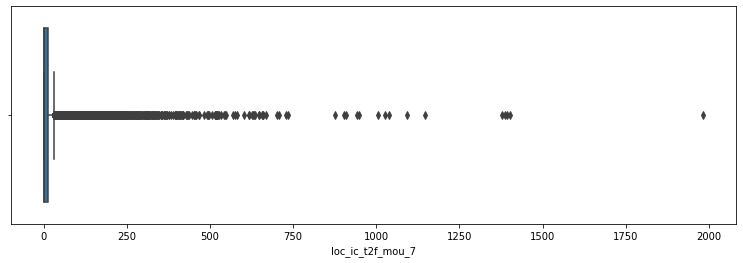

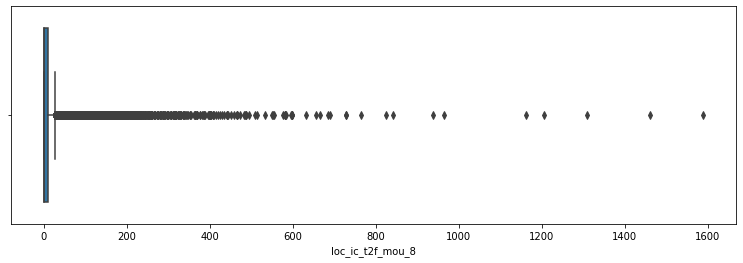

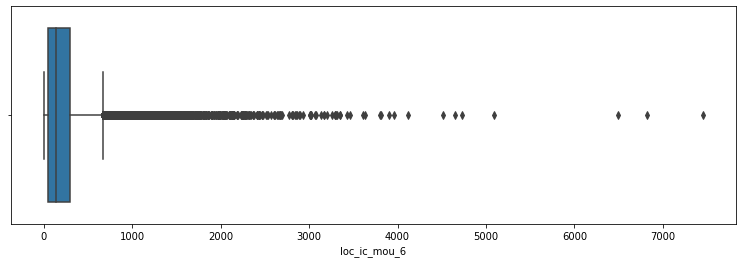

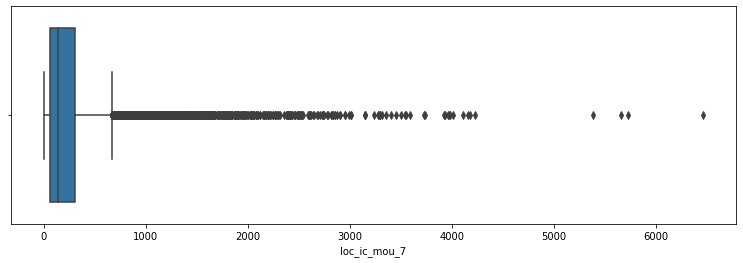

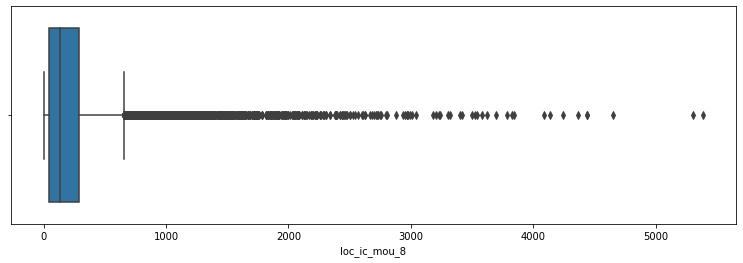

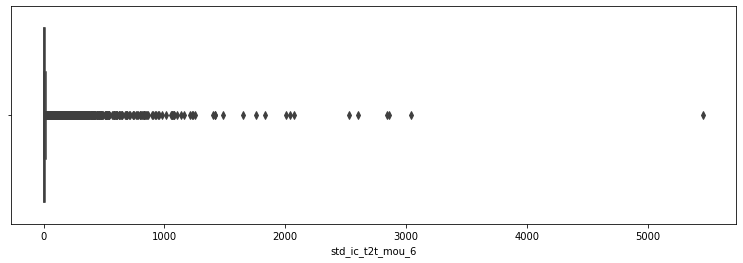

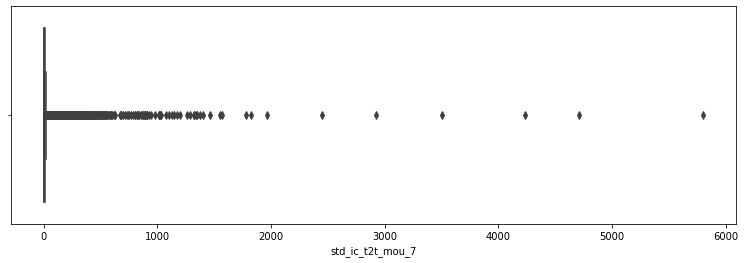

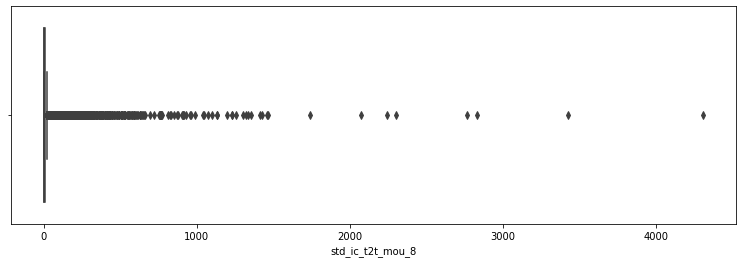

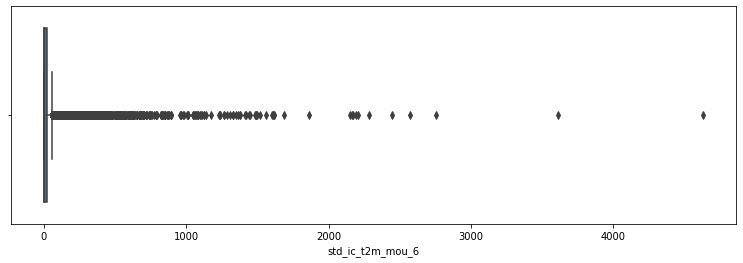

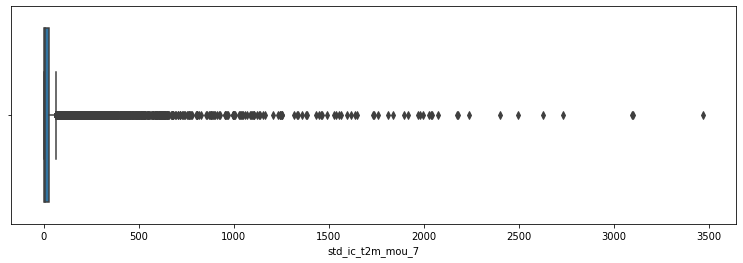

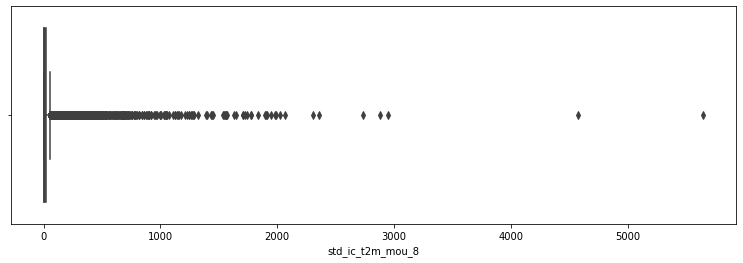

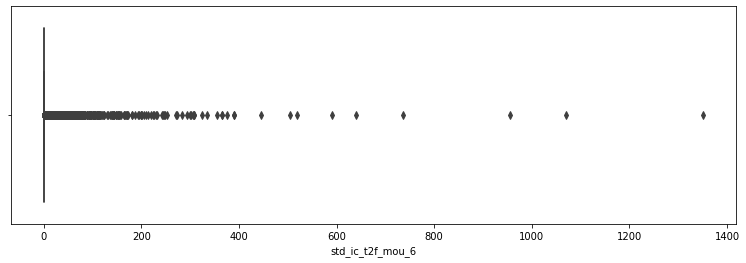

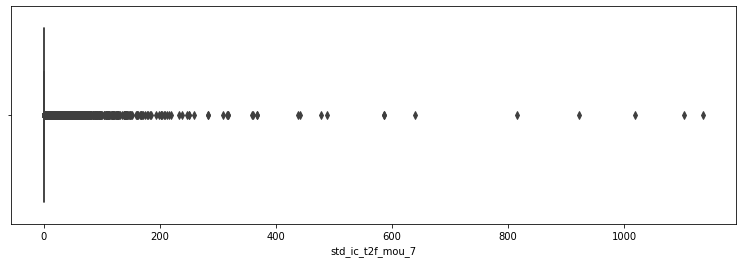

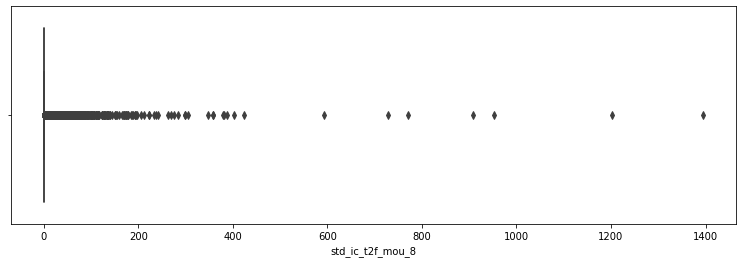

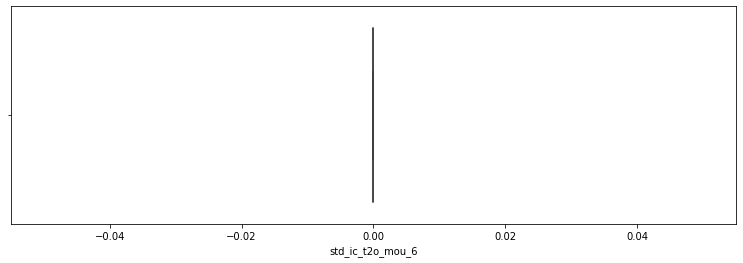

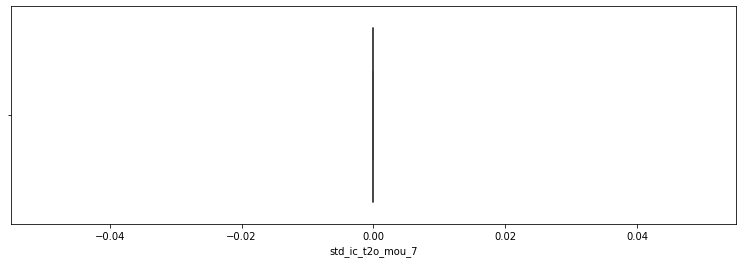

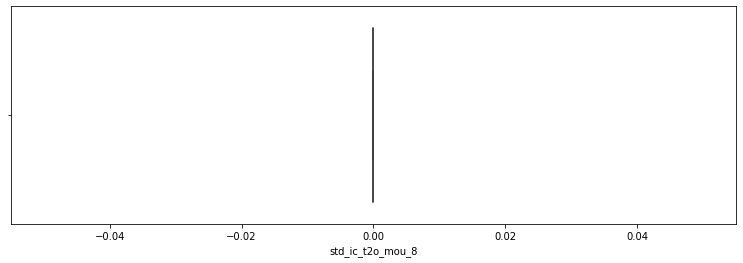

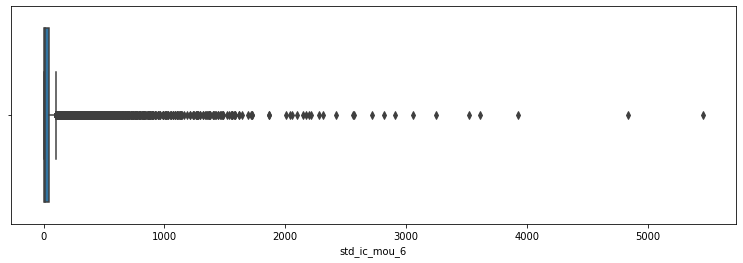

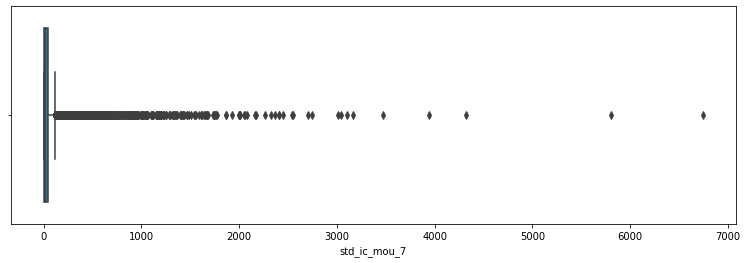

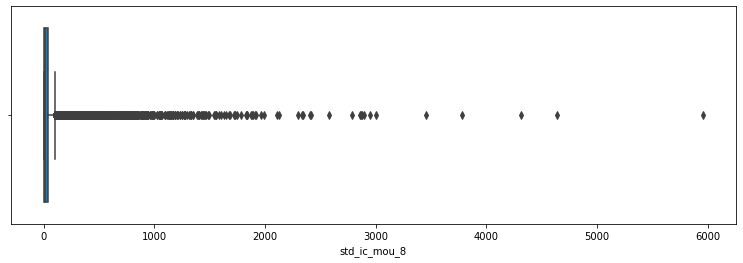

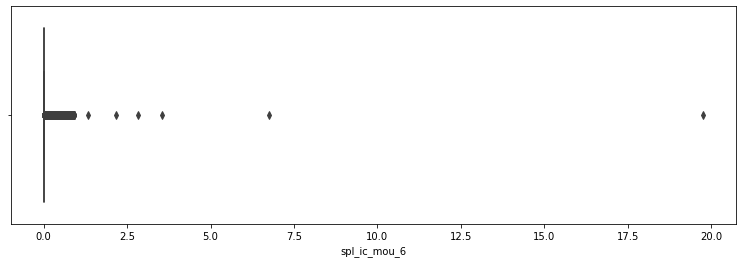

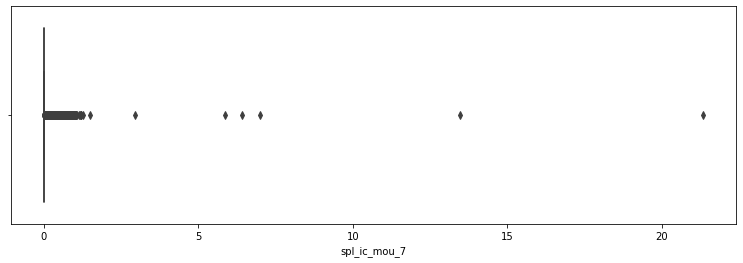

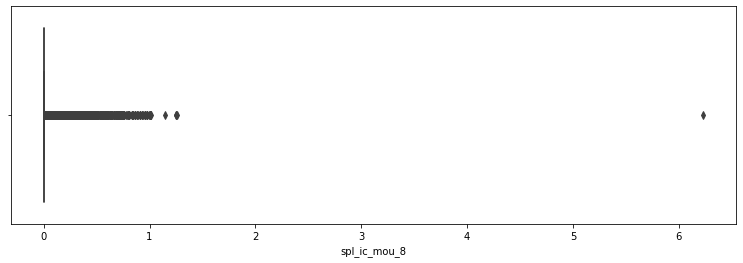

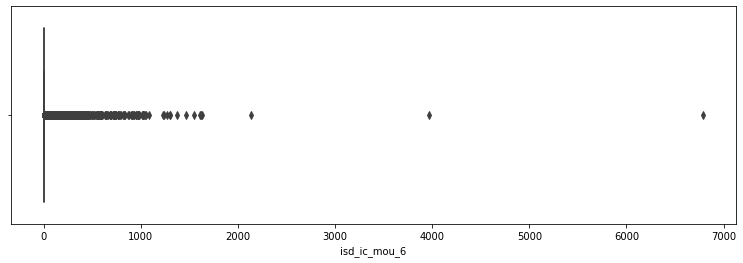

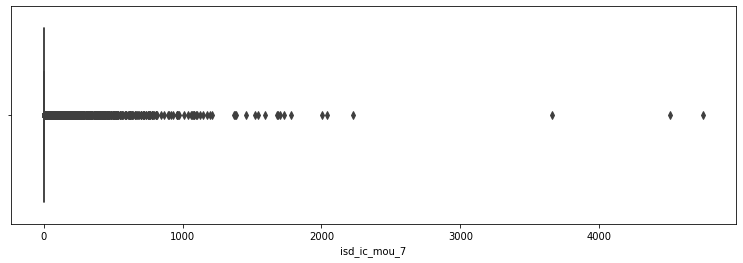

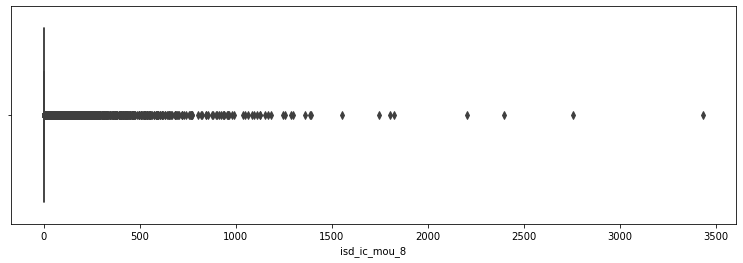

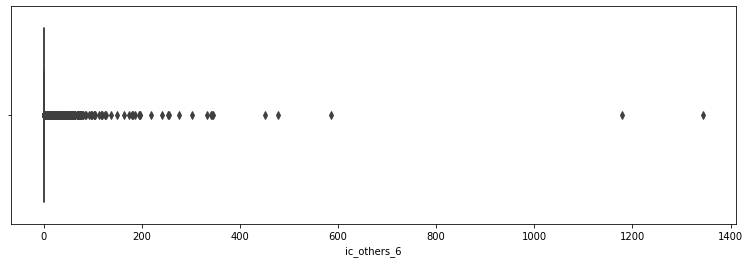

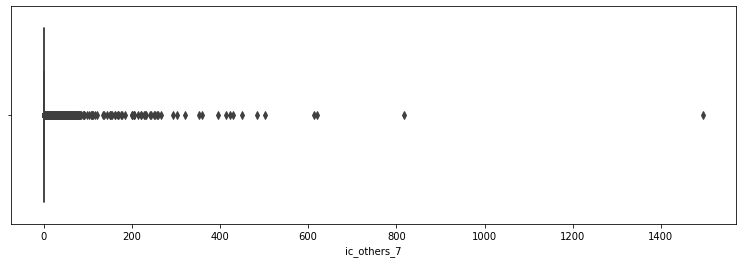

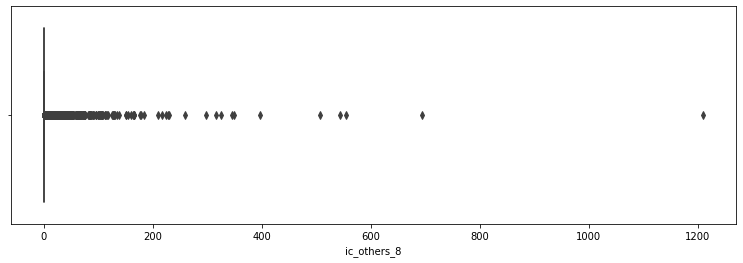

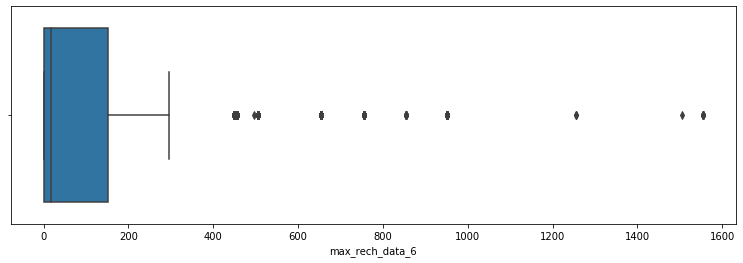

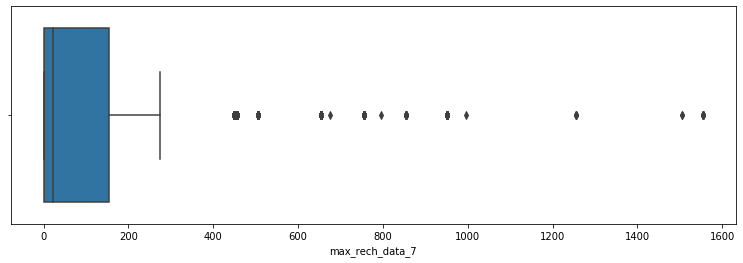

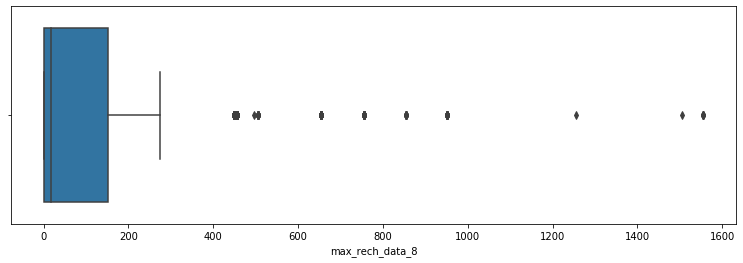

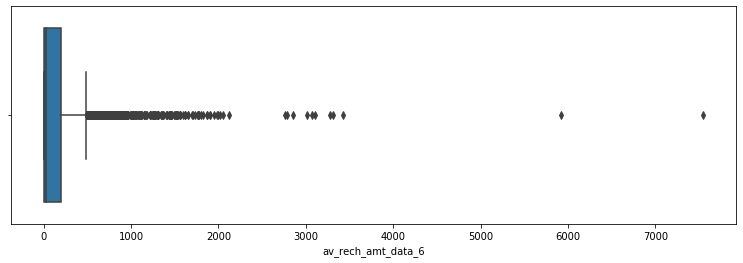

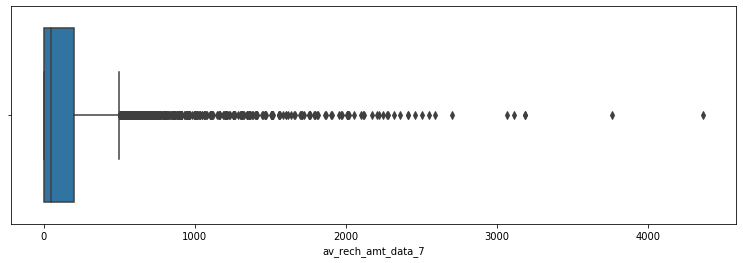

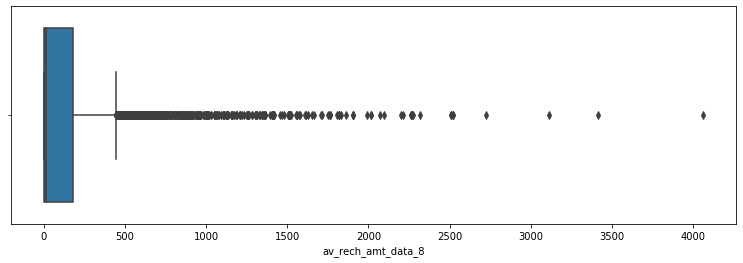

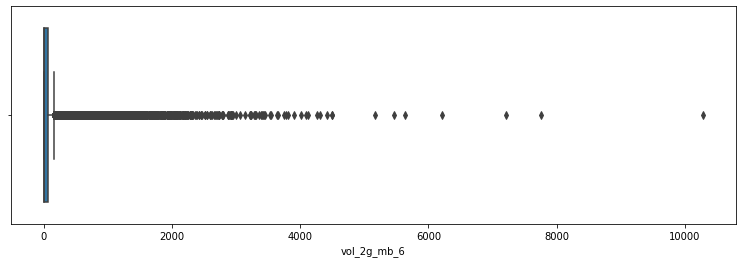

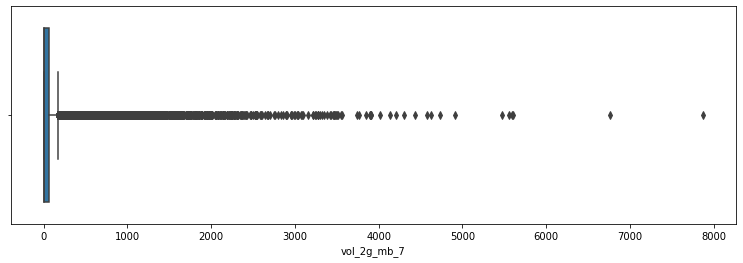

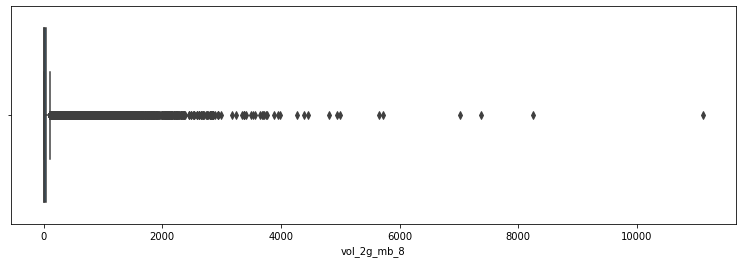

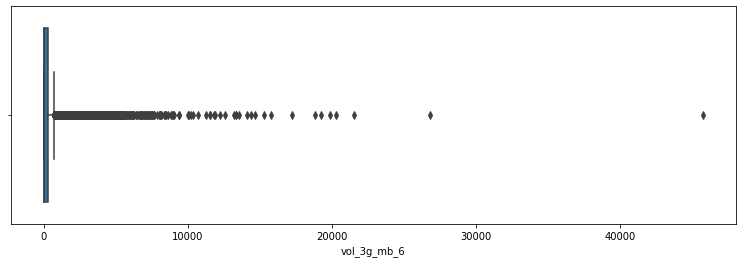

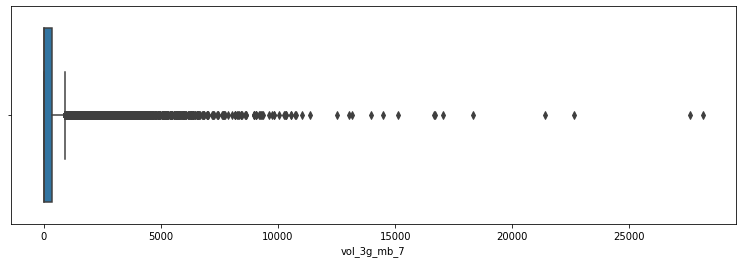

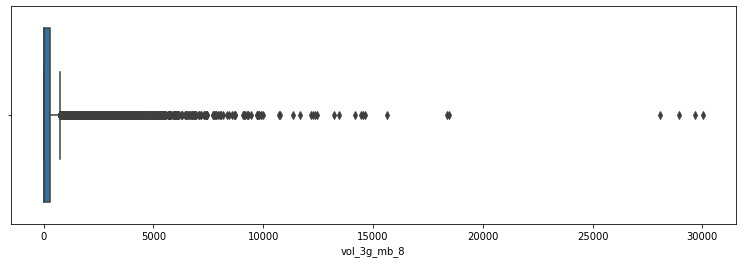

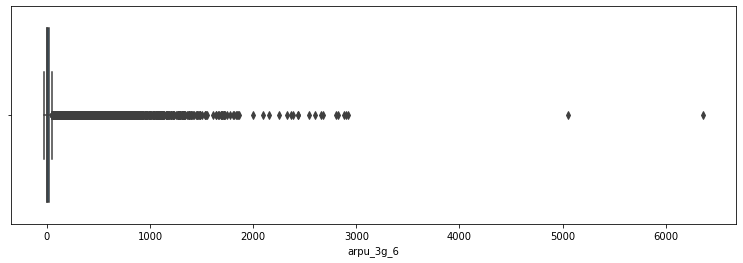

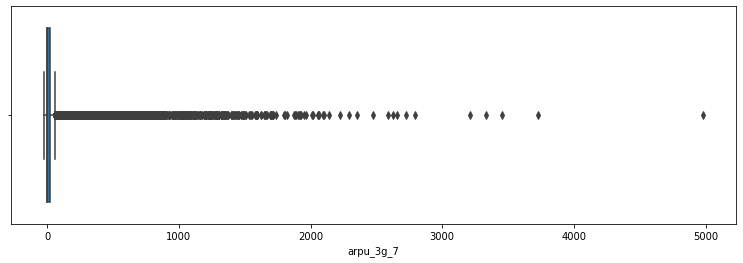

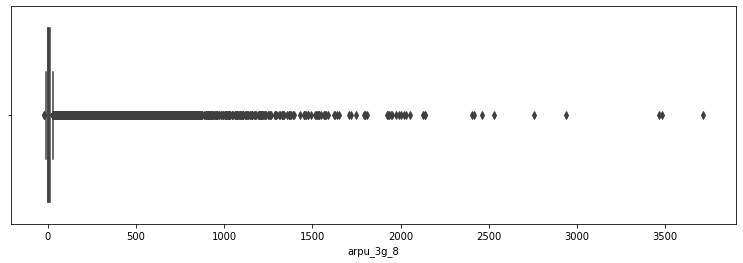

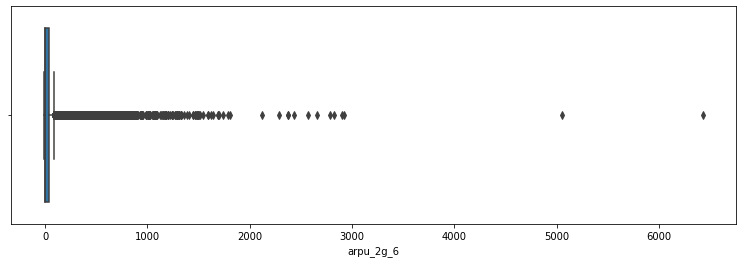

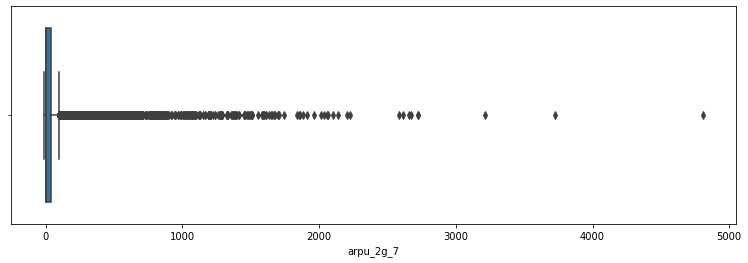

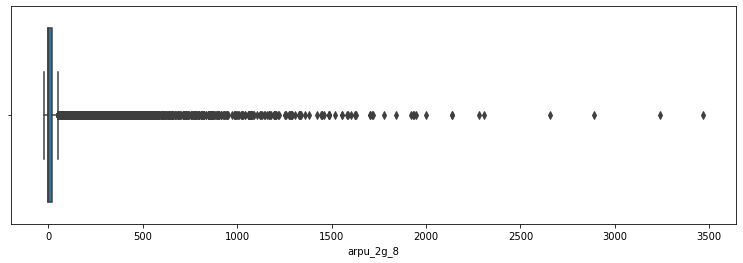

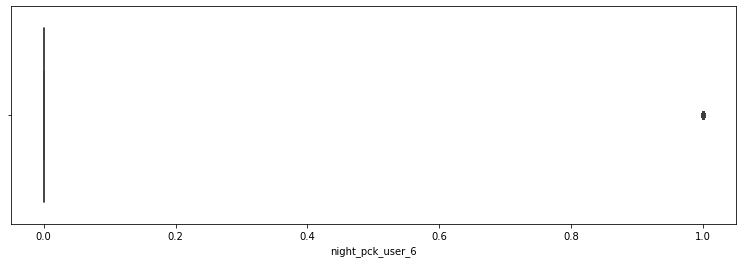

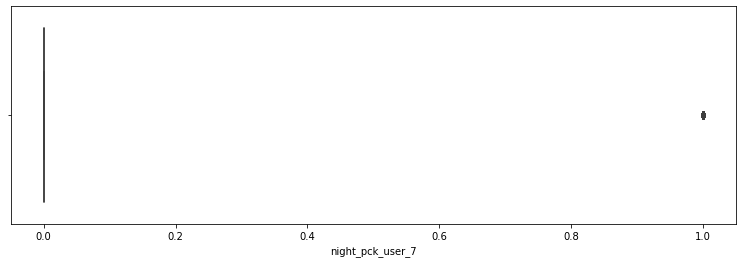

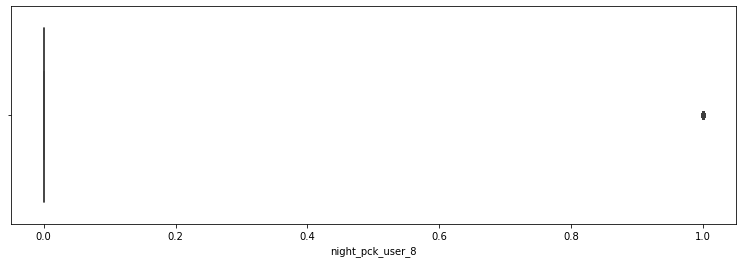

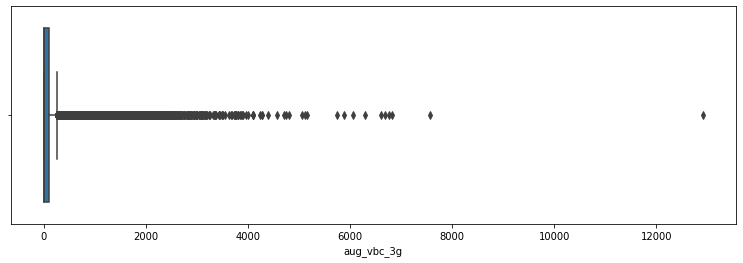

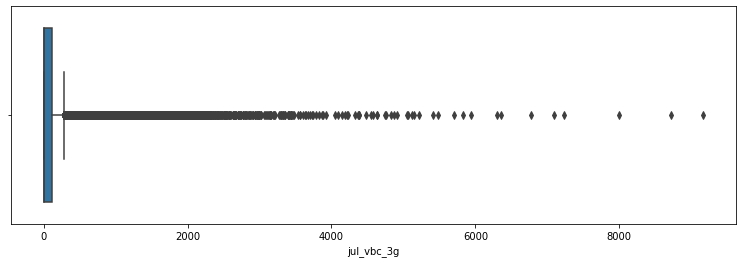

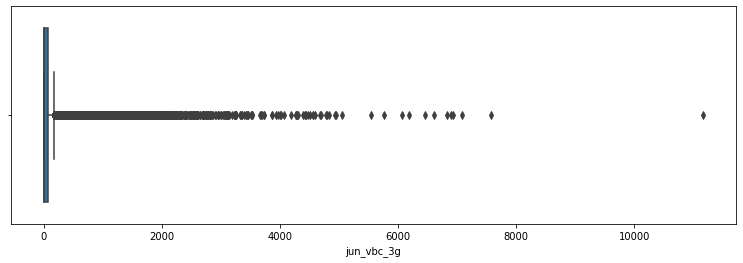

In [55]:
for i in col_float :
    plt.figure(figsize = (13,4))
    sns.boxplot(i,data = df_high_value_1)
    plt.show()

### Outlier Treatment and removing columns having redundant information

In [56]:
quan = [0,0.001,0.01,0.05,0.1,0.2,0.25,0.5,0.75,0.9,0.95,0.99,0.995,0.999,1.0]

In [57]:
df_high_value_1.describe(quan)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   3.000500e+04    30005.0         30005.0         30005.0   
mean    7.001208e+09      109.0             0.0             0.0   
std     6.903221e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
0%      7.000000e+09      109.0             0.0             0.0   
0.1%    7.000003e+09      109.0             0.0             0.0   
1%      7.000026e+09      109.0             0.0             0.0   
5%      7.000128e+09      109.0             0.0             0.0   
10%     7.000254e+09      109.0             0.0             0.0   
20%     7.000494e+09      109.0             0.0             0.0   
25%     7.000613e+09      109.0             0.0             0.0   
50%     7.001207e+09      109.0             0.0             0.0   
75%     7.001805e+09      109.0             0.0             0.0   
90%     7.002165e+09      109.0             0.0             0.0   
95%     7.002286e+09      109.0             0.0             0.0   
99%     7.002387e+09      109.0             0.0             0.0   
99.5%   7.002399e+09      109.0             0.0             0.0   
99.9%   7.002409e+09      109.0             0.0             0.0   
100%    7.002411e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         30005.0  30005.000000  30005.000000  30005.000000  30005.000000   
mean              0.0    551.184189    578.319511    522.166692    261.156801   
std               0.0    460.767202    470.347014    498.061559    455.685938   
min               0.0  -2258.709000  -2014.045000   -945.808000      0.000000   
0%                0.0  -2258.709000  -2014.045000   -945.808000      0.000000   
0.1%              0.0     -2.997092    -10.136860     -4.980000      0.000000   
1%                0.0      0.000000     34.913320      0.000000      0.000000   
5%                0.0    101.449600    146.647000     26.211200      0.000000   
10%               0.0    167.859200    215.240800    108.809200      1.210000   
20%               0.0    266.494400    312.620400    213.785000     11.480000   
25%               0.0    307.122000    349.647000    255.937000     19.390000   
50%               0.0    470.917000    494.485000    442.007000     88.640000   
75%               0.0    690.116000    700.259000    669.606000    293.110000   
90%               0.0    987.024400    994.674600    984.827400    740.072000   
95%               0.0   1238.575000   1260.852200   1258.261400   1120.012000   
99%               0.0   1983.131800   1999.449800   1986.857200   2146.065200   
99.5%             0.0   2415.178920   2387.084600   2384.384520   2712.752000   
99.9%             0.0   3872.443580   4115.448528   4019.476444   4136.199760   
100%              0.0  27731.088000  35145.834000  33543.624000   7376.710000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30005.000000  30005.000000  30005.000000  30005.000000  30005.000000   
mean     283.167071    247.842955    372.347213    396.906207    350.645122   
std      483.578180    464.570505    477.125086    497.948282    483.915126   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
0%         0.000000      0.000000      0.000000      0.000000      0.000000   
0.1%       0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.834000      2.180000      0.000000   
10%        1.844000      0.000000     14.080000     18.590000      5.498000   
20%       13.230000      7.888000     53.022000     62.460000     38.476000   
25%       21.740000     14.3

In [58]:
df_high_value_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30005 entries, 0 to 99997
Columns: 163 entries, mobile_number to churn
dtypes: float64(117), int64(43), object(3)
memory usage: 37.5+ MB


In [59]:
df_high_value_2 = df_high_value_1.copy()

In [60]:
df_high_value_2["d1"] = df_high_value_2["loc_og_t2t_mou_6"] + df_high_value_2["loc_og_t2m_mou_6"] + df_high_value_2["loc_og_t2f_mou_6"] + df_high_value_2["loc_og_t2c_mou_6"] 

In [61]:
df_high_value_2 = df_high_value_2.drop(columns = ["loc_og_t2t_mou_6","loc_og_t2m_mou_6","loc_og_t2f_mou_6","loc_og_t2c_mou_6"])
df_high_value_2.shape

(30005, 160)

In [62]:
df_high_value_2 = df_high_value_2.drop(columns = ["loc_og_t2t_mou_7","loc_og_t2m_mou_7","loc_og_t2f_mou_7","loc_og_t2c_mou_7", "loc_og_t2t_mou_8","loc_og_t2m_mou_8","loc_og_t2f_mou_8","loc_og_t2c_mou_8"])
df_high_value_2.shape

(30005, 152)

In [63]:
df_high_value_2 = df_high_value_2.drop(columns = ["std_og_t2t_mou_6","std_og_t2f_mou_6","std_og_t2c_mou_6","std_og_t2m_mou_6", "std_og_t2t_mou_7","std_og_t2f_mou_7","std_og_t2c_mou_7","std_og_t2m_mou_7" , "std_og_t2t_mou_8","std_og_t2f_mou_8","std_og_t2c_mou_8","std_og_t2m_mou_8"])
df_high_value_2.shape

(30005, 140)

In [64]:
df_high_value_2.loc[df_high_value_2["d1"] != df_high_value_2["loc_og_mou_6"],["d1","loc_og_mou_6"]]

d1  loc_og_mou_6
7       422.15        422.16
23      131.90        131.91
41      283.22        283.24
48     1642.62       1642.58
53      359.66        357.03
56      166.05        166.06
57      184.17        182.08
60      262.25        262.26
61      365.08        365.09
69       48.24         48.24
73      334.15        334.16
87      521.34        521.36
92      519.19        519.04
96      109.85        109.86
101      21.40         21.41
102     117.70        117.71
103     904.75        801.88
105    1166.90       1166.91
111      99.02         99.03
115    1118.86       1118.88
124      56.97         56.98
131     472.53        468.04
133     904.69        904.71
134     614.57        614.59
147     179.50        179.51
149     448.79        441.09
154     460.77        460.78
157     278.54        278.56
158     249.95        249.96
170     249.25        249.26
172      30.51         26.71
173     265.90        265.91
175     331.12        331.13
176     676.50        676.51
177      49.78         49.79
184     237.18        232.89
185     220.27        206.63
188     109.53        109.54
193       3.36          3.36
195     424.63        424.64
199     105.18        104.48
204    1227.61       1198.64
208     120.69        120.69
212       3.43          0.00
213     115.60        114.33
218      43.55         43.56
224      79.96         79.98
225     717.16        716.08
235     508.31        505.31
241     874.97        874.98
244     415.70        415.71
246     819.43        818.19
252      10.64         10.64
253      38.52         38.53
255      45.02         45.03
266     903.43        796.28
270      48.30         48.31
274      71.95         71.96
278     306.19        306.21
281     616.04        616.06
283     104.52        104.53
284      71.25         71.26
290     952.88        952.89
293     171.50        171.51
294      50.20         50.21
295     169.72        169.73
304     323.20        323.21
310     333.44        333.46
319     261.56        261.58
320    2187.31       2186.86
321     470.73        470.74
322      92.61         92.63
329      27.38         27.39
333      45.29         45.31
337     366.98        366.99
339      89.00         78.66
345      17.58          7.88
346     501.76        501.78
357       1.85          0.00
358     192.98        192.99
360      16.75         16.76
362     437.99        437.74
365     289.91        289.93
366     367.50        367.51
370      59.78         59.79
379      34.21         34.23
384      83.20         83.21
385      57.02         53.31
387      97.20         97.21
389     332.88        332.89
393     578.59        578.61
398      64.65         64.66
402     182.30        179.78
407     178.31        173.34
408       5.71          0.00
409     412.56        412.58
427     626.37        626.38
428       2.02          1.51
448      36.07         36.08
457       7.45          7.46
460      98.98         98.99
462      15.73         10.76
467     461.90        461.91
471     134.67        134.68
476      54.82         54.83
478      26.42         26.43
485       4.82          4.19
488     229.12        229.13
502     629.25        629.26
507      56.82         56.83
512     113.29         96.01
514     121.05        121.06
527     395.50        395.51
528     241.62        239.99
529      75.02         60.86
533      80.00         80.01
536     709.30        709.31
537     497.45        496.39
538      13.72         13.73
539     274.72        274.73
541     356.35        356.36
545     423.47        423.21
547     109.54        109.54
548     116.56        116.58
550     179.70        177.96
552      24.37         24.38
553     377.44        364.54
561     912.25        912.26
563     170.62        170.63
566     106.78        106.79
587     219.22        219.23
588    2413.27       2401.34
594      70.59         70.19
598       3.44          0.58
605     127.22        127.23
606     748.10        748.11
608      93.36         93.28
612      4

In [65]:
df_high_value_2 = df_high_value_2.drop(columns = "d1")
df_high_value_2.shape

(30005, 139)

In [66]:
df_high_value_2["d1"] = df_high_value_2["loc_ic_t2t_mou_6"] + df_high_value_2["loc_ic_t2m_mou_6"] + df_high_value_2["loc_ic_t2f_mou_6"] 

In [67]:
df_high_value_2.loc[:,["d1","loc_ic_mou_6"]].head(5)

d1  loc_ic_mou_6
0     0.00          0.00
7   427.86        427.88
8    81.42         81.43
15    0.00          0.00
21  125.32        125.33

In [68]:
df_high_value_2 = df_high_value_2.drop(columns =  ["loc_ic_t2t_mou_6","loc_ic_t2f_mou_6","loc_ic_t2m_mou_6","loc_ic_t2t_mou_7","loc_ic_t2f_mou_7","loc_ic_t2m_mou_7","loc_ic_t2t_mou_8","loc_ic_t2f_mou_8","loc_ic_t2m_mou_8"])
df_high_value_2.shape             

(30005, 131)

In [69]:
df_high_value_2 = df_high_value_2.drop(columns = "d1")
df_high_value_2.shape

(30005, 130)

In [70]:
df_high_value_2["d1"] = df_high_value_2["std_ic_t2t_mou_6"] + df_high_value_2["std_ic_t2f_mou_6"] + df_high_value_2["std_ic_t2m_mou_6"] + df_high_value_2["std_ic_t2o_mou_6"]
df_high_value_2.loc[:,["std_ic_mou_6","d1"]].head()

std_ic_mou_6      d1
0           0.00    0.00
7         180.54  180.52
8          22.43   22.43
15          0.00    0.00
21         81.76   81.75

In [71]:
df_high_value_2 = df_high_value_2.drop(columns = ["std_ic_t2t_mou_6","std_ic_t2f_mou_6","std_ic_t2o_mou_6","std_ic_t2m_mou_6", "std_ic_t2t_mou_7","std_ic_t2f_mou_7","std_ic_t2o_mou_7","std_ic_t2m_mou_7" , "std_ic_t2t_mou_8","std_ic_t2f_mou_8","std_ic_t2o_mou_8","std_ic_t2m_mou_8"])
df_high_value_2.shape

(30005, 119)

In [72]:
df_high_value_2 = df_high_value_2.drop(columns = "d1")
df_high_value_2.shape

(30005, 118)

In [73]:
df_high_value_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30005 entries, 0 to 99997
Columns: 118 entries, mobile_number to churn
dtypes: float64(72), int64(43), object(3)
memory usage: 27.2+ MB


In [74]:
df_high_value_2["d1"] = df_high_value_2["loc_og_mou_6"] + df_high_value_2["roam_og_mou_6"] + df_high_value_2["std_og_mou_6"] + df_high_value_2["isd_og_mou_6"]+df_high_value_2["spl_og_mou_6"]+df_high_value_2["og_others_6"]

In [75]:
df_high_value_2 = df_high_value_2.drop(columns =["total_og_mou_6", "total_og_mou_7", "total_og_mou_8"])
df_high_value_2.shape

(30005, 116)

In [76]:
df_high_value_2["d1"] = df_high_value_2["loc_ic_mou_6"] + df_high_value_2["roam_ic_mou_6"] + df_high_value_2["std_ic_mou_6"] + df_high_value_2["isd_ic_mou_6"]+df_high_value_2["spl_ic_mou_6"]+df_high_value_2["ic_others_6"]

In [77]:
df_high_value_2 = df_high_value_2.drop(columns = ["d1","total_ic_mou_6"])
df_high_value_2.shape

(30005, 114)

In [78]:
df_high_value_2 = df_high_value_2.drop(columns = ["total_ic_mou_7","total_ic_mou_8"])
df_high_value_2.shape

(30005, 112)

In [79]:
df_high_value_2 = df_high_value_2.drop(columns = ["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou"])
df_high_value_2.shape

(30005, 109)

In [80]:
df_high_value_2.rename(columns = {'aug_vbc_3g' : 'vbc_3g_8','jul_vbc_3g' : 'vbc_3g_7','jun_vbc_3g' : 'vbc_3g_6'},inplace = True)


In [81]:
df_high_value_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30005 entries, 0 to 99997
Columns: 109 entries, mobile_number to churn
dtypes: float64(69), int64(37), object(3)
memory usage: 25.2+ MB


In [82]:
c6 = list(df_high_value_2.select_dtypes(exclude = 'object'))

In [83]:
c6 = c6[5:]

In [84]:
c7  = c6[0:len(c6) - 1]

In [85]:
print(c7)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rec

In [86]:
df_high_value_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30005 entries, 0 to 99997
Columns: 109 entries, mobile_number to churn
dtypes: float64(69), int64(37), object(3)
memory usage: 25.2+ MB


In [87]:
df_high_value_2["total_rech_num_6"].describe(quan)

count    30005.000000
mean        11.745942
std          9.360655
min          0.000000
0%           0.000000
0.1%         0.000000
1%           1.000000
5%           3.000000
10%          4.000000
20%          5.000000
25%          6.000000
50%          9.000000
75%         15.000000
90%         22.000000
95%         29.000000
99%         47.000000
99.5%       55.000000
99.9%       77.000000
100%       307.000000
max        307.000000
Name: total_rech_num_6, dtype: float64

### Outlier Capping

In [88]:
# checking for number of values in each field with more than 3 z -score value
for i in c7:
    stddev = np.std(df_high_value_2[i])
    avg =np.mean(df_high_value_2[i])
    len1 = len(df_high_value_2.loc[np.abs(((df_high_value_2[i] - avg)/stddev) > 3),[i]])
    print(i , " - " ,len1)

onnet_mou_6  -  623
onnet_mou_7  -  636
onnet_mou_8  -  634
offnet_mou_6  -  621
offnet_mou_7  -  559
offnet_mou_8  -  539
roam_ic_mou_6  -  495
roam_ic_mou_7  -  379
roam_ic_mou_8  -  379
roam_og_mou_6  -  534
roam_og_mou_7  -  510
roam_og_mou_8  -  424
loc_og_mou_6  -  568
loc_og_mou_7  -  540
loc_og_mou_8  -  552
std_og_mou_6  -  610
std_og_mou_7  -  596
std_og_mou_8  -  587
isd_og_mou_6  -  101
isd_og_mou_7  -  95
isd_og_mou_8  -  97
spl_og_mou_6  -  371
spl_og_mou_7  -  337
spl_og_mou_8  -  291
og_others_6  -  119
og_others_7  -  23
og_others_8  -  20
loc_ic_mou_6  -  538
loc_ic_mou_7  -  551
loc_ic_mou_8  -  548
std_ic_mou_6  -  402
std_ic_mou_7  -  418
std_ic_mou_8  -  393
spl_ic_mou_6  -  367
spl_ic_mou_7  -  256
spl_ic_mou_8  -  838
isd_ic_mou_6  -  284
isd_ic_mou_7  -  269
isd_ic_mou_8  -  324
ic_others_6  -  120
ic_others_7  -  134
ic_others_8  -  153
total_rech_num_6  -  567
total_rech_num_7  -  569
total_rech_num_8  -  599
total_rech_amt_6  -  327
total_rech_amt_7  -  320


In [89]:

for i in c7:

    l2 = df_high_value_2[i].quantile(0.99)
    
    df_high_value_2.loc[df_high_value_2[i] > l2,i ] = df_high_value_2[i].quantile(0.99)

In [90]:
df_high_value_2.describe()

mobile_number  circle_id        arpu_6        arpu_7        arpu_8  \
count   3.000500e+04    30005.0  30005.000000  30005.000000  30005.000000   
mean    7.001208e+09      109.0    551.184189    578.319511    522.166692   
std     6.903221e+05        0.0    460.767202    470.347014    498.061559   
min     7.000000e+09      109.0  -2258.709000  -2014.045000   -945.808000   
25%     7.000613e+09      109.0    307.122000    349.647000    255.937000   
50%     7.001207e+09      109.0    470.917000    494.485000    442.007000   
75%     7.001805e+09      109.0    690.116000    700.259000    669.606000   
max     7.002411e+09      109.0  27731.088000  35145.834000  33543.624000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  30005.000000  30005.000000  30005.000000  30005.000000  30005.000000   
mean     252.502525    274.022552    238.571128    364.577884    388.318024   
std      398.891387    422.763399    397.923189    428.360758    443.180485   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       19.390000     21.740000     14.340000     76.740000     87.310000   
50%       88.640000     96.980000     76.410000    226.190000    243.790000   
75%      293.110000    322.660000    263.540000    483.030000    517.810000   
max     2146.065200   2215.422800   2165.531600   2325.278800   2410.575600   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  30005.000000   30005.000000   30005.000000   30005.000000   
mean     340.662836      13.434545       9.759378       9.902726   
std      412.357815      48.420558      38.897681      39.222477   
min        0.000000       0.000000       0.000000       0.000000   
25%       59.530000       0.000000       0.000000       0.000000   
50%      204.340000       0.000000       0.000000       0.000000   
75%      459.090000       0.000000       0.000000       0.000000   
max     2212.784000     336.022000     281.904000     283.703200   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
count   30005.000000   30005.000000   30005.000000  30005.000000   
mean       22.490166      17.107602      16.383051    247.097854   
std        77.732866      64.152131      61.385990    324.845723   
min         0.000000       0.000000       0.000000      0.000000   
25%         0.000000       0.000000       0.000000     32.790000   
50%         0.000000       0.000000       0.000000    126.330000   
75%         0.000000       0.000000       0.000000    334.910000   
max       520.227200     448.028400     430.767600   1778.754000   

       loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
count  30005.000000  30005.000000  30005.000000  30005.000000  30005.000000   
mean     255.787608    235.531869    336.793226    379.286437    318.379525   
std      322.163301    310.317324    548.546244    586.376022    546.641894   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       40.530000     27.480000      0.700000      0.950000      0.000000   
50%      138.180000    119.310000     53.380000     66.230000     36.890000   
75%      347.080000    320.710000    466.190000    578.530000    417.330000   
max     1755.866000   1669.648000   2738.188000   2874.944000   2786.742000   

       isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
count  30005.000000  30005.000000  30005.000000  30005.000000  30005.000000   
mean       0.648262      0.734521      0.508090      5.148986      6.683533   
std        4.110068      4.551286      3.372092     11.040190     13.193229   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.180000      0.830000   
75%        0.000000      0.000000      0.000000      5.010000      7.290000   
max       35.888800     38.5876

In [91]:
l1 = df_high_value_2["arpu_6"].quantile(0.01)
l2 = df_high_value_2["arpu_6"].quantile(0.99)
df_high_value_2.loc[df_high_value_2["arpu_6"] < l1, "arpu_6"] = df_high_value_2["arpu_6"].quantile(0.01)
df_high_value_2.loc[df_high_value_2["arpu_6"] > l2, "arpu_6"] = df_high_value_2["arpu_6"].quantile(0.99)

In [92]:
l1 = df_high_value_2["arpu_7"].quantile(0.01)
l2 = df_high_value_2["arpu_7"].quantile(0.99)
df_high_value_2.loc[df_high_value_2["arpu_7"] < l1, "arpu_7"] = df_high_value_2["arpu_7"].quantile(0.01)
df_high_value_2.loc[df_high_value_2["arpu_7"] > l2, "arpu_7"] = df_high_value_2["arpu_7"].quantile(0.99)

In [93]:
l1 = df_high_value_2["arpu_8"].quantile(0.01)
l2 = df_high_value_2["arpu_8"].quantile(0.99)
df_high_value_2.loc[df_high_value_2["arpu_8"] < l1, "arpu_8"] = df_high_value_2["arpu_8"].quantile(0.01)
df_high_value_2.loc[df_high_value_2["arpu_8"] > l2, "arpu_8"] = df_high_value_2["arpu_8"].quantile(0.99)

In [94]:
df_high_value_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30005 entries, 0 to 99997
Columns: 109 entries, mobile_number to churn
dtypes: float64(103), int64(3), object(3)
memory usage: 25.2+ MB


In [95]:
c12 = pd.Series(df_high_value_2.columns)
c13 = c12[(c12.str.find("total") > -1) | (c12.str.find("count") > -1)]
df_high_value_2[c13] = df_high_value_2[c13].astype('int64')
df_high_value_2.info()
df_high_value_2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30005 entries, 0 to 99997
Columns: 109 entries, mobile_number to churn
dtypes: float64(88), int64(18), object(3)
memory usage: 25.2+ MB


mobile_number  circle_id        arpu_6        arpu_7        arpu_8  \
count   3.000500e+04    30005.0  30005.000000  30005.000000  30005.000000   
mean    7.001208e+09      109.0    541.554265    568.896909    511.738110   
std     6.903221e+05        0.0    358.684253    347.855037    378.036363   
min     7.000000e+09      109.0      0.000000     34.913320      0.000000   
25%     7.000613e+09      109.0    307.122000    349.647000    255.937000   
50%     7.001207e+09      109.0    470.917000    494.485000    442.007000   
75%     7.001805e+09      109.0    690.116000    700.259000    669.606000   
max     7.002411e+09      109.0   1983.131800   1999.449800   1986.857200   

        onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  30005.000000  30005.000000  30005.000000  30005.000000  30005.000000   
mean     252.502525    274.022552    238.571128    364.577884    388.318024   
std      398.891387    422.763399    397.923189    428.360758    443.180485   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       19.390000     21.740000     14.340000     76.740000     87.310000   
50%       88.640000     96.980000     76.410000    226.190000    243.790000   
75%      293.110000    322.660000    263.540000    483.030000    517.810000   
max     2146.065200   2215.422800   2165.531600   2325.278800   2410.575600   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  30005.000000   30005.000000   30005.000000   30005.000000   
mean     340.662836      13.434545       9.759378       9.902726   
std      412.357815      48.420558      38.897681      39.222477   
min        0.000000       0.000000       0.000000       0.000000   
25%       59.530000       0.000000       0.000000       0.000000   
50%      204.340000       0.000000       0.000000       0.000000   
75%      459.090000       0.000000       0.000000       0.000000   
max     2212.784000     336.022000     281.904000     283.703200   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
count   30005.000000   30005.000000   30005.000000  30005.000000   
mean       22.490166      17.107602      16.383051    247.097854   
std        77.732866      64.152131      61.385990    324.845723   
min         0.000000       0.000000       0.000000      0.000000   
25%         0.000000       0.000000       0.000000     32.790000   
50%         0.000000       0.000000       0.000000    126.330000   
75%         0.000000       0.000000       0.000000    334.910000   
max       520.227200     448.028400     430.767600   1778.754000   

       loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
count  30005.000000  30005.000000  30005.000000  30005.000000  30005.000000   
mean     255.787608    235.531869    336.793226    379.286437    318.379525   
std      322.163301    310.317324    548.546244    586.376022    546.641894   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       40.530000     27.480000      0.700000      0.950000      0.000000   
50%      138.180000    119.310000     53.380000     66.230000     36.890000   
75%      347.080000    320.710000    466.190000    578.530000    417.330000   
max     1755.866000   1669.648000   2738.188000   2874.944000   2786.742000   

       isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
count  30005.000000  30005.000000  30005.000000  30005.000000  30005.000000   
mean       0.648262      0.734521      0.508090      5.148986      6.683533   
std        4.110068      4.551286      3.372092     11.040190     13.193229   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.180000      0.830000   
75%        0.000000      0.000000      0.000000      5.010000      7.290000   
max       35.888800     38.5876

In [96]:
quan1 = [0,0.01,0.05,0.25,0.5,0.75,0.9,0.99,1.0]

In [97]:
df_high_value_2.describe(quan1)

mobile_number  circle_id        arpu_6        arpu_7        arpu_8  \
count   3.000500e+04    30005.0  30005.000000  30005.000000  30005.000000   
mean    7.001208e+09      109.0    541.554265    568.896909    511.738110   
std     6.903221e+05        0.0    358.684253    347.855037    378.036363   
min     7.000000e+09      109.0      0.000000     34.913320      0.000000   
0%      7.000000e+09      109.0      0.000000     34.913320      0.000000   
1%      7.000026e+09      109.0      0.000000     34.936667      0.000000   
5%      7.000128e+09      109.0    101.449600    146.647000     26.211200   
25%     7.000613e+09      109.0    307.122000    349.647000    255.937000   
50%     7.001207e+09      109.0    470.917000    494.485000    442.007000   
75%     7.001805e+09      109.0    690.116000    700.259000    669.606000   
90%     7.002165e+09      109.0    987.024400    994.674600    984.827400   
99%     7.002387e+09      109.0   1983.104728   1999.401608   1986.847792   
100%    7.002411e+09      109.0   1983.131800   1999.449800   1986.857200   
max     7.002411e+09      109.0   1983.131800   1999.449800   1986.857200   

        onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  30005.000000  30005.000000  30005.000000  30005.000000  30005.000000   
mean     252.502525    274.022552    238.571128    364.577884    388.318024   
std      398.891387    422.763399    397.923189    428.360758    443.180485   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
0%         0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.000000      0.834000      2.180000   
25%       19.390000     21.740000     14.340000     76.740000     87.310000   
50%       88.640000     96.980000     76.410000    226.190000    243.790000   
75%      293.110000    322.660000    263.540000    483.030000    517.810000   
90%      740.072000    816.064000    698.878000    875.948000    935.690000   
99%     2146.022192   2215.339088   2165.523536   2325.268048   2410.273776   
100%    2146.065200   2215.422800   2165.531600   2325.278800   2410.575600   
max     2146.065200   2215.422800   2165.531600   2325.278800   2410.575600   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  30005.000000   30005.000000   30005.000000   30005.000000   
mean     340.662836      13.434545       9.759378       9.902726   
std      412.357815      48.420558      38.897681      39.222477   
min        0.000000       0.000000       0.000000       0.000000   
0%         0.000000       0.000000       0.000000       0.000000   
1%         0.000000       0.000000       0.000000       0.000000   
5%         0.000000       0.000000       0.000000       0.000000   
25%       59.530000       0.000000       0.000000       0.000000   
50%      204.340000       0.000000       0.000000       0.000000   
75%      459.090000       0.000000       0.000000       0.000000   
90%      845.378000      27.540000      14.610000      15.530000   
99%     2212.759040     336.004720     281.821440     283.696672   
100%    2212.784000     336.022000     281.904000     283.703200   
max     2212.784000     336.022000     281.904000     283.703200   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
count   30005.000000   30005.000000   30005.000000  30005.000000   
mean       22.490166      17.107602      16.383051    247.097854   
std        77.732866      64.152131      61.385990    324.845723   
min         0.000000       0.000000       0.000000      0.000000   
0%          0.000000       0.000000       0.000000      0.000000   
1%          0.000000       0.000000       0.000000      0.000000   
5%          0.000000       0.000000       0.000000      0.000000   
25%         0.000000       0.000000       0.000000     32.790000   
50%         0.000000       0.000

In [98]:
col_int_1 = list(df_high_value_2.select_dtypes(include = "int64").columns)

In [99]:
col_int_1.remove("mobile_number")

In [100]:
col_int_1.remove("circle_id")
col_int_1.remove("churn")

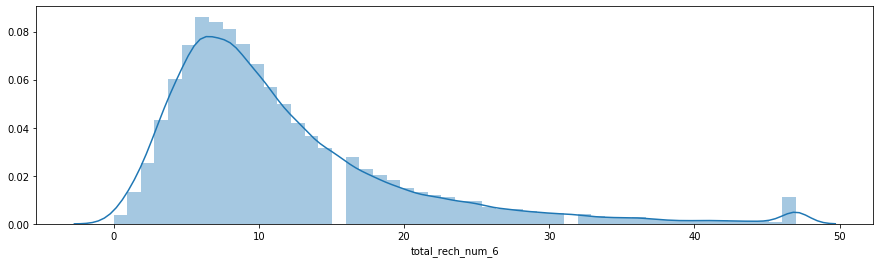

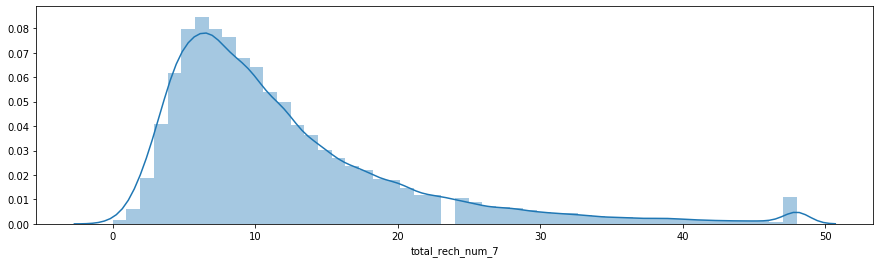

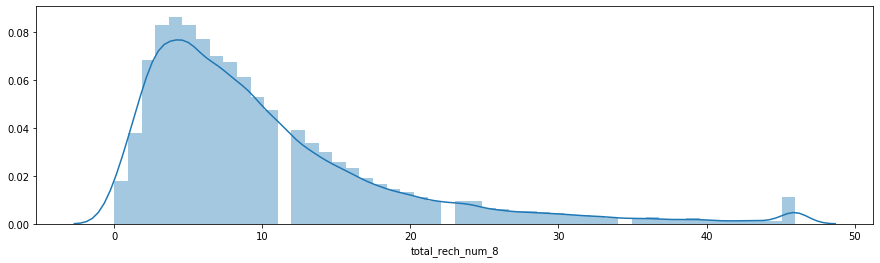

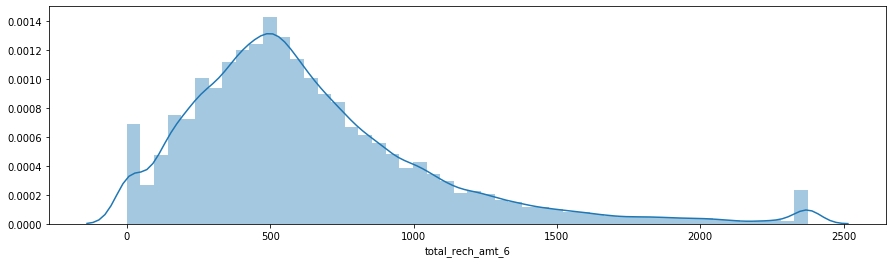

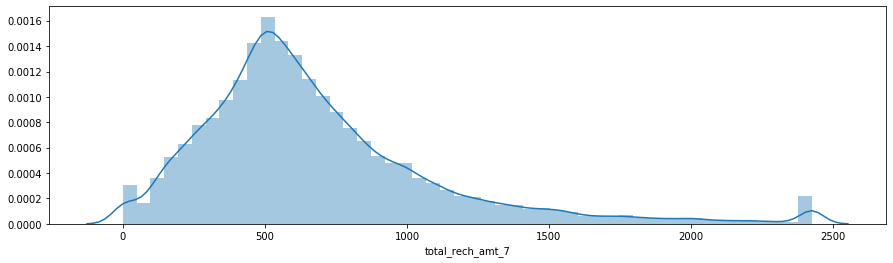

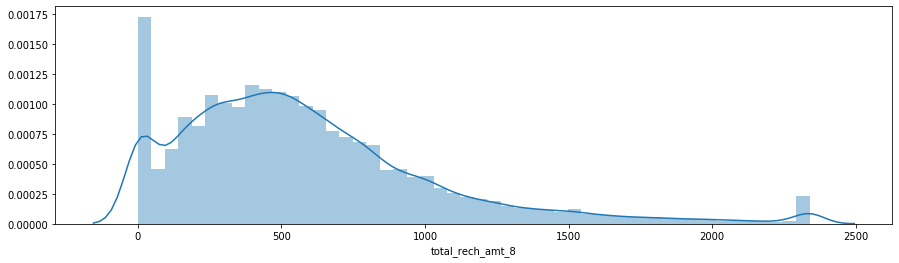

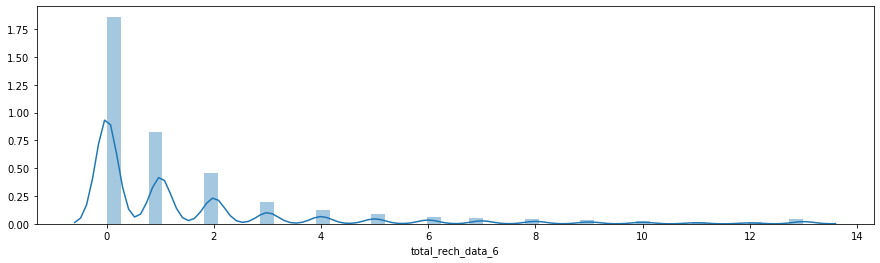

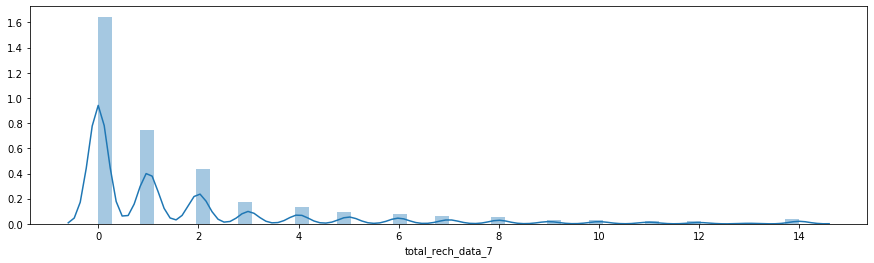

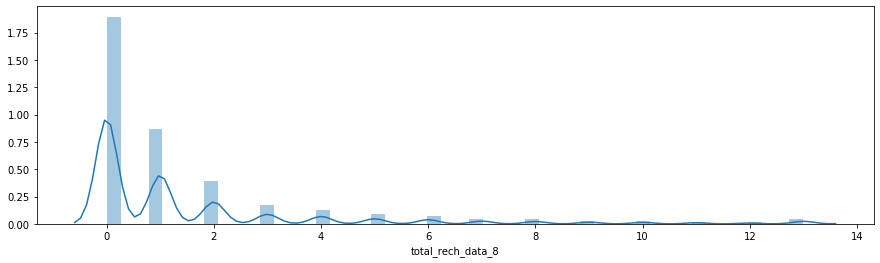

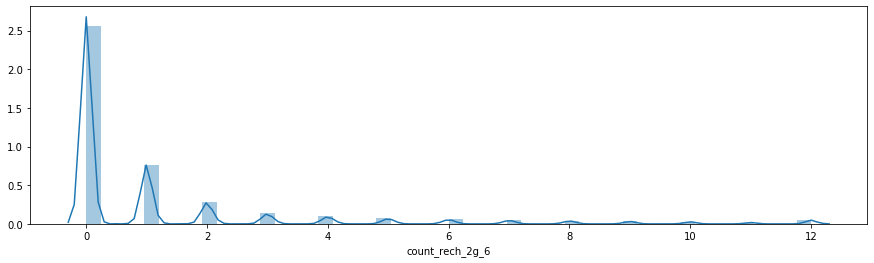

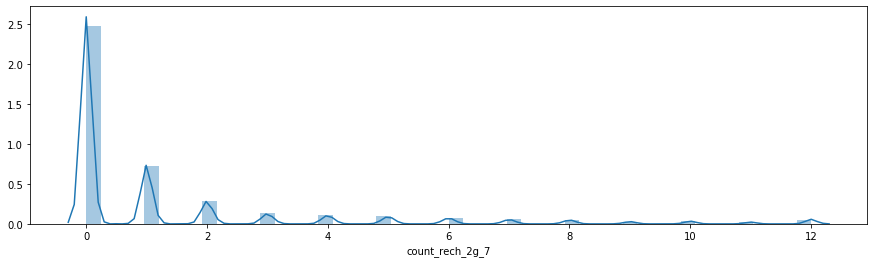

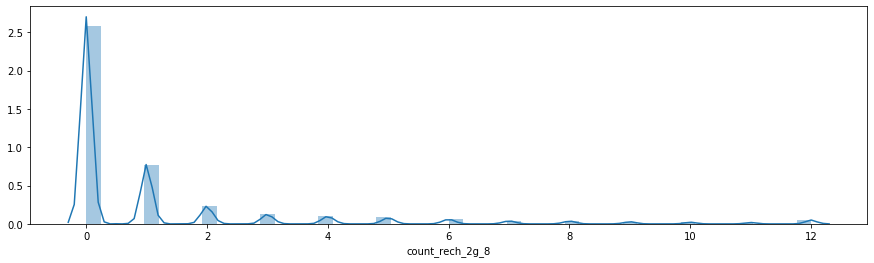

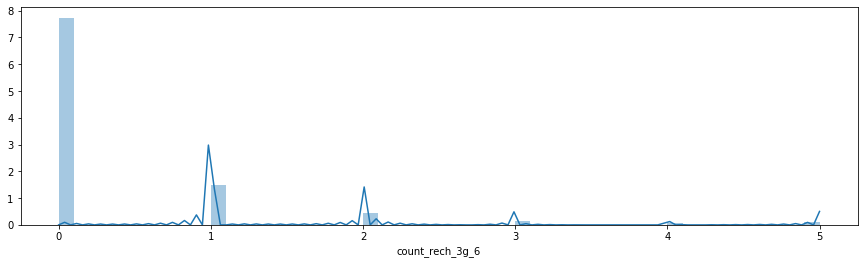

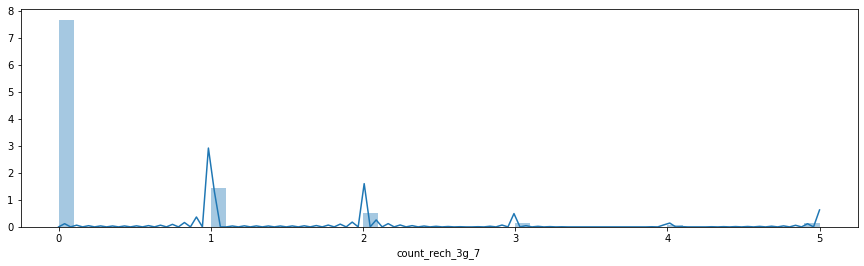

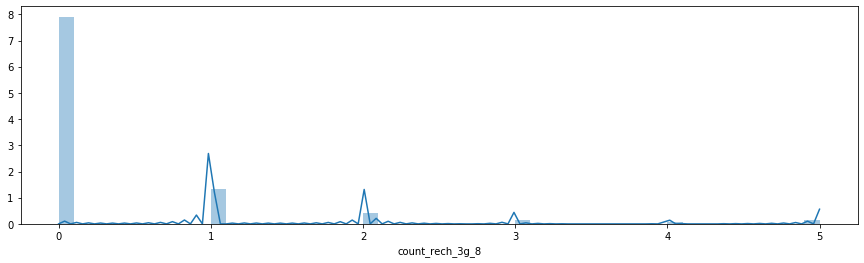

In [101]:
for i in col_int_1:
    plt.figure(figsize=(15,4))
    sns.distplot(df_high_value_2[i])
    plt.show()

In [102]:
c7.append("arpu_6")
c7.append("arpu_7")
c7.append("arpu_8")

In [103]:
c8 = pd.Series(c7)
c8.str.len() -2
c9 = list(set(c8.str.slice(0,- 2)))

In [104]:
c9.remove('a')
c9

['last_day_rch_amt',
 'loc_ic_mou',
 'total_rech_amt',
 'spl_og_mou',
 'total_rech_num',
 'count_rech_2g',
 'vol_3g_mb',
 'vbc_3g',
 'onnet_mou',
 'roam_og_mou',
 'total_rech_data',
 'roam_ic_mou',
 'monthly_3g',
 'max_rech_data',
 'arpu',
 'monthly_2g',
 'og_others',
 'std_ic_mou',
 'ic_others',
 'isd_ic_mou',
 'max_rech_amt',
 'arpu_3g',
 'std_og_mou',
 'night_pck_user',
 'av_rech_amt_data',
 'isd_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'offnet_mou',
 'count_rech_3g',
 'loc_og_mou',
 'vol_2g_mb',
 'arpu_2g']

In [105]:
df_high_value_2 = df_high_value_2.drop(columns = ["fb_user_6","fb_user_7","fb_user_8"])
df_high_value_2.shape

(30005, 106)

###  Deriving new feature which indicates the difference of the action phase(8th month) from average of metric of good phase(6th and 7th)

In [106]:
for i in c9 :
    df_high_value_2[i+"_diff"] = df_high_value_2[i+"_8"] - ((df_high_value_2[i+"_6"] + df_high_value_2[i+"_7"]) /2)
    df_high_value_2.head(2)

In [107]:
c7.remove("aon")

In [108]:
df_high_value_2.describe(quan1)

mobile_number  circle_id        arpu_6        arpu_7        arpu_8  \
count   3.000500e+04    30005.0  30005.000000  30005.000000  30005.000000   
mean    7.001208e+09      109.0    541.554265    568.896909    511.738110   
std     6.903221e+05        0.0    358.684253    347.855037    378.036363   
min     7.000000e+09      109.0      0.000000     34.913320      0.000000   
0%      7.000000e+09      109.0      0.000000     34.913320      0.000000   
1%      7.000026e+09      109.0      0.000000     34.936667      0.000000   
5%      7.000128e+09      109.0    101.449600    146.647000     26.211200   
25%     7.000613e+09      109.0    307.122000    349.647000    255.937000   
50%     7.001207e+09      109.0    470.917000    494.485000    442.007000   
75%     7.001805e+09      109.0    690.116000    700.259000    669.606000   
90%     7.002165e+09      109.0    987.024400    994.674600    984.827400   
99%     7.002387e+09      109.0   1983.104728   1999.401608   1986.847792   
100%    7.002411e+09      109.0   1983.131800   1999.449800   1986.857200   
max     7.002411e+09      109.0   1983.131800   1999.449800   1986.857200   

        onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  30005.000000  30005.000000  30005.000000  30005.000000  30005.000000   
mean     252.502525    274.022552    238.571128    364.577884    388.318024   
std      398.891387    422.763399    397.923189    428.360758    443.180485   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
0%         0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.000000      0.834000      2.180000   
25%       19.390000     21.740000     14.340000     76.740000     87.310000   
50%       88.640000     96.980000     76.410000    226.190000    243.790000   
75%      293.110000    322.660000    263.540000    483.030000    517.810000   
90%      740.072000    816.064000    698.878000    875.948000    935.690000   
99%     2146.022192   2215.339088   2165.523536   2325.268048   2410.273776   
100%    2146.065200   2215.422800   2165.531600   2325.278800   2410.575600   
max     2146.065200   2215.422800   2165.531600   2325.278800   2410.575600   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  30005.000000   30005.000000   30005.000000   30005.000000   
mean     340.662836      13.434545       9.759378       9.902726   
std      412.357815      48.420558      38.897681      39.222477   
min        0.000000       0.000000       0.000000       0.000000   
0%         0.000000       0.000000       0.000000       0.000000   
1%         0.000000       0.000000       0.000000       0.000000   
5%         0.000000       0.000000       0.000000       0.000000   
25%       59.530000       0.000000       0.000000       0.000000   
50%      204.340000       0.000000       0.000000       0.000000   
75%      459.090000       0.000000       0.000000       0.000000   
90%      845.378000      27.540000      14.610000      15.530000   
99%     2212.759040     336.004720     281.821440     283.696672   
100%    2212.784000     336.022000     281.904000     283.703200   
max     2212.784000     336.022000     281.904000     283.703200   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
count   30005.000000   30005.000000   30005.000000  30005.000000   
mean       22.490166      17.107602      16.383051    247.097854   
std        77.732866      64.152131      61.385990    324.845723   
min         0.000000       0.000000       0.000000      0.000000   
0%          0.000000       0.000000       0.000000      0.000000   
1%          0.000000       0.000000       0.000000      0.000000   
5%          0.000000       0.000000       0.000000      0.000000   
25%         0.000000       0.000000       0.000000     32.790000   
50%         0.000000       0.000

### Model Building - Defining Test and Train datasets and applying scaling to the features

In [109]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_high_value_2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [111]:
col_fin = list(df_high_value_2.select_dtypes(exclude = 'object').columns)
pd.Series(col_fin)

0              mobile_number
1                  circle_id
2                     arpu_6
3                     arpu_7
4                     arpu_8
5                onnet_mou_6
6                onnet_mou_7
7                onnet_mou_8
8               offnet_mou_6
9               offnet_mou_7
10              offnet_mou_8
11             roam_ic_mou_6
12             roam_ic_mou_7
13             roam_ic_mou_8
14             roam_og_mou_6
15             roam_og_mou_7
16             roam_og_mou_8
17              loc_og_mou_6
18              loc_og_mou_7
19              loc_og_mou_8
20              std_og_mou_6
21              std_og_mou_7
22              std_og_mou_8
23              isd_og_mou_6
24              isd_og_mou_7
25              isd_og_mou_8
26              spl_og_mou_6
27              spl_og_mou_7
28              spl_og_mou_8
29               og_others_6
30               og_others_7
31               og_others_8
32              loc_ic_mou_6
33              loc_ic_mou_7
34            

In [112]:
col_fin.remove("mobile_number")
col_fin.remove("circle_id")
col_fin.remove("churn")

In [113]:
df_train.head(1)

mobile_number  circle_id   arpu_6   arpu_7    arpu_8  onnet_mou_6  \
39967     7000910320        109  773.018  943.183  1156.965          0.0   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
39967          0.0          0.0           0.0           0.0           0.0   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
39967            0.0            0.0            0.0            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
39967            0.0            0.0           0.0           0.0           0.0   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
39967           0.0           0.0           0.0           0.0           0.0   

       isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
39967           0.0           0.0           0.0           0.0          0.0   

       og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
39967          0.0          0.0           0.0          1.69          5.71   

       std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  \
39967           0.0           0.0           0.0           0.0           0.0   

       spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  \
39967           0.0           0.0           0.0           0.0          0.0   

       ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  \
39967          0.0          0.0                 4                 3   

       total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
39967                 6               910              1110              1362   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  \
39967           455.0           655.0           655.0               455.0   

       last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  \
39967                 0.0               455.0                  2   

       total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  \
39967                  2                  3            455.0            455.0   

       max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
39967            455.0                0                0                0   

       count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  \
39967                2                2                3               812.8   

       av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  \
39967               910.0              903.88        76.02        43.18   

       vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  \
39967        38.38    3738.8332     4047.556     3906.498     778.01   

       arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  \
39967   817.8736    787.022   674.7024    758.514   693.7472   

       night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  \
39967               0.0               0.0               0.0           0.0   

       monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  \
39967           0.0           0.0          0.0          0.0          0.0   

       monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
39967           2.0           2.0           3.0          0.0          0.0   

       sachet_3g_8    aon   vbc_3g_8   vbc_3g_7  vbc_3g_6  churn  \
39967          0.0  671.0  1937.5776  2054.0676  1937.342      0   

       last_day_rch_amt_diff  loc_ic_mou_diff  total_rech_amt_diff  \
39967                  227.5            4.865                352.0   

       spl_og_mou_diff  total_rech_num_diff  count_rech_2g_diff  \
39967              0.0                  2.5                 0.0   

       vol_3g_mb_diff  vbc_3g_diff  onnet_mou_diff  roam_og_mou_diff  \
39967         13.3034     -58.1272             0.0               0.0   

       total_rech_data_diff  roam_ic_mou_diff  monthly_3g_diff  \
39967                

In [114]:
df_train[col_fin] = scaler.fit_transform(df_train[col_fin])

df_train.head()

mobile_number  circle_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
39967     7000910320        109  0.389797  0.462333  0.582309     0.000000   
38900     7001489752        109  0.198116  0.126811  0.312125     0.001598   
43088     7000986423        109  0.215865  0.276942  0.250631     0.014412   
12408     7001032567        109  0.064510  0.315872  0.002819     0.095039   
33792     7001822440        109  0.293916  0.649361  0.733568     0.036318   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
39967     0.000000     0.000000      0.000000      0.000000      0.000000   
38900     0.004216     0.000974      0.004528      0.004588      0.004036   
43088     0.006188     0.015326      0.043083      0.042836      0.052170   
12408     0.622130     0.011549      0.004111      0.066627      0.000000   
33792     0.090123     0.086321      0.123916      0.176124      0.258041   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
39967            0.0            0.0            0.0            0.0   
38900            0.0            0.0            0.0            0.0   
43088            0.0            0.0            0.0            0.0   
12408            0.0            0.0            0.0            0.0   
33792            0.0            0.0            0.0            0.0   

       roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
39967            0.0            0.0      0.000000      0.000000      0.000000   
38900            0.0            0.0      0.002659      0.011624      0.003378   
43088            0.0            0.0      0.029734      0.043135      0.043440   
12408            0.0            0.0      0.000000      0.001242      0.000000   
33792            0.0            0.0      0.193242      0.313241      0.407457   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
39967      0.000000      0.000000      0.000000      0.000000      0.000000   
38900      0.000000      0.000000      0.000000      0.000000      0.000000   
43088      0.014605      0.005551      0.023371      0.000000      0.000000   
12408      0.077982      0.531694      0.008975      0.000000      0.000000   
33792      0.008166      0.025458      0.027850      0.056006      0.195918   

       isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
39967      0.000000      0.000000      0.000000      0.000000          0.0   
38900      0.000000      0.137143      0.000000      0.074401          0.0   
43088      0.000000      1.000000      0.485065      0.387714          0.0   
12408      0.000000      0.002972      0.141308      0.005925          0.0   
33792      0.034004      0.000000      0.012812      0.000000          0.0   

       og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
39967          0.0          0.0      0.000000      0.001121      0.003940   
38900          0.0          0.0      0.003055      0.015013      0.002891   
43088          0.0          0.0      0.062615      0.139462      0.100855   
12408          0.0          0.0      0.001637      0.004549      0.000000   
33792          0.0          0.0      0.239615      0.351915      0.520853   

       std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  \
39967      0.000000      0.000000      0.000000       0.00000           0.0   
38900      0.000514      0.001493      0.000000       0.00000           0.0   
43088      0.087693      0.069208      0.098584       0.28125           0.0   
12408      0.005888      0.118075      0.000000       0.00000           0.0   
33792      0.110309      0.219828      0.115920       0.00000           0.0   

       spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  \
39967           0.0      0.000000      0.000000      0.000000          0.0   
38900           0.0      0.011149      0.030709      0.041373          0.0   
43088           0.0      0.000000      0.000000      0.00

In [115]:
y_train = df_train.pop('churn')
y_train.shape

(21003,)

In [116]:
X_train = df_train.drop(columns = ["mobile_number","circle_id"])

In [117]:
X_train.shape

(21003, 137)

In [118]:
df_test[col_fin] =  scaler.transform(df_test[col_fin])

In [119]:
df_test.head()

mobile_number  circle_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
20387     7000414490        109  0.180665  0.126150  0.115786     0.078893   
8351      7000342110        109  0.114796  0.144635  0.264422     0.007530   
72149     7002410408        109  0.527051  0.441170  0.419125     0.002022   
49785     7001329422        109  0.280241  0.214388  0.200544     0.073782   
42842     7002086021        109  0.323119  0.316439  0.257582     0.005634   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
20387     0.050139     0.022225      0.070245      0.029520      0.029483   
8351      0.014616     0.014782      0.091929      0.067001      0.095617   
72149     0.004983     0.000268      0.013444      0.003746      0.006625   
49785     0.112475     0.071442      0.227964      0.082217      0.142418   
42842     0.033890     0.007255      0.139760      0.120050      0.095811   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
20387       0.000000            0.0            0.0       0.000000   
8351        0.007916            0.0            0.0       0.002883   
72149       0.000000            0.0            0.0       0.000000   
49785       0.000000            0.0            0.0       0.000000   
42842       0.000000            0.0            0.0       0.000000   

       roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
20387            0.0            0.0      0.158336      0.095543      0.064780   
8351             0.0            0.0      0.093065      0.089591      0.127787   
72149            0.0            0.0      0.016410      0.010445      0.007774   
49785            0.0            0.0      0.255044      0.153349      0.198179   
42842            0.0            0.0      0.189503      0.206246      0.134945   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
20387      0.017727      0.004960      0.001780           0.0           0.0   
8351       0.022964      0.012724      0.010848           0.0           0.0   
72149      0.000000      0.000000      0.000000           0.0           0.0   
49785      0.085736      0.061953      0.049865           0.0           0.0   
42842      0.000000      0.000487      0.000000           0.0           0.0   

       isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
20387           0.0      0.112329      0.002664      0.030036     0.971783   
8351            0.0      0.000000      0.000000      0.000000     0.000000   
72149           0.0      0.118273      0.051881      0.128963     0.279910   
49785           0.0      0.000000      0.000000      0.000000     0.000000   
42842           0.0      0.052153      0.020042      0.033205     0.000000   

       og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
20387          0.0          0.0      0.186944      0.106173      0.088457   
8351           0.0          0.0      0.098932      0.089874      0.115895   
72149          0.0          0.0      0.043280      0.023733      0.028122   
49785          0.0          0.0      0.193185      0.151697      0.178100   
42842          0.0          0.0      0.146229      0.153236      0.181929   

       std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  \
20387      0.037656      0.017929      0.000000      0.468750      0.392157   
8351       0.035969      0.085316      0.022054      0.000000      0.000000   
72149      0.003118      0.000000      0.000000      0.484375      0.549020   
49785      0.105797      0.048211      0.021450      0.593750      0.000000   
42842      0.028577      0.016141      0.010972      0.000000      0.000000   

       spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  \
20387      0.000000           0.0           0.0      0.000000     0.000000   
8351       0.000000           0.0           0.0      0.000000     0.000000   
72149      0.000000           0.0           0.0      0.00

In [120]:
y_test = df_test.pop('churn')
y_test.shape

(9002,)

In [121]:
X_test = df_test.drop(columns = ["mobile_number","circle_id"])
X_test.shape

(9002, 137)

### Applying Principal Component Analysis - PCA

In [122]:
from sklearn.decomposition import PCA

In [123]:
pca = PCA(random_state=42)

In [124]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [125]:
pca.components_

array([[ 3.64943357e-03, -3.06807416e-04,  1.71669180e-02, ...,
         3.72783576e-03, -3.45975174e-03, -3.90184696e-03],
       [-1.78164258e-01, -1.91655719e-01, -1.95899305e-01, ...,
         1.04784710e-04, -9.11588374e-03, -3.73155396e-03],
       [ 1.40933157e-01,  1.69280292e-01,  2.00478491e-01, ...,
         7.15298500e-03,  1.07611160e-02,  1.83458510e-02],
       ...,
       [-0.00000000e+00, -4.61957917e-16, -1.71343052e-16, ...,
         1.63577471e-01, -8.82255846e-03, -8.07249890e-02],
       [ 0.00000000e+00, -2.45184262e-16, -1.22120681e-16, ...,
        -7.02587410e-02, -1.44569834e-02,  5.80892272e-02],
       [-0.00000000e+00, -1.21080595e-16, -1.88665088e-16, ...,
        -5.22619088e-02, -6.94557275e-02, -3.01943013e-01]])

In [126]:
pca.explained_variance_ratio_

array([1.64980604e-01, 1.16212545e-01, 7.20587138e-02, 5.26576167e-02,
       3.88139469e-02, 3.53926076e-02, 2.98488515e-02, 2.38909602e-02,
       2.29767360e-02, 2.13207382e-02, 2.02851415e-02, 1.95078422e-02,
       1.93256323e-02, 1.80379069e-02, 1.77026219e-02, 1.64826137e-02,
       1.62540249e-02, 1.57693158e-02, 1.48465807e-02, 1.22919064e-02,
       1.14993054e-02, 1.09247095e-02, 1.05126974e-02, 1.03519809e-02,
       9.72128466e-03, 9.57960055e-03, 9.31857877e-03, 9.22794638e-03,
       8.04541460e-03, 7.70958085e-03, 7.44151076e-03, 6.35064189e-03,
       6.21999503e-03, 6.14460538e-03, 6.08800470e-03, 5.68315691e-03,
       5.66577168e-03, 5.36266050e-03, 4.97267497e-03, 4.88824432e-03,
       4.78260783e-03, 4.57426054e-03, 4.43889057e-03, 4.09116921e-03,
       3.71623726e-03, 3.58939335e-03, 3.51278289e-03, 3.37615273e-03,
       3.24273907e-03, 3.18125232e-03, 3.11416876e-03, 2.96794450e-03,
       2.88663313e-03, 2.67578310e-03, 2.61005561e-03, 2.44478355e-03,
      

In [127]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [128]:
var_cumu

array([0.1649806 , 0.28119315, 0.35325186, 0.40590948, 0.44472343,
       0.48011603, 0.50996489, 0.53385585, 0.55683258, 0.57815332,
       0.59843846, 0.6179463 , 0.63727194, 0.65530984, 0.67301247,
       0.68949508, 0.7057491 , 0.72151842, 0.736365  , 0.74865691,
       0.76015621, 0.77108092, 0.78159362, 0.7919456 , 0.80166688,
       0.81124649, 0.82056506, 0.82979301, 0.83783842, 0.84554801,
       0.85298952, 0.85934016, 0.86556015, 0.87170476, 0.87779276,
       0.88347592, 0.88914169, 0.89450435, 0.89947703, 0.90436527,
       0.90914788, 0.91372214, 0.91816103, 0.9222522 , 0.92596844,
       0.92955783, 0.93307061, 0.93644677, 0.93968951, 0.94287076,
       0.94598493, 0.94895287, 0.9518395 , 0.95451529, 0.95712534,
       0.95957013, 0.96183827, 0.96409266, 0.96611777, 0.96810486,
       0.9699333 , 0.97173388, 0.97344294, 0.97510762, 0.97672558,
       0.9782457 , 0.97969708, 0.98111664, 0.9824909 , 0.98383553,
       0.98515919, 0.98644454, 0.98763043, 0.98876114, 0.98984

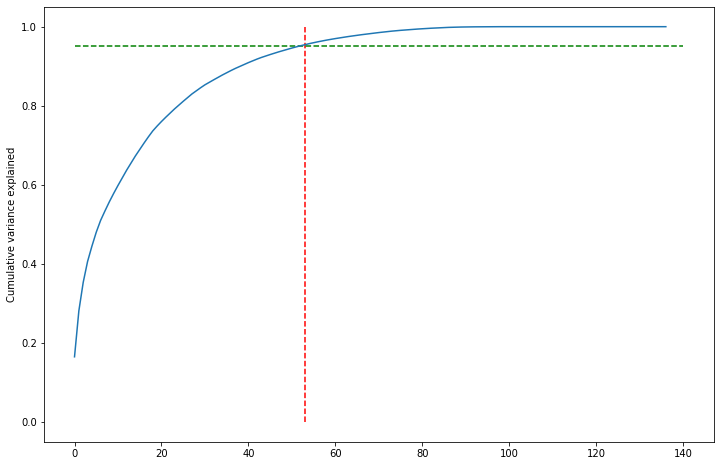

In [129]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=53, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=140, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [130]:
pca_final = PCA(0.95,random_state=42)

In [131]:
df_train_pca = pca_final.fit_transform(X_train)

In [132]:
df_train_pca.shape

(21003, 53)

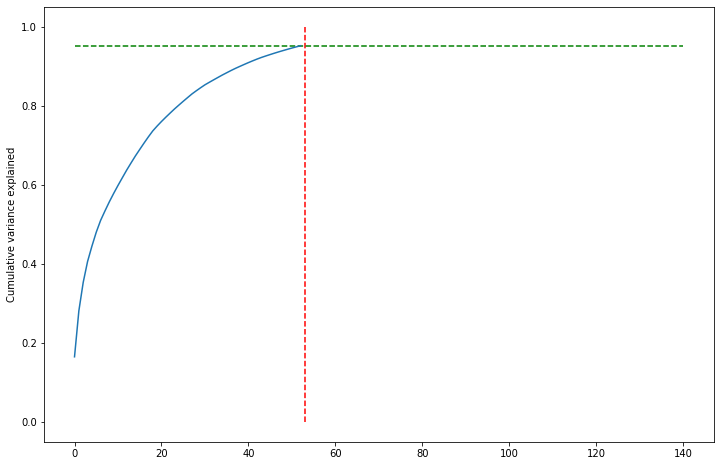

In [133]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=53, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=140, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca_final.explained_variance_ratio_))
plt.ylabel("Cumulative variance explained")
plt.show()


In [134]:
corrmat = np.corrcoef(df_train_pca.transpose())

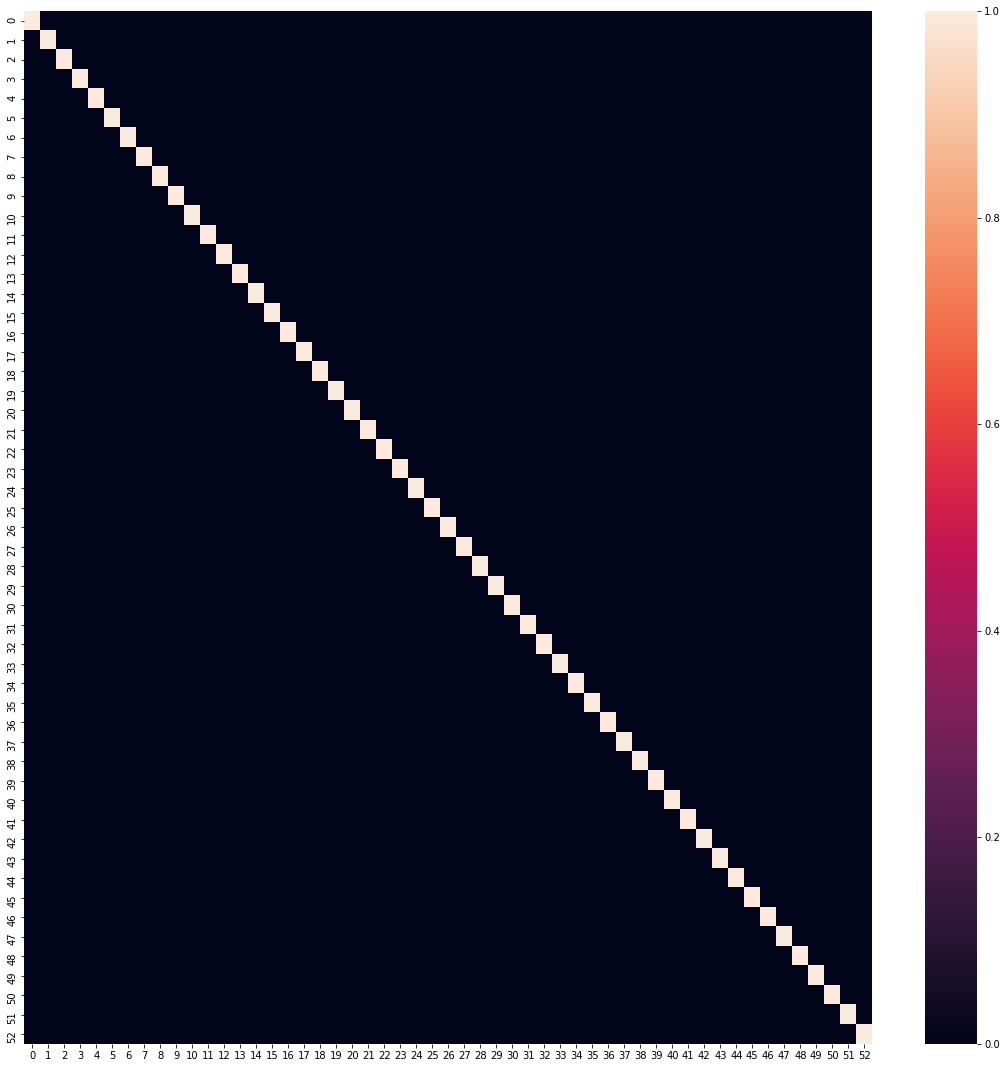

In [135]:
plt.figure(figsize=[19,19])
sns.heatmap(corrmat)

### Applying PCA on test data

In [136]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9002, 53)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

### Logistic Regression with PCA

In [138]:
learner_pca = LogisticRegression(random_state = 0, class_weight = 'balanced')

In [139]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [140]:
y_train_pred = model_pca.predict_proba(df_train_pca)[:,1]

In [141]:
y_train_pred

array([0.07036829, 0.01006368, 0.33968649, ..., 0.40419507, 0.01286647,
       0.48961618])

In [142]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head(10)

Churn  Churn_Prob
0      0    0.070368
1      0    0.010064
2      0    0.339686
3      0    0.918764
4      0    0.002330
5      0    0.181808
6      0    0.397494
7      1    0.767814
8      0    0.635198
9      0    0.898400

In [143]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.070368    1    0    0    0    0    0    0    0    0    0
1      0    0.010064    1    0    0    0    0    0    0    0    0    0
2      0    0.339686    1    1    1    1    0    0    0    0    0    0
3      0    0.918764    1    1    1    1    1    1    1    1    1    1
4      0    0.002330    1    0    0    0    0    0    0    0    0    0

In [144]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.101747  1.000000  0.000000
0.1   0.1  0.370471  0.972859  0.302237
0.2   0.2  0.523116  0.951802  0.474557
0.3   0.3  0.632624  0.918109  0.600286
0.4   0.4  0.720183  0.878334  0.702269
0.5   0.5  0.791934  0.812354  0.789622
0.6   0.6  0.848307  0.737015  0.860914
0.7   0.7  0.887635  0.648573  0.914714
0.8   0.8  0.908584  0.503978  0.954415
0.9   0.9  0.906109  0.195601  0.986590


<Figure size 288x288 with 0 Axes>

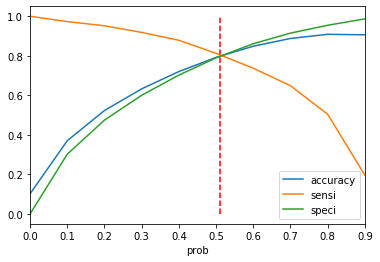

In [145]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(4,4))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.51, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [146]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.51 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0      0    0.070368    1    0    0    0    0    0    0    0    0    0   
1      0    0.010064    1    0    0    0    0    0    0    0    0    0   
2      0    0.339686    1    1    1    1    0    0    0    0    0    0   
3      0    0.918764    1    1    1    1    1    1    1    1    1    1   
4      0    0.002330    1    0    0    0    0    0    0    0    0    0   

   final_predicted  
0                0  
1                0  
2                0  
3                1  
4                0

In [147]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7984097509879541

In [148]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[15047,  3819],
       [  415,  1722]], dtype=int64)

In [149]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [150]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20242764762005724


In [151]:
print (TP / float(TP+FP))

0.31077422847861397


In [152]:
print (TN / float(TN+ FN))

0.9731600051739749


In [153]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [154]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

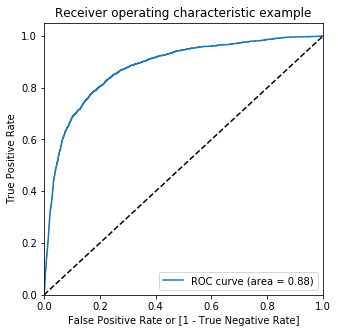

In [155]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [156]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7984097509879541

In [157]:
y_test_pred = model_pca.predict_proba(df_test_pca)[:,1]

In [158]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final.head(10)

Churn  Churn_Prob
0      0    0.515142
1      0    0.097968
2      0    0.432550
3      0    0.179021
4      0    0.069223
5      1    0.990047
6      0    0.083446
7      0    0.042793
8      0    0.212466
9      0    0.040434

In [159]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [160]:
y_test_pred_final

Churn  Churn_Prob  final_predicted
0         0    0.515142                1
1         0    0.097968                0
2         0    0.432550                0
3         0    0.179021                0
4         0    0.069223                0
5         1    0.990047                1
6         0    0.083446                0
7         0    0.042793                0
8         0    0.212466                0
9         0    0.040434                0
10        0    0.244754                0
11        0    0.098538                0
12        0    0.013833                0
13        0    0.572267                1
14        0    0.006586                0
15        0    0.023918                0
16        0    0.328875                0
17        0    0.084589                0
18        0    0.009231                0
19        0    0.271561                0
20        0    0.343855                0
21        0    0.202321                0
22        0    0.344741                0
23        1    0.785541                1
24        0    0.301639                0
25        1    0.965544                1
26        0    0.087747                0
27        0    0.274193                0
28        0    0.229329                0
29        1    0.826952                1
30        0    0.007657                0
31        0    0.219485                0
32        0    0.081529                0
33        0    0.108074                0
34        0    0.543441                1
35        0    0.733948                1
36        0    0.269389                0
37        0    0.057878                0
38        0    0.114092                0
39        0    0.508643                1
40        0    0.028891                0
41        0    0.420042                0
42        0    0.541439                1
43        0    0.460993                0
44        0    0.035648                0
45        0    0.132627                0
46        0    0.082436                0
47        0    0.144783                0
48        0    0.920686                1
49        0    0.742139                1
50        0    0.147994                0
51        0    0.635072                1
52        0    0.065116                0
53        0    0.005924                0
54        0    0.592568                1
55        0    0.213729                0
56        0    0.271975                0
57        0    0.628604                1
58        0    0.039266                0
59        0    0.501145                1
60        0    0.029005                0
61        0    0.316715                0
62        0    0.402840                0
63        0    0.028896                0
64        0    0.143223                0
65        1    0.922737                1
66        0    0.020291                0
67        0    0.889880                1
68        0    0.017372                0
69        0    0.691689                1
70        1    0.822606                1
71        0    0.761797                1
72        0    0.842201                1
73        0    0.013744                0
74        1    0.912237                1
75        0    0.561230                1
76        0    0.887231                1
77        0    0.042690                0
78        0    0.180481                0
79        0    0.711542                1
80        0    0.209281                0
81        0    0.355290                0
82        0    0.091589                0
83        0    0.616280                1
84        0    0.404269                0
85        0    0.004413                0
86        0    0.102823                0
87        0    0.204560                0
88        0    0.547065                1
89        1    0.544109                1
90        0    0.001278                0
91        0    0.044954                0
92        0    0.336888                0
93        0    0.013525                0
94        1    0.610327                1
95        0    0.509626                1
96        0    0.456700      

In [161]:
metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)

0.790935347700511

In [162]:
roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)

0.8665894157391101

### Above Model with PCA and Logistic Regression has training accuracy of 79.8% and test accuracy of 79% 
### and AUC score for Test Data is 86.7% 

## Logistic Regression model with hyperparameter tuning

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
penalty1 = ['l1','l2']
C = np.logspace(0,4,10)
C
hyperparameters  = dict(C=C, penalty = penalty1)

In [165]:
logistic1 = LogisticRegression(random_state = 0, class_weight = 'balanced')

In [166]:
clf  = GridSearchCV(logistic1,hyperparameters, cv = 5, verbose = 0,scoring="accuracy" )

In [167]:
best_model = clf.fit(df_train_pca,y_train)

In [168]:
# cross validation results
pd.DataFrame(best_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0        0.210998      0.025207         0.001589        0.000202        1   
1        0.363381      0.077894         0.002767        0.001660        1   
2        0.212485      0.019309         0.001984        0.000544  2.78256   
3        0.375479      0.068176         0.002279        0.000505  2.78256   
4        0.243336      0.020837         0.002678        0.000506  7.74264   
5        0.432117      0.024329         0.002776        0.000863  7.74264   
6        0.237687      0.032444         0.002077        0.000372  21.5443   
7        0.333911      0.045704         0.002973        0.001036  21.5443   
8        0.240667      0.022089         0.002670        0.001112  59.9484   
9        0.367537      0.052606         0.002479        0.000543  59.9484   
10       0.211209      0.027174         0.002072        0.000563   166.81   
11       0.352170      0.012146         0.002071        0.000382   166.81   
12       0.239268      0.014060         0.002382        0.000486  464.159   
13       0.404239      0.047410         0.002381        0.000372  464.159   
14       0.248899      0.012468         0.002673        0.000808  1291.55   
15       0.293755      0.049706         0.001860        0.000365  1291.55   
16       0.200880      0.033038         0.002288        0.000675  3593.81   
17       0.323204      0.046067         0.001873        0.000193  3593.81   
18       0.232426      0.017304         0.003373        0.001519    10000   
19       0.383316      0.046578         0.002275        0.001121    10000   

   param_penalty                                      params  \
0             l1                 {'C': 1.0, 'penalty': 'l1'}   
1             l2                 {'C': 1.0, 'penalty': 'l2'}   
2             l1  {'C': 2.7825594022071245, 'penalty': 'l1'}   
3             l2  {'C': 2.7825594022071245, 'penalty': 'l2'}   
4             l1   {'C': 7.742636826811269, 'penalty': 'l1'}   
5             l2   {'C': 7.742636826811269, 'penalty': 'l2'}   
6             l1  {'C': 21.544346900318832, 'penalty': 'l1'}   
7             l2  {'C': 21.544346900318832, 'penalty': 'l2'}   
8             l1   {'C': 59.94842503189409, 'penalty': 'l1'}   
9             l2   {'C': 59.94842503189409, 'penalty': 'l2'}   
10            l1  {'C': 166.81005372000593, 'penalty': 'l1'}   
11            l2  {'C': 166.81005372000593, 'penalty': 'l2'}   
12            l1  {'C': 464.15888336127773, 'penalty': 'l1'}   
13            l2  {'C': 464.15888336127773, 'penalty': 'l2'}   
14            l1  {'C': 1291.5496650148827, 'penalty': 'l1'}   
15            l2  {'C': 1291.5496650148827, 'penalty': 'l2'}   
16            l1   {'C': 3593.813663804626, 'penalty': 'l1'}   
17            l2   {'C': 3593.813663804626, 'penalty': 'l2'}   
18            l1             {'C': 10000.0, 'penalty': 'l1'}   
19            l2             {'C': 10000.0, 'penalty': 'l2'}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.790576           0.788622           0.797143   
1            0.790576           0.788622           0.796667   
2            0.790100           0.788146           0.797381   
3            0.790338           0.788146           0.796667   
4            0.790338           0.788146           0.797381   
5            0.790338           0.788146           0.797381   
6            0.790338           0.788146           0.797381   
7            0.790338           0.788384           0.797381   
8            0.790100           0.788146           0.797619   
9            0.790100           0.788146           0.797619   
10           0.790100           0.788146           0.797619   
11           0.790100           0.788146           0.797619   
12           0.790100           0.788146           0.797619   
13           0.790100           0.788146           0.797619   
14           0.790100           0.788146           0.797619   
15           0.790100           0

In [169]:
# Hyperparameters and accuracy
print("Accuracy ", best_model.best_score_)
print("Hyperparameters ", best_model.best_params_)

Accuracy  0.7925058325001191
Hyperparameters  {'C': 21.544346900318832, 'penalty': 'l2'}


In [170]:
# predict churn on test data
y_pred_auc = best_model.predict(df_test_pca)

# confusion matrix
con_mat_new = confusion_matrix(y_test, y_pred_auc)
print(con_mat_new)

y_pred_auctest = best_model.predict_proba(df_test_pca)
auc_new = roc_auc_score(y_test, y_pred_auctest[:,1])
auc_new

[[6403 1706]
 [ 178  715]]


0.8665876204905254

In [171]:
metrics.accuracy_score(y_test, y_pred_auc)

0.7907131748500333

### Logistic Regression Model with PCA and hyper parameter tuning results in accuracy of 79 %

In [172]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(class_weight = 'balanced')

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict on test data
y_pred_dt = dt.predict(X_test)

# Check Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy: 0.8891357476116418


### Decision Trees with hyperparameter tuning

In [173]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}


# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100,class_weight = 'balanced')

# fit tree on training data
tree = GridSearchCV(dtree, param_grid, 
                    cv=n_folds, 
                   scoring="accuracy")


In [174]:
b_model  = tree.fit(X_train, y_train)

In [175]:
cv_results = pd.DataFrame(b_model.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.023354      0.058796         0.004853        0.000657   
1        0.899051      0.075126         0.003964        0.000315   
2        1.031672      0.095894         0.005363        0.001225   
3        0.936548      0.084495         0.005065        0.000785   
4        1.544933      0.161129         0.005267        0.000677   
5        1.516272      0.062759         0.004568        0.000579   
6        1.241795      0.033799         0.004360        0.000215   
7        1.133259      0.052564         0.004274        0.001109   
8        0.529827      0.017035         0.003571        0.000198   
9        0.511986      0.013203         0.003556        0.000187   
10       0.521899      0.024864         0.005065        0.000961   
11       0.533886      0.026866         0.003770        0.000595   
12       0.883482      0.049909         0.003662        0.000233   
13       0.906101      0.043921         0.004967        0.000900   
14       0.839024      0.002425         0.003570        0.000199   
15       0.825940      0.024135         0.003669        0.000242   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.818896           0.849322           0.864762   
1            0.818896           0.849322           0.864762   
2            0.817706           0.839562           0.864048   
3            0.817706           0.839562           0.864048   
4            0.820086           0.817662           0.831667   
5            0.820086           0.817662           0.

In [176]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", b_model.best_score_)
print(b_model.best_estimator_)

best accuracy 0.8389277722230157
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')


In [177]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  class_weight = 'balanced',
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [178]:
# accuracy score
clf_entropy.score(X_test,y_test)

0.8508109309042435

In [179]:
clf_entropy.score(X_train,y_train)

0.8541636909012998

In [180]:
from sklearn.metrics import classification_report,confusion_matrix

In [181]:
y_pred_dt = clf_entropy.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8109
           1       0.38      0.77      0.51       893

    accuracy                           0.85      9002
   macro avg       0.67      0.81      0.71      9002
weighted avg       0.91      0.85      0.87      9002



In [182]:
print(confusion_matrix(y_test,y_pred_dt))

[[6973 1136]
 [ 207  686]]


In [183]:
features = X_train.columns

In [184]:
# create dataframe with important features
imp = clf_entropy.feature_importances_
feat_imp = pd.DataFrame({'features': features, 'imp_level': imp*100})
feat_imp = feat_imp[['features', 'imp_level']]
feat_imp = feat_imp.sort_values('imp_level', ascending=False)
feat_imp

features  imp_level
32            loc_ic_mou_8  60.684173
50        total_rech_amt_8   8.986830
14           roam_og_mou_8   8.516483
105    total_rech_amt_diff   2.978072
56      last_day_rch_amt_8   2.728955
19            std_og_mou_7   2.531517
3              onnet_mou_6   1.735077
77             vol_3g_mb_8   1.710962
100               vbc_3g_8   1.573361
5              onnet_mou_8   1.373266
74             vol_2g_mb_8   1.305418
10           roam_ic_mou_7   0.909473
134        loc_og_mou_diff   0.908804
2                   arpu_8   0.827798
117              arpu_diff   0.749040
8             offnet_mou_8   0.494543
125        std_og_mou_diff   0.473081
15            loc_og_mou_6   0.461407
83               arpu_2g_8   0.449011
111         onnet_mou_diff   0.186525
34            std_ic_mou_7   0.121535
13           roam_og_mou_7   0.117480
48        total_rech_amt_6   0.095169
135         vol_2g_mb_diff   0.082020
101               vbc_3g_7   0.000000
81               arpu_2g_6   0.000000
78               arpu_3g_6   0.000000
79               arpu_3g_7   0.000000
99                     aon   0.000000
98             sachet_3g_8   0.000000
97             sachet_3g_7   0.000000
96             sachet_3g_6   0.000000
80               arpu_3g_8   0.000000
95            monthly_3g_8   0.000000
82               arpu_2g_7   0.000000
87            monthly_2g_6   0.000000
94            monthly_3g_7   0.000000
84        night_pck_user_6   0.000000
93            monthly_3g_6   0.000000
92             sachet_2g_8   0.000000
85        night_pck_user_7   0.000000
91             sachet_2g_7   0.000000
90             sachet_2g_6   0.000000
89            monthly_2g_8   0.000000
88            monthly_2g_7   0.000000
86        night_pck_user_8   0.000000
0                   arpu_6   0.000000
102               vbc_3g_6   0.000000
120        std_ic_mou_diff   0.000000
133     count_rech_3g_diff   0.000000
132        offnet_mou_diff   0.000000
131        spl_ic_mou_diff   0.000000
130         sachet_3g_diff   0.000000
129         sachet_2g_diff   0.000000
128        isd_og_mou_diff   0.000000
127  av_rech_amt_data_diff   0.000000
126    night_pck_user_diff   0.000000
124           arpu_3g_diff   0.000000
123      max_rech_amt_diff   0.000000
122        isd_ic_mou_diff   0.000000
121         ic_others_diff   0.000000
119         og_others_diff   0.000000
103  last_day_rch_amt_diff   0.000000
118        monthly_2g_diff   0.000000
116     max_rech_data_diff   0.000000
115        monthly_3g_diff   0.000000
114       roam_ic_mou_diff   0.000000
113   total_rech_data_diff   0.000000
112       roam_og_mou_diff   0.000000
76             vol_3g_mb_7   0.000000
109         vol_3g_mb_diff   0.000000
108     count_rech_2g_diff   0.000000
107    total_rech_num_diff   0.000000
106        spl_og_mou_diff   0.000000
104        loc_ic_mou_diff   0.000000
110            vbc_3g_diff   0.000000
68         count_rech_3g_8   0.000000
75             vol_3g_mb_6   0.000000
73             vol_2g_mb_7   0.000000
39            isd_ic_mou_6   0.000000
38            spl_ic_mou_8   0.000000
37            spl_ic_mou_7   0.000000
36            spl_ic_mou_6   0.000000
35            std_ic_mou_8   0.000000
33            std_ic_mou_6   0.000000
31            loc_ic_mou_7   0.000000
30            loc_ic_mou_6   0.000000
29             og_others_8   0.000000
28             og_others_7   0.000000
27             og_others_6   0.000000
26            spl_og_mou_8   0.000000
25            spl_og_mou_7   0.000000
24            spl_og_mou_6   0.000000
23            isd_og_mou_8   0.000000
22            isd_og_mou_7   0.000000
21            isd_og_mou_6   0.000000
20            std_og_mou_8   0.000000
18            std_og_mou_6   0.000000
17            loc_og_mou_8   0.000000
16            loc_og_mou_7   0.000000
12           roam_og_mou_6   0.000000
11           roam_ic_mou_8   0.000000
9            roam_ic_mou_6   0.000000
7             offnet_mou_7   0.000000
6             offnet_mou_6  

In [185]:
# find top features
top_n = 25
top_features = feat_imp.features[0:top_n]
pd.DataFrame(top_features.tolist(),columns =[ 'F_Names'])

F_Names
0          loc_ic_mou_8
1      total_rech_amt_8
2         roam_og_mou_8
3   total_rech_amt_diff
4    last_day_rch_amt_8
5          std_og_mou_7
6           onnet_mou_6
7           vol_3g_mb_8
8              vbc_3g_8
9           onnet_mou_8
10          vol_2g_mb_8
11        roam_ic_mou_7
12      loc_og_mou_diff
13               arpu_8
14            arpu_diff
15         offnet_mou_8
16      std_og_mou_diff
17         loc_og_mou_6
18            arpu_2g_8
19       onnet_mou_diff
20         std_ic_mou_7
21        roam_og_mou_7
22     total_rech_amt_6
23       vol_2g_mb_diff
24             vbc_3g_7

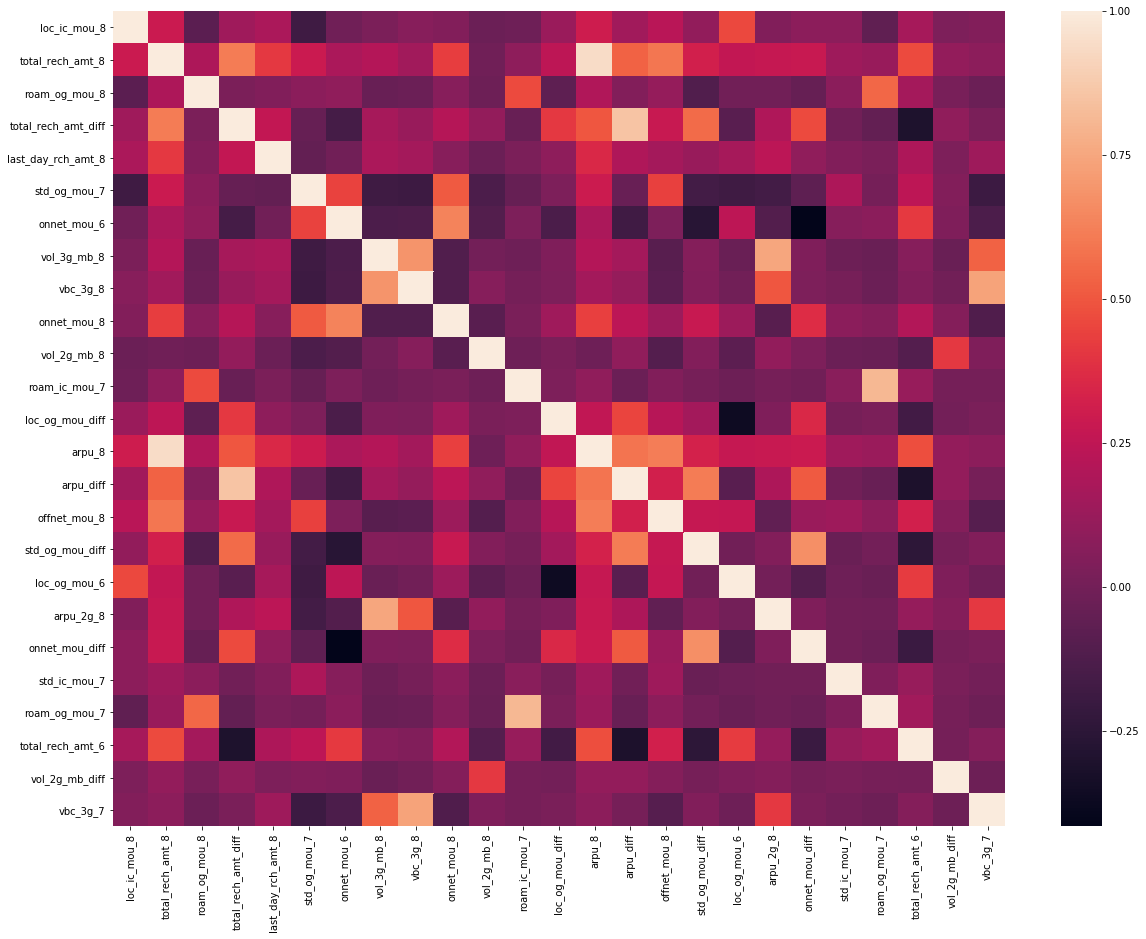

In [186]:
# correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(20,15)
sns.heatmap(data=X_train[top_features].corr())

### The important predictors include: 
#### loc_ic_mou_8 , total_rech_amt_8 , roam_og_mou_8 , total_rech_amt_diff , last_day_rch_amt_8 , std_og_mou_7 , onnet_mou_6 , vol_3g_mb_8 , vbc_3g_8 , onnet_mou_8 , vol_2g_mb_8 , roam_ic_mou_7 , loc_og_mou_diff , arpu_8 , arpu_diff , offnet_mou_8 , std_og_mou_diff , loc_og_mou_6 , arpu_2g_8 , onnet_mou_diff , std_ic_mou_7 , roam_og_mou_7 , total_rech_amt_6 , vol_2g_mb , monthly_2g_8

#### From the above list we can see that local incoming minutes of usage has maximum influence on the churn.Next to that, total recharge amount , roaming outgoing, total recharge amount difference (total_rech_amt_diff) , std outgoing and incoming, on network minutes of usage,3g and 2g  data usage have maximum influence




#### Decision Tree built with hyperparamters provides an accuracy of 85% on test and train data